<a href="https://colab.research.google.com/github/sanjayvarma199/Array-1/blob/master/Assignment4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author** <br>
 Sanjay Varma Datla

### About Dataset
This is a fictional dataset created to help the data analysts to play around with the trends and insights on employee jab satisfaction index.

It has the following attributes.

* emp_id - Unique ID
* age - Age
* Dept - Department
* location - Employee location
* education - Employee's education status
* recruitment_type - Mode of recruitment
* job_level - 1 to 5. The job level of the employee. 1 being the least and 5 * being the highest position
* rating - 1 to 5. The previous year rating of the employee. 1 being the least * and 5 being the highest position
* onsite - Has the employee ever went to an onsite location? 0 and 1
* awards - No. of awards
* certifications - Is the employee certified?
* salary - Net Salary
* satisfied - Is the employee satisfied with his job?



In [ ]:
# Installing dependencies
!pip install eli5
!pip install mlxtend --upgrade
!pip install scikit-learn==0.23.2
!pip install numba==0.53
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another excepti

#What question are you trying to answer? How did you frame it as an ML task?
Here I am trying to predict the employee satisfaction given some of its features like .
The employee satisfaction is denoted by numbers from 0 to 1 in which 0 represents not satisfied and 1 represents satisfied.
So its a basic classification problem where we can use logistic regression.

#Exploratory Data Analysis

In [ ]:
# Import dependencies
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

import statsmodels.api as sm
from matplotlib import pyplot
import matplotlib.pylab as plt
from collections import Counter
from statsmodels.graphics.gofplots import qqplot

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE


from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from yellowbrick.style import set_palette
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

import eli5
from eli5.sklearn import PermutationImportance

from mlxtend.evaluate import bias_variance_decomp

**Loading Employee Data Set**

In [ ]:
#Reading the cirrhosis dataset
file_url = "https://raw.githubusercontent.com/sanjayvarma199/INFO6105-Data-Science-and-Engineering-Tools/main/Employee%20Satisfaction%20Index.csv"
employee_data = pd.read_csv(file_url)
employee_data.head()

Unnamed: 0    emp_id  age        Dept location education  \
0           0    HR8270   28          HR   Suburb        PG   
1           1  TECH1860   50  Technology   Suburb        PG   
2           2  TECH6390   43  Technology   Suburb        UG   
3           3   SAL6191   44       Sales     City        PG   
4           4    HR6734   33          HR     City        UG   

     recruitment_type  job_level  rating  onsite  awards  certifications  \
0            Referral          5       2       0       1               0   
1             Walk-in          3       5       1       2               1   
2            Referral          4       1       0       2               0   
3           On-Campus          2       3       1       0               0   
4  Recruitment Agency          2       1       0       5               0   

   salary  satisfied  
0   86750          1  
1   42419          0  
2   65715          0  
3   29805          1  
4   29805          1

In [ ]:
# 1. Drop unnnecessary fields that wont contribute to the prediction like Sl No
employee_data.drop(employee_data.columns[0], axis = 1, inplace = True)

# 2. Modified data
employee_data

emp_id  age        Dept location education    recruitment_type  \
0      HR8270   28          HR   Suburb        PG            Referral   
1    TECH1860   50  Technology   Suburb        PG             Walk-in   
2    TECH6390   43  Technology   Suburb        UG            Referral   
3     SAL6191   44       Sales     City        PG           On-Campus   
4      HR6734   33          HR     City        UG  Recruitment Agency   
..        ...  ...         ...      ...       ...                 ...   
495    HR5330   49          HR   Suburb        PG           On-Campus   
496  TECH9010   24  Technology   Suburb        UG            Referral   
497   MKT7801   34   Marketing     City        PG           On-Campus   
498  TECH5846   26  Technology     City        UG           On-Campus   
499  TECH7731   26  Technology     City        UG  Recruitment Agency   

     job_level  rating  onsite  awards  certifications  salary  satisfied  
0            5       2       0       1               0   86750          1  
1            3       5       1       2               1   42419          0  
2            4       1       0       2               0   65715          0  
3            2       3       1       0               0   29805          1  
4            2       1       0       5               0   29805          1  
..         ...     ...     ...     ...             ...     ...        ...  
495          2       5       0       6               0   29805          1  
496          2       4       0       2               0   29805          0  
497          1       3       0       2               0   24076          1  
498          2       1       1       1               1   29805          0  
499          3       4       0       3               0   42419          0  

[500 rows x 13 columns]

In [ ]:
# categorical data
categoricalData = employee_data.select_dtypes(["object"]).columns.tolist()
categoricalData

['emp_id', 'Dept', 'location', 'education', 'recruitment_type']

In [ ]:
# numerical data
numericalData = employee_data.select_dtypes(["float64","int64"]).columns.tolist()
numericalData

['age',
 'job_level',
 'rating',
 'onsite',
 'awards',
 'certifications',
 'salary',
 'satisfied']

In [ ]:
# describe the dataset
employee_data.describe().transpose().style.background_gradient(cmap = 'OrRd')

Text(0.5, 1.0, 'Job Satisfaction Correlation')

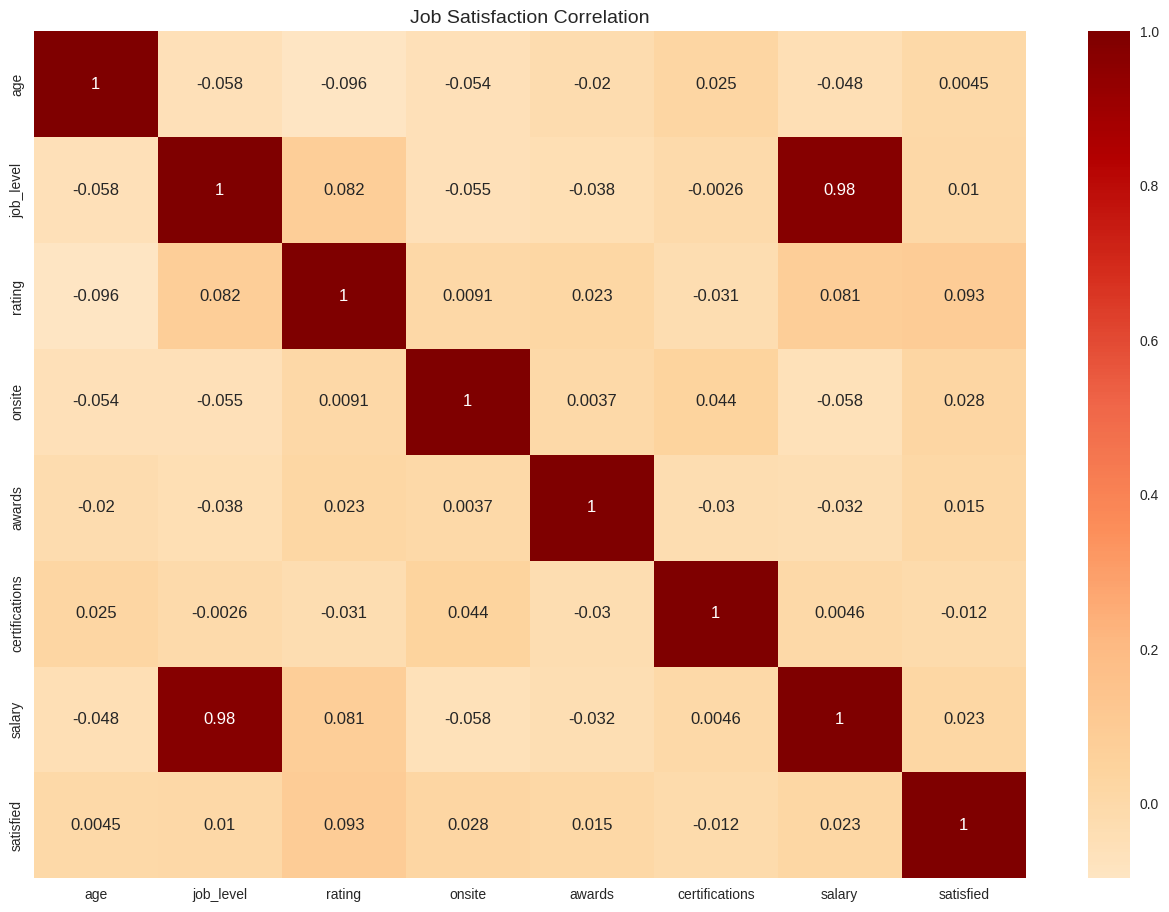

In [ ]:
#Updated Heatmap with all fields included
plt.figure(figsize=(16,11))
sns.heatmap(employee_data.corr(), annot=True, cmap='OrRd', center = .36)
plt.title('Job Satisfaction Correlation', fontsize=14)



In [ ]:
#Removing items with negative correlation with job satisfaction from the list and re-running correlation for clarity.  This allows a focus on items with strong correlation to our key index--job satisfaction.
ModifiedCorr = employee_data.drop(['age', 'certifications'], axis=1)
ModifiedCorr.corr()


job_level    rating    onsite    awards    salary  satisfied
job_level   1.000000  0.081829 -0.054843 -0.037793  0.977539   0.010093
rating      0.081829  1.000000  0.009079  0.022983  0.081034   0.093024
onsite     -0.054843  0.009079  1.000000  0.003722 -0.057936   0.027637
awards     -0.037793  0.022983  0.003722  1.000000 -0.032339   0.014763
salary      0.977539  0.081034 -0.057936 -0.032339  1.000000   0.023168
satisfied   0.010093  0.093024  0.027637  0.014763  0.023168   1.000000

In [ ]:
# Check for duplicate records: No duplicate record exists
employee_data.duplicated().sum()

0

In [ ]:
# Checking for % of Missing Values: There are missing values in features as resulted below
employee_data.isnull().sum()

emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

# Imputation is not needed because there are no missing values
Imputation refers to the process of filling in missing values in a dataset. Missing values are a common issue in real-world datasets, and imputation methods can help ensure that the data is complete and ready for analysis.


My dataset doesn't have any missing values which can be seen from the code snippets below 

#Visualization

In [ ]:
employee_data

emp_id  age        Dept location education    recruitment_type  \
0      HR8270   28          HR   Suburb        PG            Referral   
1    TECH1860   50  Technology   Suburb        PG             Walk-in   
2    TECH6390   43  Technology   Suburb        UG            Referral   
3     SAL6191   44       Sales     City        PG           On-Campus   
4      HR6734   33          HR     City        UG  Recruitment Agency   
..        ...  ...         ...      ...       ...                 ...   
495    HR5330   49          HR   Suburb        PG           On-Campus   
496  TECH9010   24  Technology   Suburb        UG            Referral   
497   MKT7801   34   Marketing     City        PG           On-Campus   
498  TECH5846   26  Technology     City        UG           On-Campus   
499  TECH7731   26  Technology     City        UG  Recruitment Agency   

     job_level  rating  onsite  awards  certifications  salary  satisfied  
0            5       2       0       1               0   86750          1  
1            3       5       1       2               1   42419          0  
2            4       1       0       2               0   65715          0  
3            2       3       1       0               0   29805          1  
4            2       1       0       5               0   29805          1  
..         ...     ...     ...     ...             ...     ...        ...  
495          2       5       0       6               0   29805          1  
496          2       4       0       2               0   29805          0  
497          1       3       0       2               0   24076          1  
498          2       1       1       1               1   29805          0  
499          3       4       0       3               0   42419          0  

[500 rows x 13 columns]

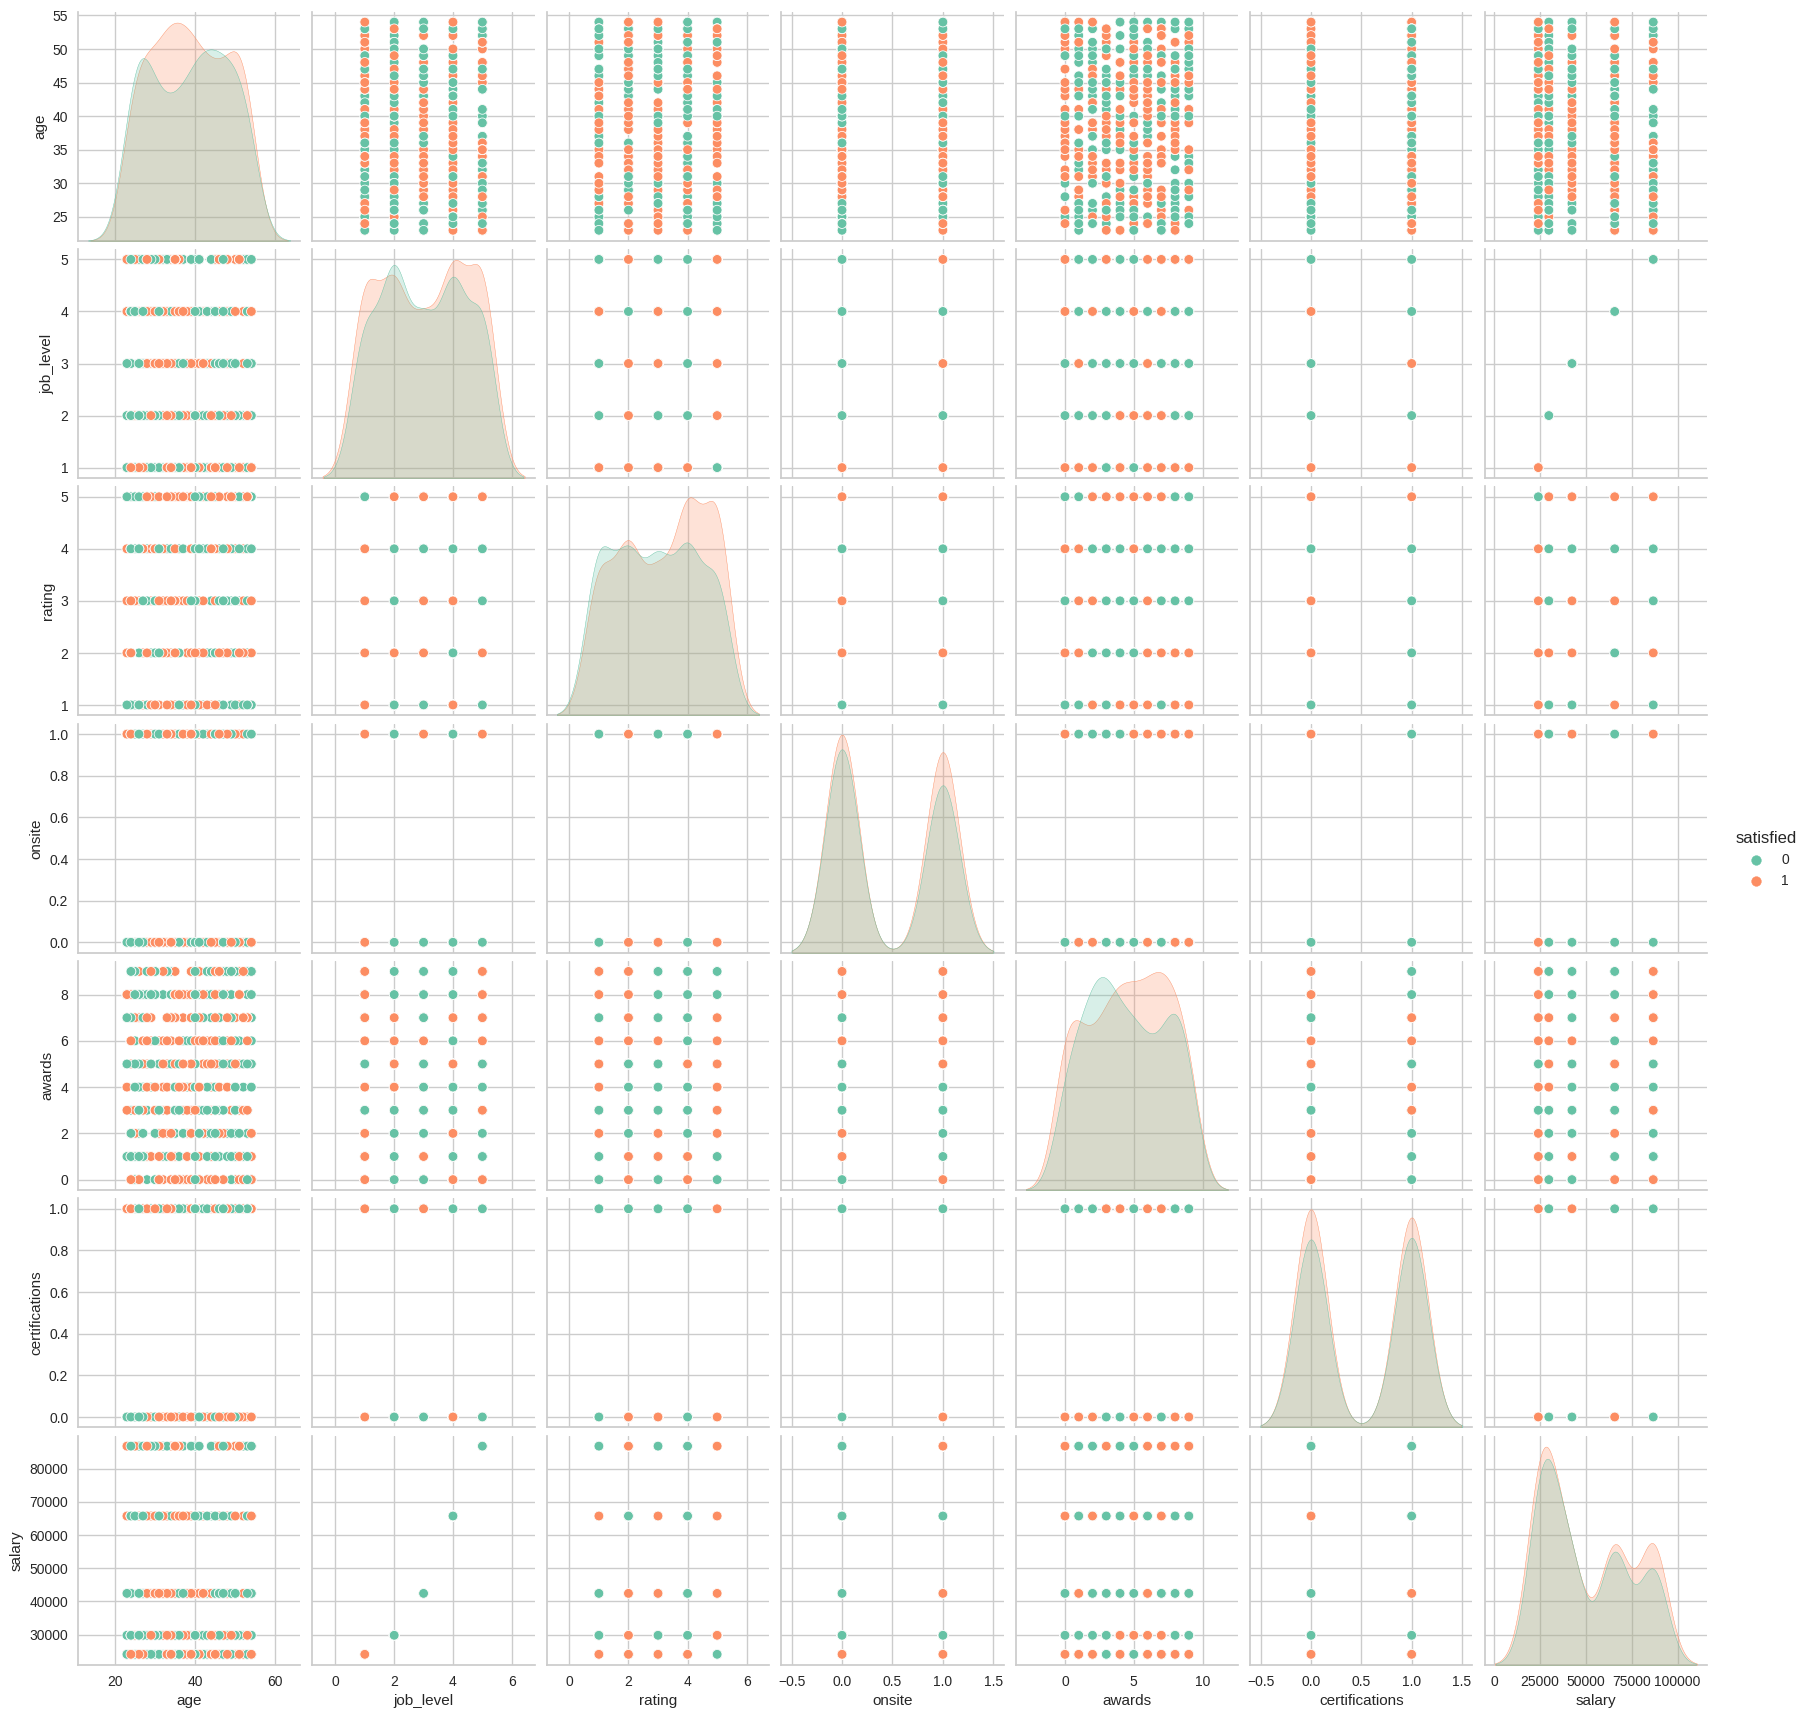

In [ ]:
#pair plot to check the colinearity
sns.pairplot(employee_data,hue='satisfied');


##Replacing the categorical values in a DataFrame column with their corresponding integer codes, effectively converting categorical data to numerical data by using the code below

In [ ]:
ls = ['Dept', 'location', 'education', 'recruitment_type']
for i in ls:
    unique_vals = employee_data[i].unique()
    employee_data[i].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))),
           inplace=True)

In [ ]:
employee_data = employee_data.drop(['emp_id'], axis=1)
employee_data

age  Dept  location  education  recruitment_type  job_level  rating  \
0     28     0         0          0                 0          5       2   
1     50     1         0          0                 1          3       5   
2     43     1         0          1                 0          4       1   
3     44     2         1          0                 2          2       3   
4     33     0         1          1                 3          2       1   
..   ...   ...       ...        ...               ...        ...     ...   
495   49     0         0          0                 2          2       5   
496   24     1         0          1                 0          2       4   
497   34     4         1          0                 2          1       3   
498   26     1         1          1                 2          2       1   
499   26     1         1          1                 3          3       4   

     onsite  awards  certifications  salary  satisfied  
0         0       1               0   86750          1  
1         1       2               1   42419          0  
2         0       2               0   65715          0  
3         1       0               0   29805          1  
4         0       5               0   29805          1  
..      ...     ...             ...     ...        ...  
495       0       6               0   29805          1  
496       0       2               0   29805          0  
497       0       2               0   24076          1  
498       1       1               1   29805          0  
499       0       3               0   42419          0  

[500 rows x 12 columns]

In [ ]:
numericalData = employee_data.select_dtypes(["float64","int64"]).columns.tolist()

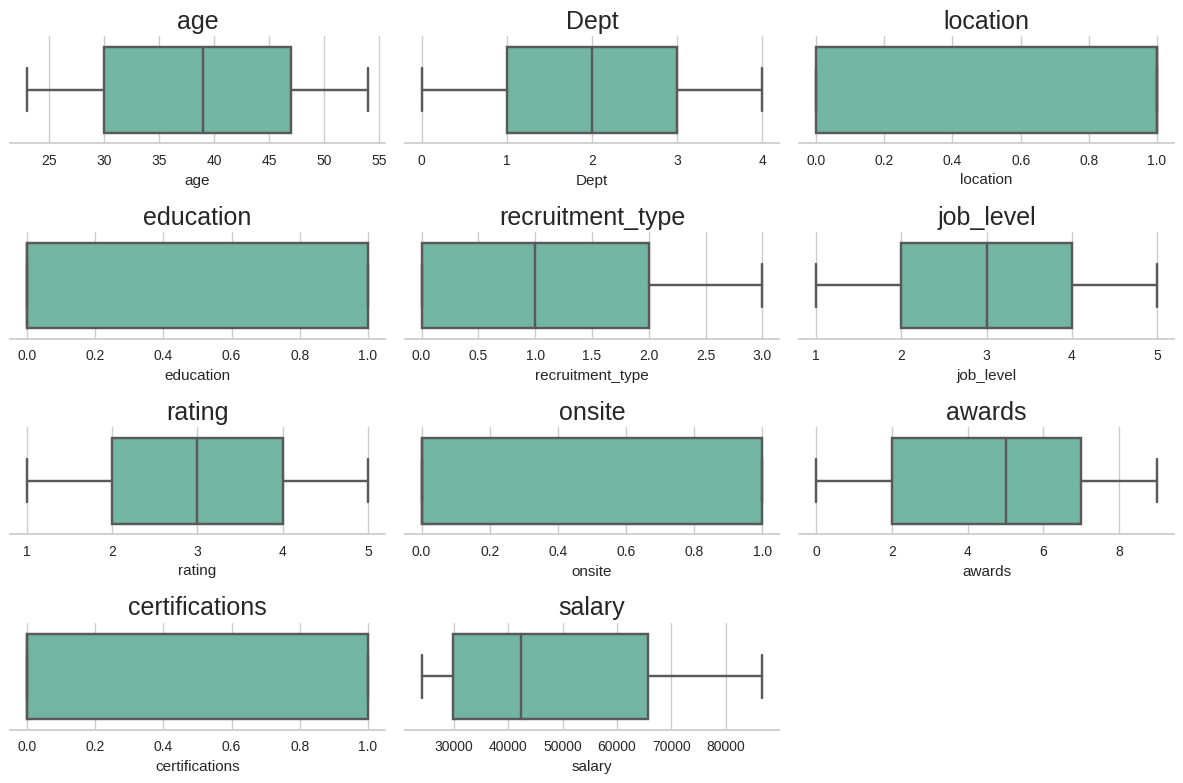

In [ ]:
plt.figure(figsize=(12,8))
for i, variable in enumerate(employee_data.select_dtypes(["float64","int64"]).columns[:-1]):
    plt.subplot(4,3,i+1)
    sns.set_palette('Set2')
    sns.boxplot(x=employee_data[variable],data=employee_data,orient="v")
    sns.despine(top=True,right=True,left=True)
    plt.tight_layout()
    plt.title(numericalData[i],size = 18)

###From the above data we can say that all features are in comparable range which makes the model not to be more biased towards one feature

<Axes: >

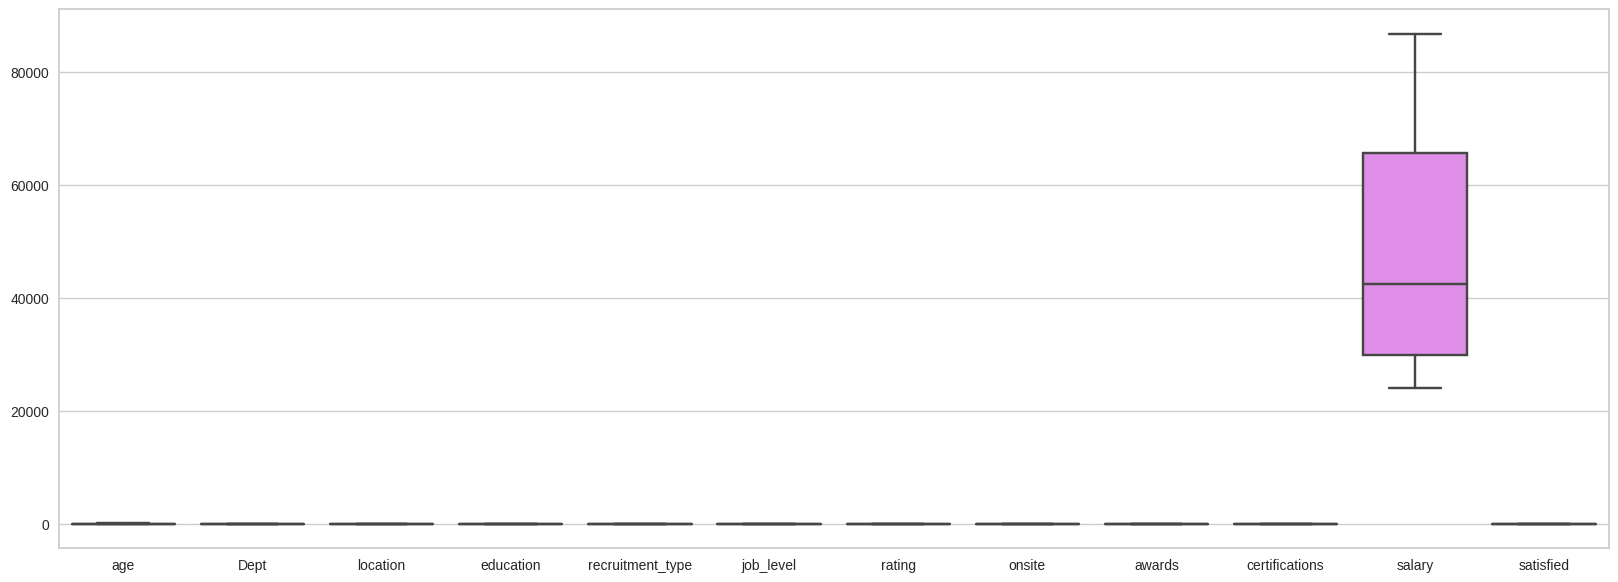

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=employee_data)

In [ ]:
# Data Scaling using min-max Scaler
min_max_scaler = preprocessing.MinMaxScaler()

scale_cols = ['salary']

employee_data[scale_cols] = min_max_scaler.fit_transform(employee_data[scale_cols]) 

<Axes: >

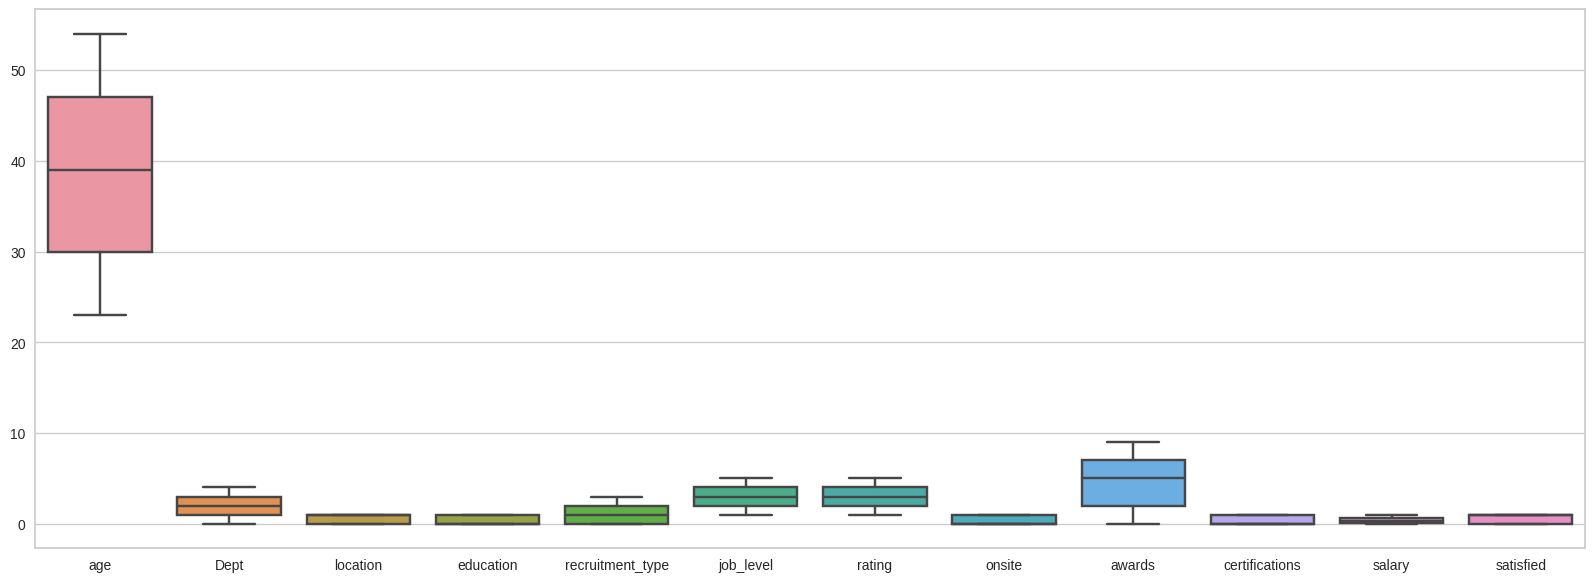

In [ ]:
#Predictor  and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=employee_data)

<Axes: >

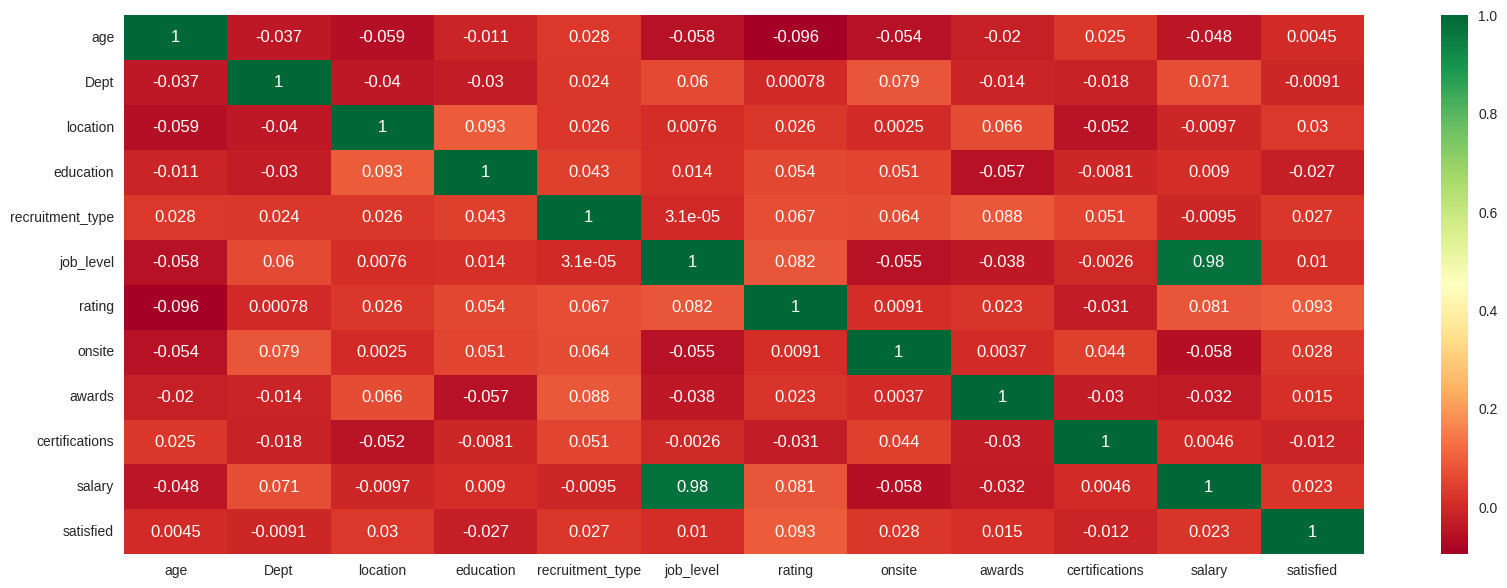

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(employee_data.corr(), annot=True, cmap='RdYlGn')

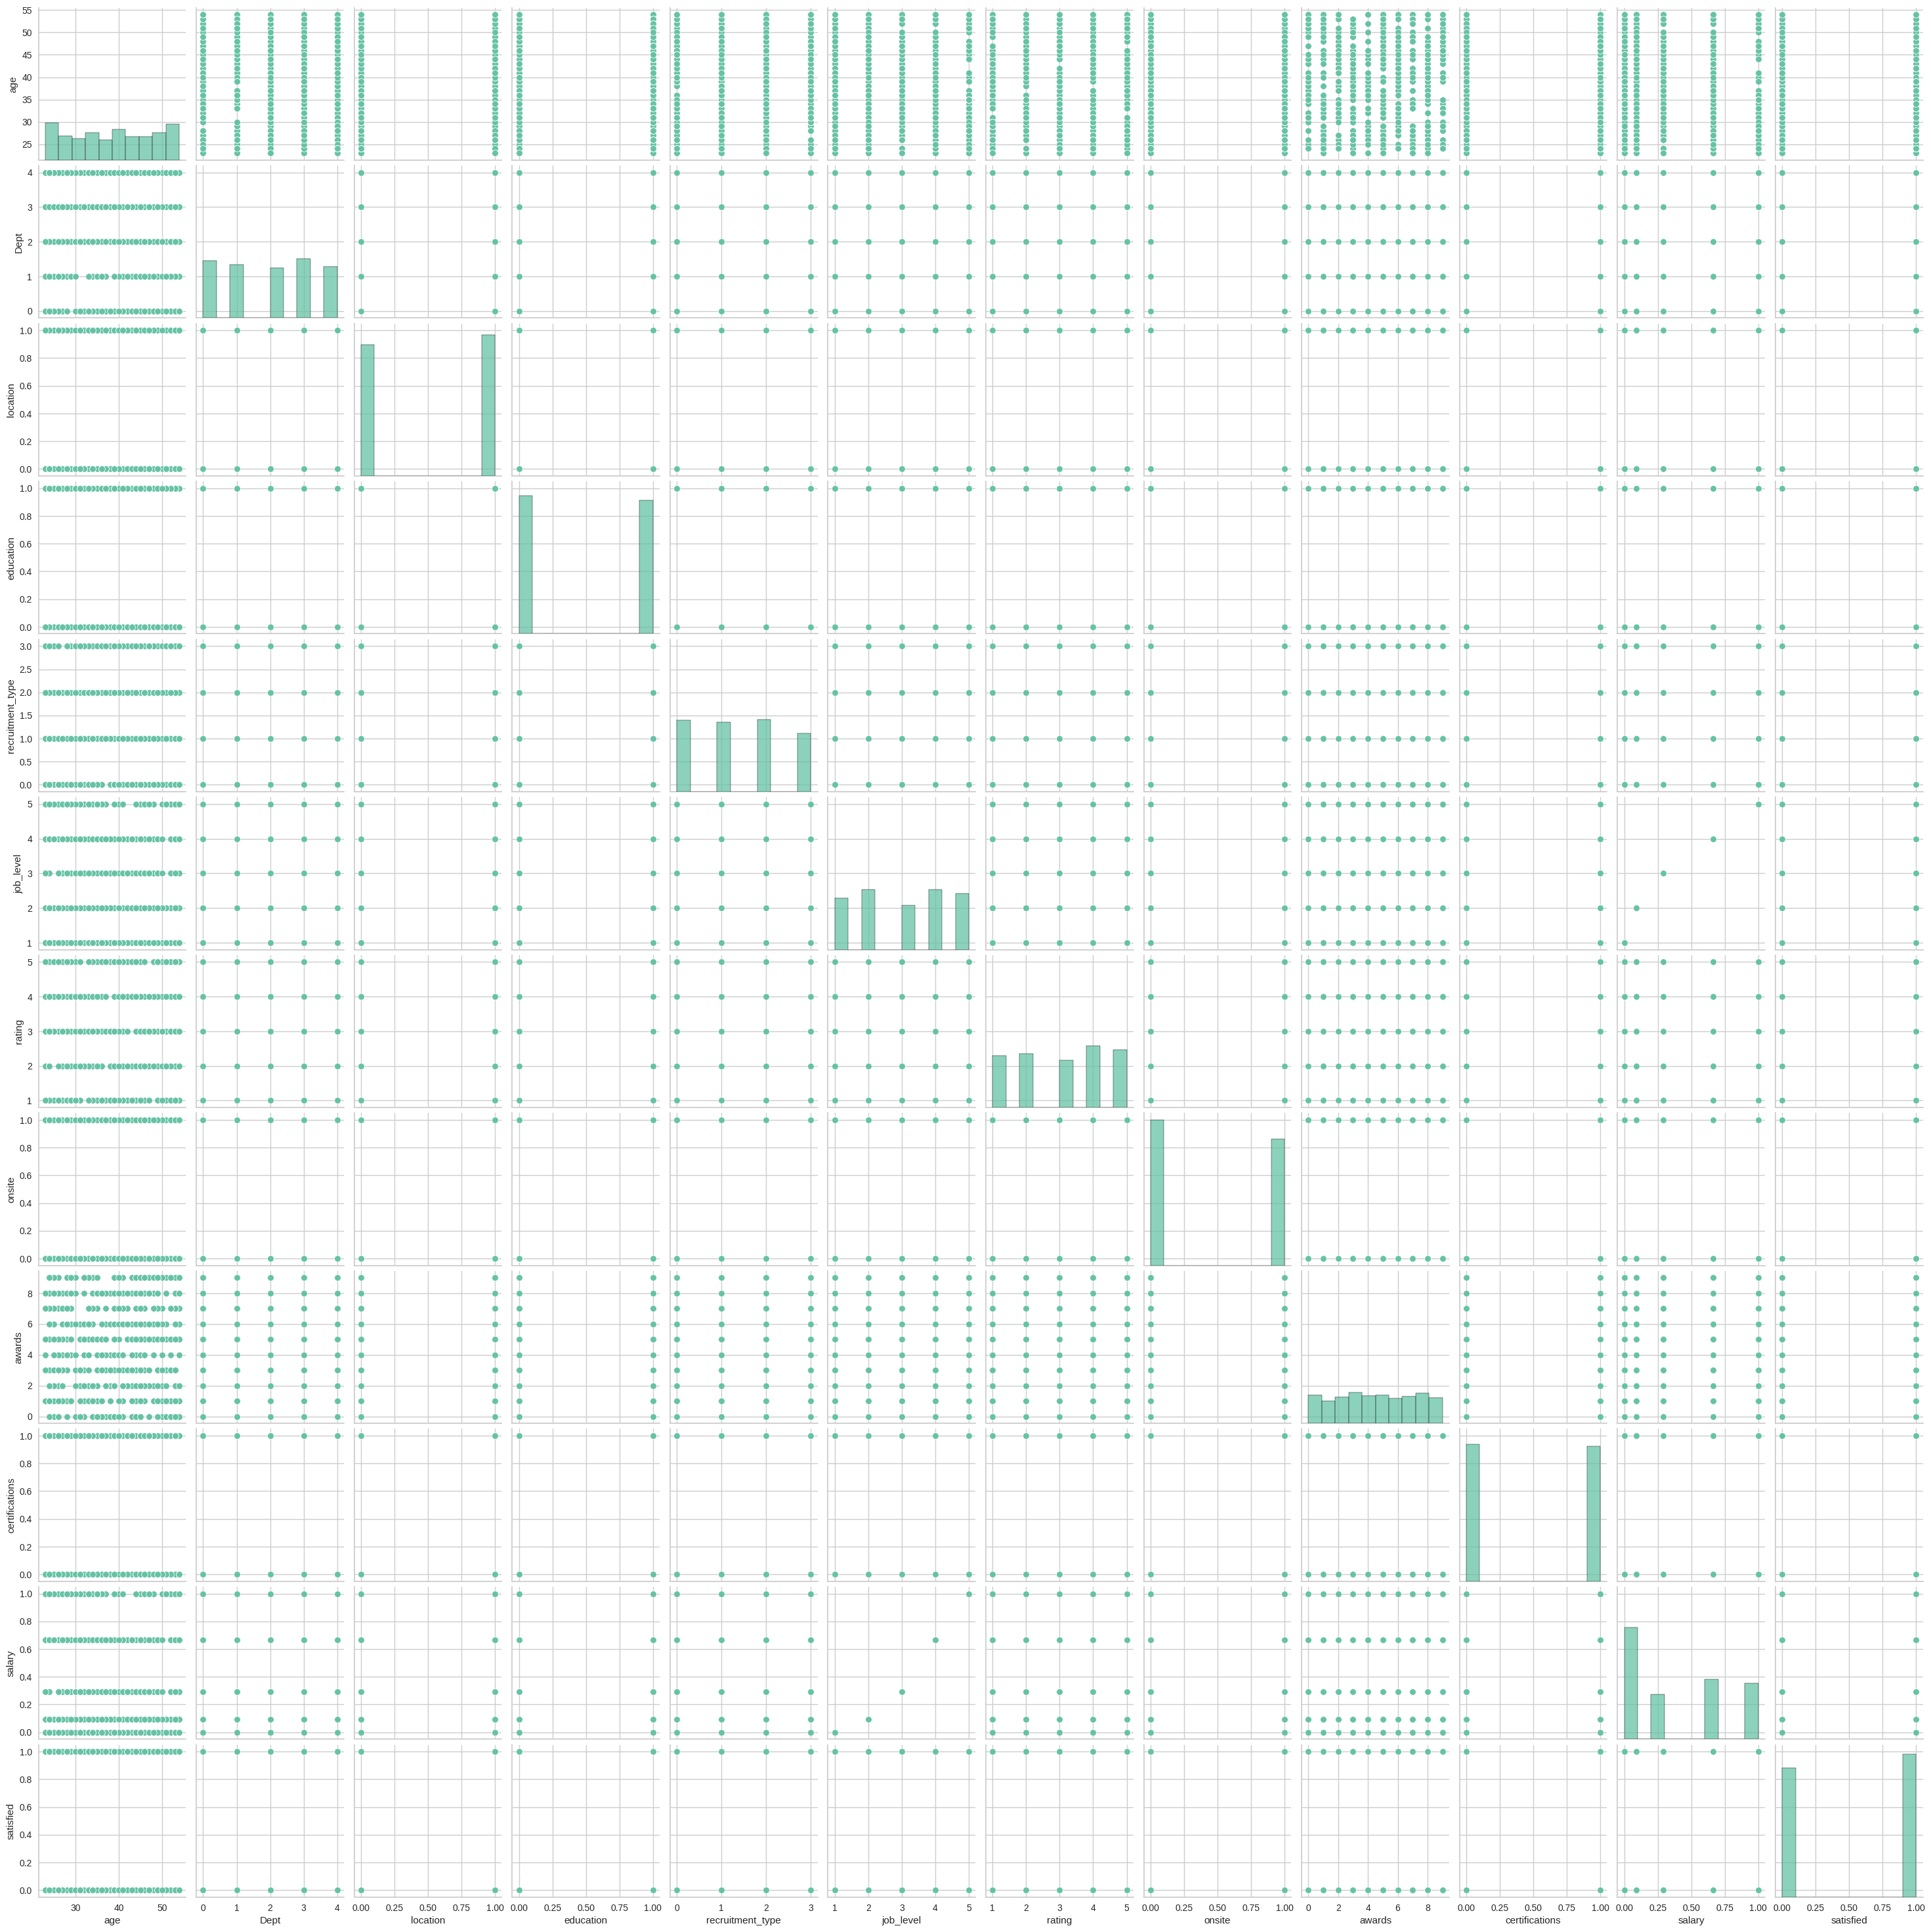

In [ ]:
#pair plot to check the colinearity
sns.pairplot(employee_data)

#What kind of data exploration did you do?
Preliminary findings from the EDA.

Datatype Check - It contains both numerical and categorical values
Missing Data Check - This Dataset didn't had any missing values in any of the features.
Distribution of training data - I checked the probability distribution of each and every feature in the training dataset
Correlation Check - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that the didn't had any significant multi colinearity issues.
Barplot - Performed Barplot analysis to findout how a variable impacts the employee satisfaction
The above graphs are a cohesive representation of how satisfied the employee is changing w.r.t. all the significant variables.


#Data Cleaning
This dataset contains is relatively much cleaner which has no missing values

#Feature Selection
The process of choosing the characteristics that are pertinent to a machine learning model is known as feature selection. It entails choosing only those attributes that significantly influence the output of the model.

Think about the scenario where you visit a department shop to buy groceries. A product contains a wealth of data, such as the product's category, expiration date, retail price, ingredients, and manufacturing information. All of this data pertains to the product's features. Before purchasing a product, you often examine the brand, retail price, expiration date, and if it is vegetarian or not. However, you are not worried about the manufacturing area. As a result, the manufacturing specifics are unimportant, and brand, retail price, expiration date, and vegetarian/non-vegetarian status are relevant features. How does feature selection work?

In [ ]:
#Using OLS for finding the p value to check the significant features
numericalData = employee_data.select_dtypes(["float64","int64"]).columns.tolist()

model = sm.OLS(employee_data['satisfied'], employee_data[numericalData]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              satisfied   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.007e+30
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        01:15:03   Log-Likelihood:                          15796.
No. Observations:                 500   AIC:                                 -3.157e+04
Df Residuals:                     488   BIC:                                 -3.152e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               1.051e-16    1.8e-17      5.830      0.000    6.97e-17     1.4e-16
Dept              3.296e-17   1.45e-16      0.228      0.820   -2.51e-16    3.17e-16
location         -5.343e-16   4.22e-16     -1.267      0.206   -1.36e-15    2.94e-16
education         6.939e-18    4.2e-16      0.017      0.987   -8.18e-16    8.32e-16
recruitment_type  1.006e-16   1.93e-16      0.522      0.602   -2.78e-16    4.79e-16
job_level         1.475e-16    5.3e-16      0.278      0.781   -8.94e-16    1.19e-15
rating              8.5e-17   1.43e-16      0.594      0.553   -1.96e-16    3.66e-16
onsite           -2.082e-17    4.2e-16     -0.050      0.961   -8.47e-16    8.05e-16
awards            6.072e-18    7.2e-17      0.084      0.933   -1.35e-16    1.48e-16
certifications    1.995e-16   4.15e-16      0.481      0.631   -6.16e-16    1.01e-15
salary           -2.637e-16    2.1e-15     -0.126      0.900   -4.38e-15    3.85e-15
satisfied            1.0000   4.18e-16   2.39e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       61.843   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.133
Skew:                          -0.059   Prob(JB):                     0.000190
Kurtosis:                       2.101   Cond. No.                         417.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering the significance value of 0.05 

* The age has the p-value 0, which is lesser and hence it is a non significant feature.
* The job level has the p-value 0.296, which is greater and hence it is a significant feature.
* The rating has the p-value 0.117, which is greater and hence it is a significant feature.
* The onsite has the p-value 0.567, which is greater and hence it is a significant feature.
* The awards has the p-value 0.510, which is greater and hence it is a significant feature.
* The certifications has the p-value 0.615, which is greater and hence it is a significant feature.
* The salary has the p-value 0.412, which is greater and hence it is a significant feature.
* The satisfied has the p-value 0, which is lesser and hence it is a non significant feature.

In [ ]:
x = employee_data.drop(['satisfied'], axis = 1)
y = employee_data['satisfied']

In [ ]:
# Spliting data into Training 65%, Test set 35%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 10)

In [ ]:
x_train.shape

(325, 11)

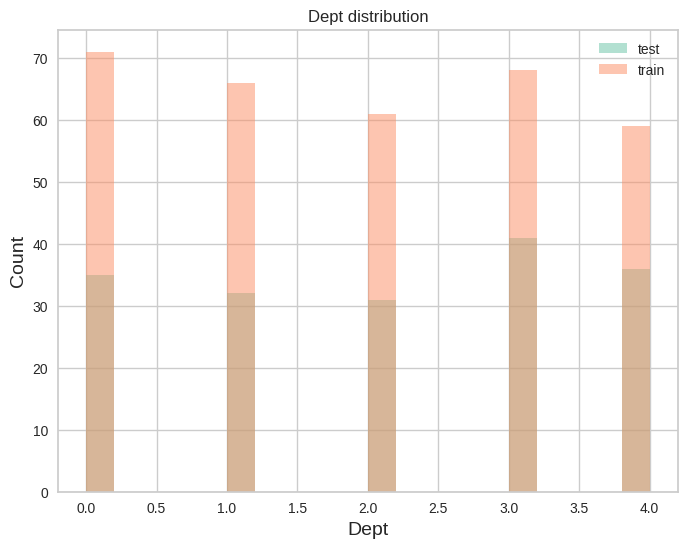

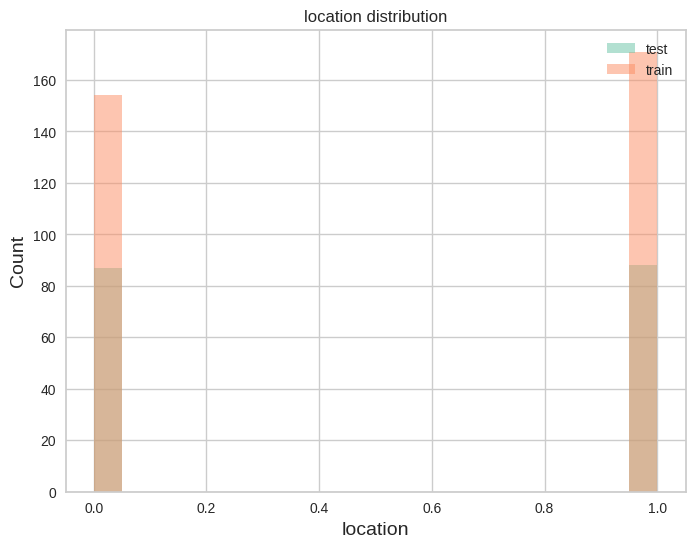

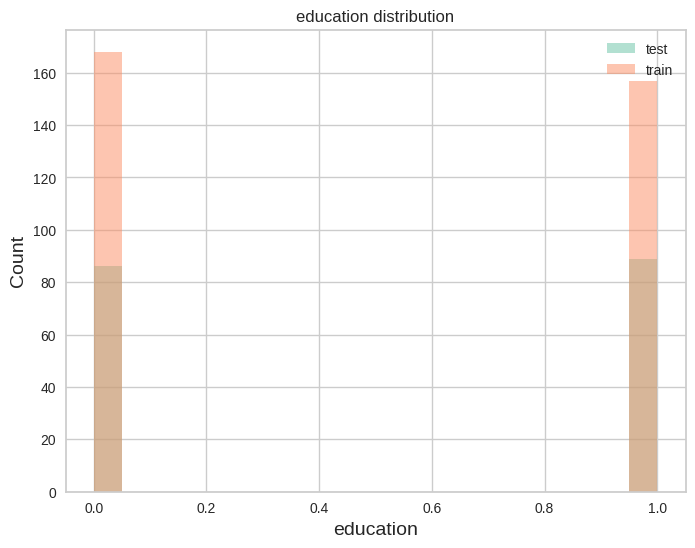

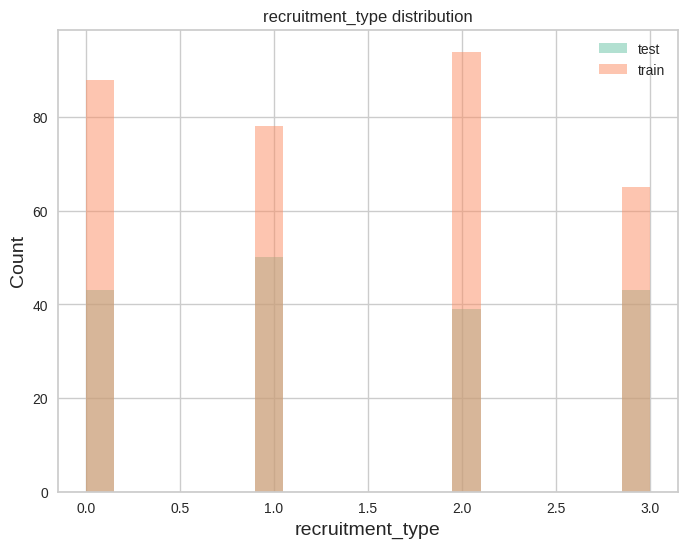

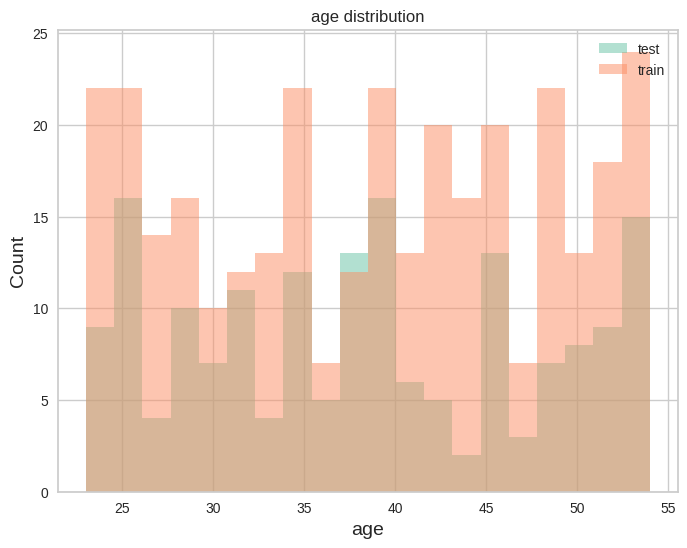

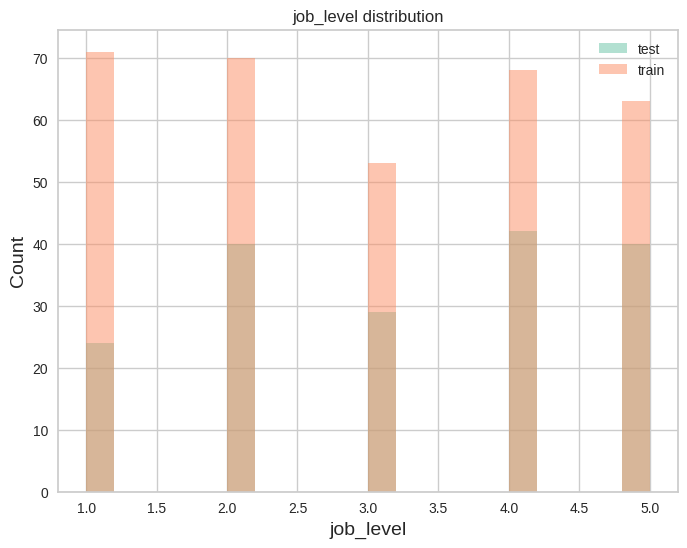

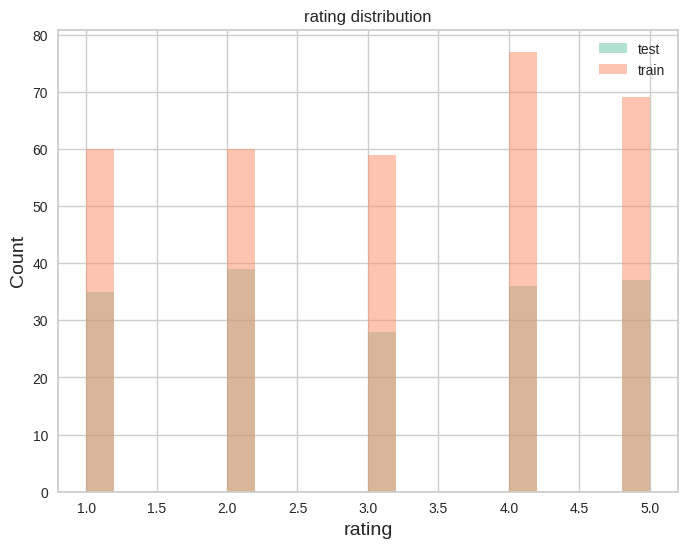

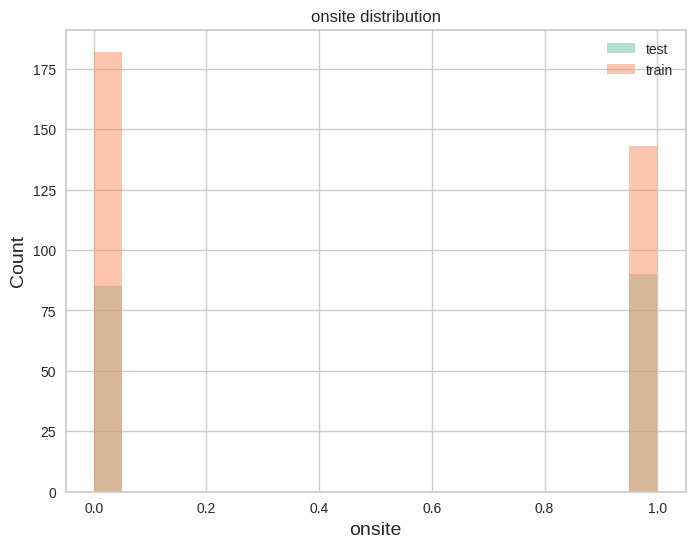

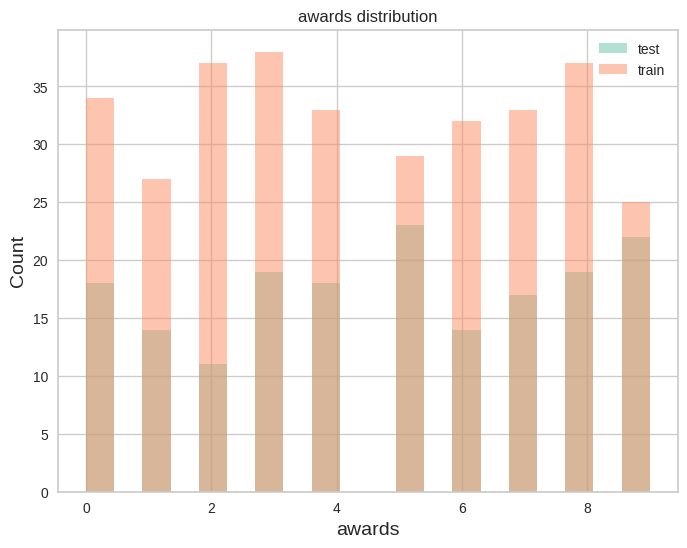

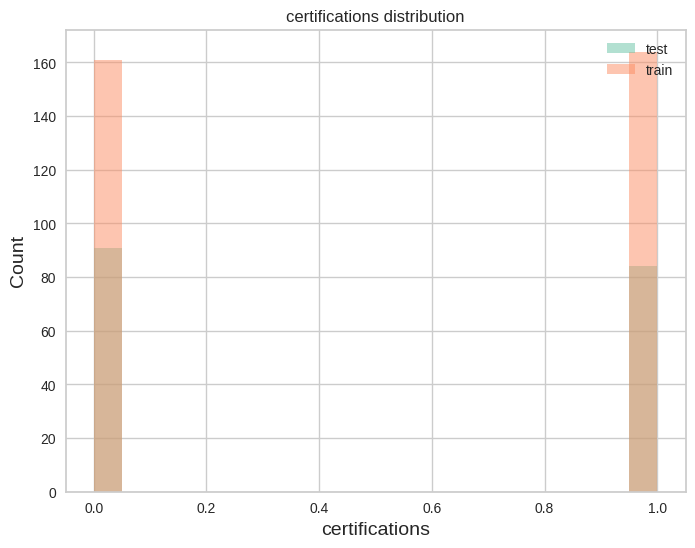

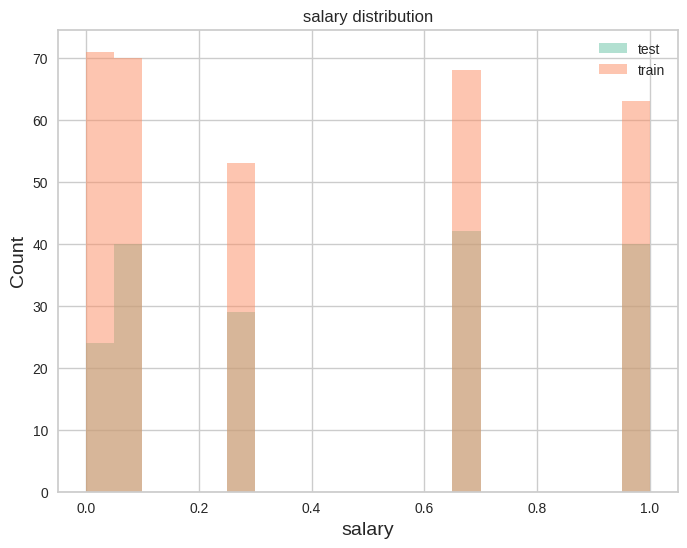

In [ ]:
# Looking the data for test, training and validation set

features_cols = ['Dept', 'location', 'education', 'recruitment_type','age','job_level','rating','onsite','awards','certifications','salary']

x_test_plot = x_test[features_cols]

#x_val_plot = x_val[features_cols]

x_train_plot = x_train[features_cols]

# Plotting the data to see the histogram
for c in x_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  #plt.hist(x_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(x_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(x_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
# A LOGISTICAL REGRESSION MODEL
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_model


LogisticRegression()

In [ ]:
y_pred_lr = lr_model.predict(x_test)
y_pred_lr

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 45.14 %


In [ ]:
# A SVM MODEL

svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred_svm = svm_model.predict(x_test)
y_pred_svm

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_svm)+" %")

The accuracy score achieved using Naive Bayes is: 50.29 %


In [ ]:
# K Nearest Neighbors Model

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_knn)+" %")

The accuracy score achieved using Naive Bayes is: 45.14 %


Out of Logistic Regression, Support Vector Machine, KNN, SVM better fits to our data as accuracy on SVM is 50.86% which is greater when compared to KNN and Logistic Regression.

In [ ]:
scores = [score_lr,score_svm,score_knn]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors"] 

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 45.14 %
The accuracy score achieved using Support Vector Machine is: 50.29 %
The accuracy score achieved using K-Nearest Neighbors is: 45.14 %


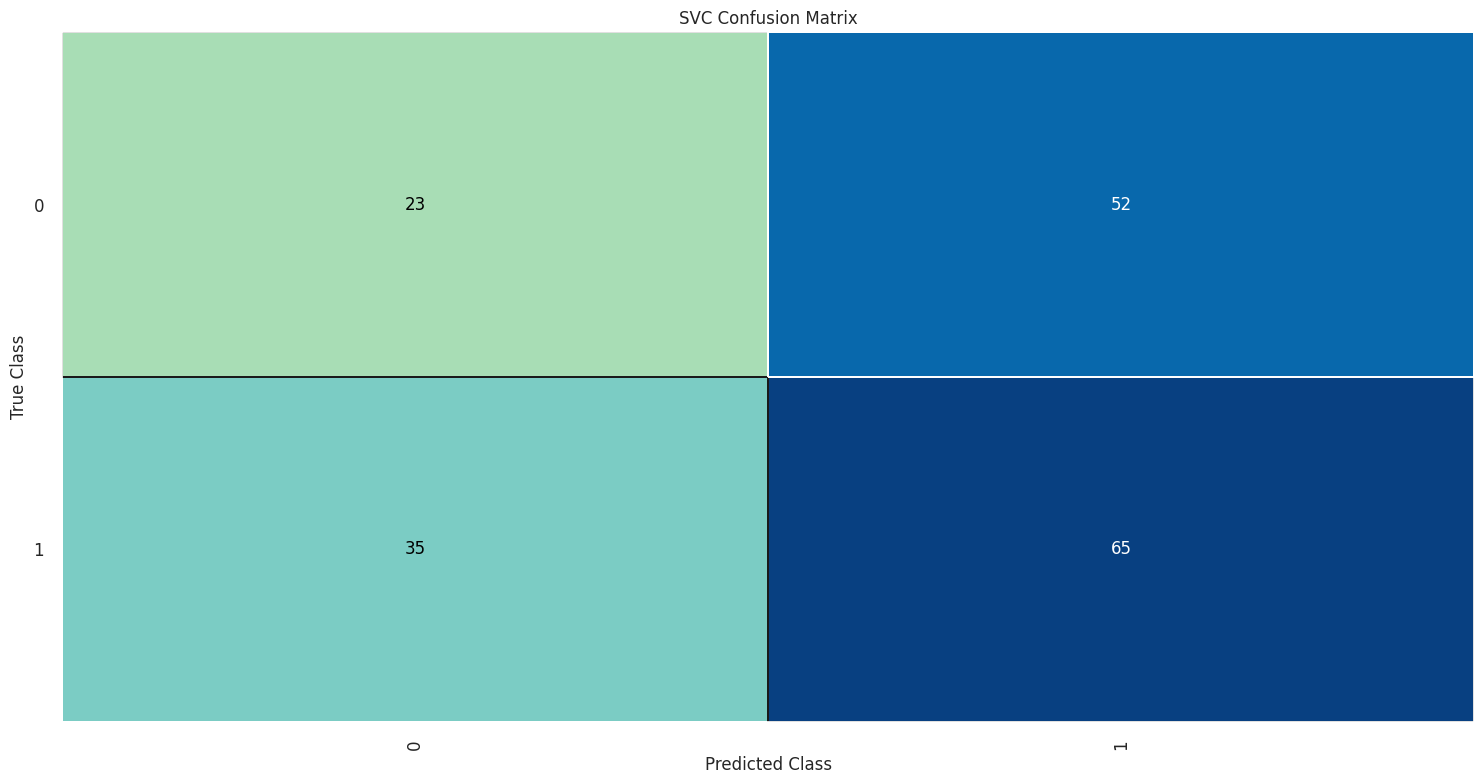

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# Plot the confusion matrix.
svm_model_cm = ConfusionMatrix(svm_model, cmap='GnBu')

svm_model_cm.fit(x_train, y_train)
svm_model_cm.score(x_test, y_test)
svm_model_cm.show()

# There are more false positive in stage 3 because trained data containes more stage 3 data points.  

In [ ]:
# accuracy, precision & recall report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35        75
           1       0.56      0.65      0.60       100

    accuracy                           0.50       175
   macro avg       0.48      0.48      0.47       175
weighted avg       0.49      0.50      0.49       175



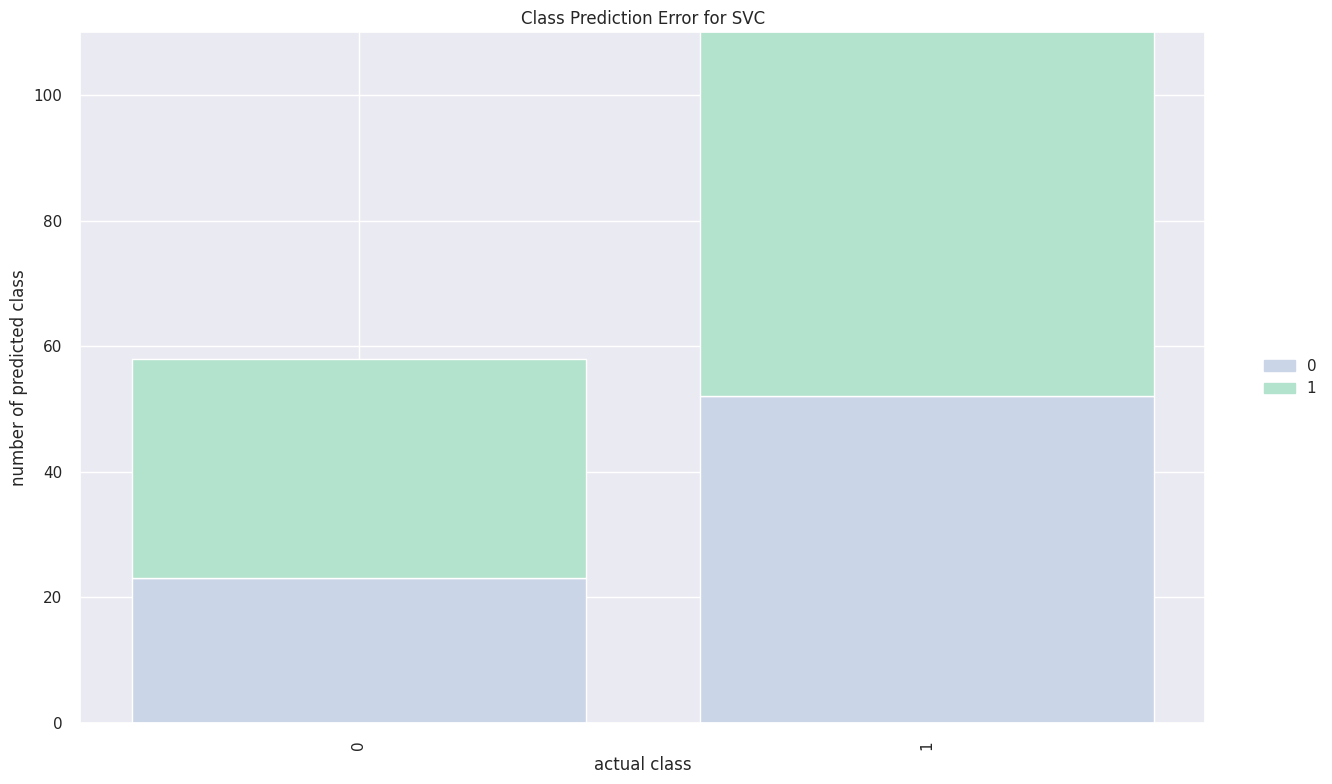

<Axes: title={'center': 'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(svm_model)

set_palette('pastel')

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)      
visualizer.show()

In [ ]:
#Understanding the important features 

perm = PermutationImportance(svm_model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

#How to handle missing data - Data Imputation techniques
The missing data points can be filled in either 
Remove rows containing blank data.
Use the mean, mode, or median to fill in the missing data points.

Model a regression, using MICE Imputation, using the remaining feature as the target and the missing value as the input.
Since there are no missing values in our dataset, let's artificially introduce some missing values and see how well each method recovers the data.

#Interpreting the Imputation Methods
We can infer from the aforementioned 6 readings that the MICE imputation approach performs better than the Mean imputation method since the imputed value is dependent on the other attributes.
We can also see that if there are more missing data points, the percentage of residual error rises. This leads us to the conclusion that the imputation approach recovers missing data more accurately the less of them there are in the dataset.

#Why Imputing data is always better than deleting the row ?
simply because of data loss. When we remove a row, we also remove a sample from the training set, which will hurt the model more than help it.
Choosing an imputation approach is simply a matter of preference. Although the study above suggests that MICE performs better in recovering the data, it has little to no positive effects on the model's accuracy once it has been built. However, using MICE is usually preferable because it can provide you with the nearest value.

# Remove 1%, 5%, 10% from 3 potentially contributing features and Impute back missing data using KNNImputer.

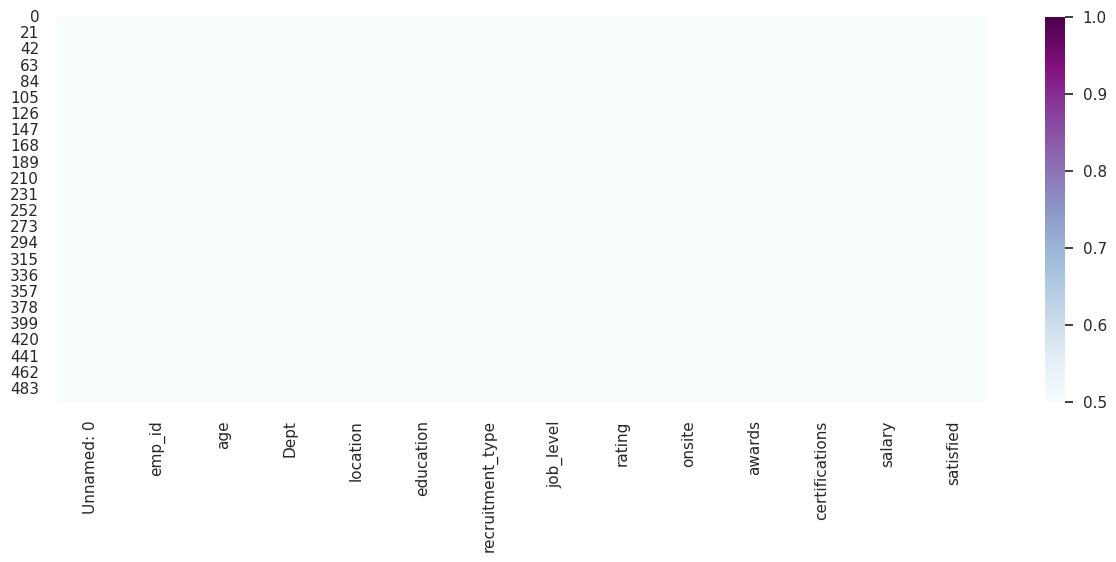

In [ ]:
def read_dataset():
  #Reading the cirrhosis dataset
  file_url = "https://raw.githubusercontent.com/sanjayvarma199/INFO6105-Data-Science-and-Engineering-Tools/main/Employee%20Satisfaction%20Index.csv"
  employeeData = pd.read_csv(file_url)

  # plot the count of missing values in feature after imputing the data
  plt.figure(figsize=(15,5))
  sns.heatmap(employeeData.isnull(),cmap='BuPu',vmin=0.5, vmax=1)

  return employeeData

employeeData = read_dataset()  

###### From above correlation map we could observe that **rating, age, salary:** features highly correlated with other features the most towards the prediction so now removing the some percentage of data from these columns and imputing data from back to see how a particular imputation methods contributes towards prediction on unseen data.

In [ ]:
def remove_data(employeeData):
  # remove 10% data from Copper, 5% data from Cholesterol, 1% data from Bilirubin
  remove_data_from_cols = {"rating": 0.10, "age": 0.05, "salary": 0.01}

  for feature, frac_to_remove in remove_data_from_cols.items():
    employeeData.loc[employeeData.sample(frac=frac_to_remove).index, feature] = np.nan

remove_data(employeeData)    

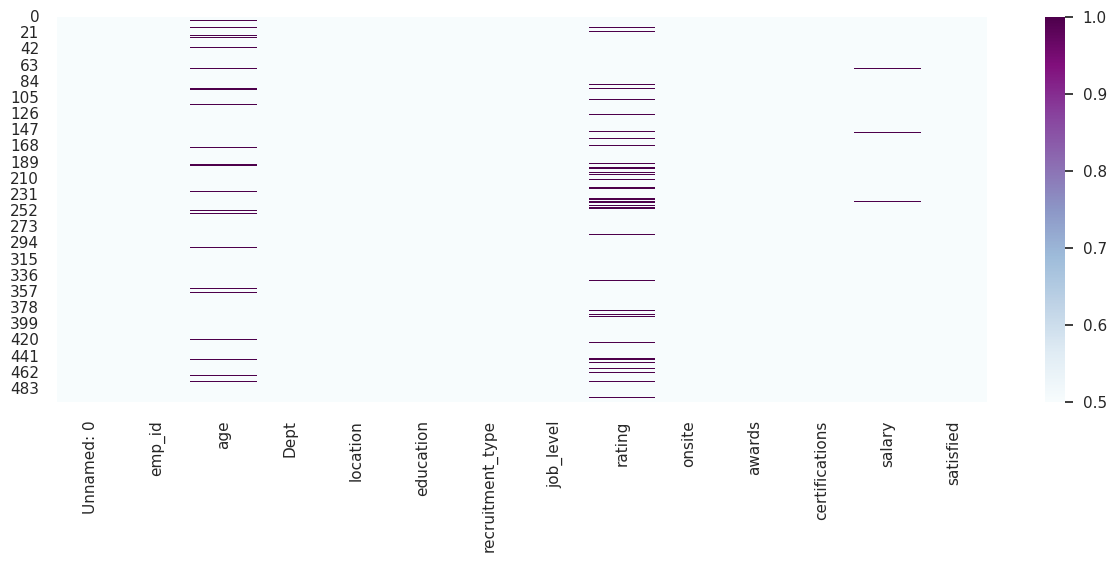

In [ ]:
def plot_missing_data(employeeData):
  # plot the count of missing values in feature after imputing the data
  plt.figure(figsize=(15,5))
  sns.heatmap(employeeData.isnull(),cmap='BuPu',vmin=0.5, vmax=1)

plot_missing_data(employeeData)  

From above graph we can dipict that data from rating, age, salary are missing in 10%, 5%, 1% respectively

In [ ]:
imputer = KNNImputer(n_neighbors=4)
df_filled = imputer.fit_transform(employeeData[["rating", "age", "salary"]])

In [ ]:
imputed_data = pd.DataFrame(df_filled, columns = ["rating", "age", "salary"])

employeeData["rating"] = imputed_data["rating"]
employeeData["age"] = imputed_data["age"]
employeeData["salary"] = imputed_data["salary"]

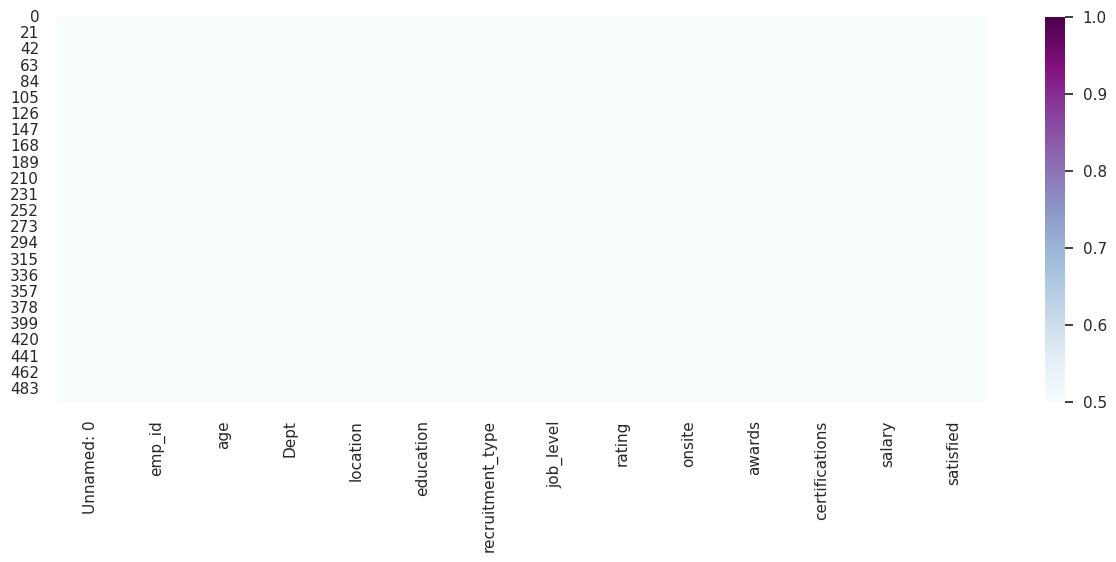

In [ ]:
plot_missing_data(employeeData)

In [ ]:
def split_data(employeeData):

  #Converting to Numeric Representations for Text Data to improve correlation
  ModifiedData = employeeData.replace(['HR','Technology','Sales', 'Purchasing', 'Marketing',], [1,2,3,4,5])
  ModifiedData = ModifiedData.replace(['Suburb', 'City'],[1,2])
  ModifiedData = ModifiedData.replace(['PG','UG'],[1,2])
  ModifiedData = ModifiedData.replace(['Referral','Walk-in','On-Campus','Recruitment Agency'],[1,2,3,4])
  ModifiedData

  x = ModifiedData.drop(['emp_id'], axis = 1)
  y = ModifiedData['satisfied']


  sm = SMOTE(k_neighbors = 3)
  x, y = sm.fit_resample(x, y)


  #Spliting data into Training 65% Test set 35%
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 10)

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data(employeeData)

In [ ]:
def train_model(x_train, x_test, y_train, y_test):
  # A LOGISTICAL REGRESSION MODEL
  lr_model = LogisticRegression()
  lr_model.fit(x_train,y_train)
  
  mse, bias, var = bias_variance_decomp(lr_model, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), loss='mse', num_rounds=200, random_seed=42)
  y_pred_lr = lr_model.predict(x_test)
  # summarize results
  print("====================== LOGISTICAL REGRESSION MODEL =================================")
  print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
  print('Avg Bias: %.3f' % bias)
  print('Avg Variance: %.3f' % var)
  print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,y_pred_lr))

  score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
  print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

  # A SVM MODEL
  svm_model = SVC()
  svm_model.fit(x_train,y_train)

  mse, bias, var = bias_variance_decomp(lr_model, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), loss='mse', num_rounds=200, random_seed=42)
  y_pred_svm = svm_model.predict(x_test)

  print("=============================== SVM MODEL =========================================")
  print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
  print('Avg Bias: %.3f' % bias)
  print('Avg Variance: %.3f' % var)
  print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,y_pred_svm))

  score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)
  print("The accuracy score achieved using Naive Bayes is: "+str(score_svm)+" %")

  # K Nearest Neighbors Model
  knn = KNeighborsClassifier(n_neighbors=7)
  knn.fit(x_train,y_train)

  print("=============================== KNN MODEL =========================================")
  mse, bias, var = bias_variance_decomp(lr_model, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), loss='mse', num_rounds=200, random_seed=42)
  y_pred_knn=knn.predict(x_test)

  print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
  print('Avg Bias: %.3f' % bias)
  print('Avg Variance: %.3f' % var)
  print('Mean Square error by Sckit-learn lib: %.3f' % metrics.mean_squared_error(y_test,y_pred_knn))

  score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
  print("The accuracy score achieved using Naive Bayes is: "+str(score_knn)+" %")
  print("====================================================================================")

  return score_lr,score_svm,score_knn

score_lr,score_svm,score_knn = train_model(x_train, x_test, y_train, y_test)

====================== LOGISTICAL REGRESSION MODEL =================================
MSE from bias_variance lib [avg expected loss]: 0.199
Avg Bias: 0.062
Avg Variance: 0.137
Mean Square error by Sckit-learn lib: 0.092
The accuracy score achieved using Logistic Regression is: 90.81 %
=============================== SVM MODEL =========================================
MSE from bias_variance lib [avg expected loss]: 0.199
Avg Bias: 0.062
Avg Variance: 0.137
Mean Square error by Sckit-learn lib: 0.584
The accuracy score achieved using Naive Bayes is: 41.62 %
=============================== KNN MODEL =========================================
MSE from bias_variance lib [avg expected loss]: 0.199
Avg Bias: 0.062
Avg Variance: 0.137
Mean Square error by Sckit-learn lib: 0.503
The accuracy score achieved using Naive Bayes is: 49.73 %


#Remove 1%, 5%, 10% from 3 potentially contributing features and Impute back missing data using SimpleImputer.

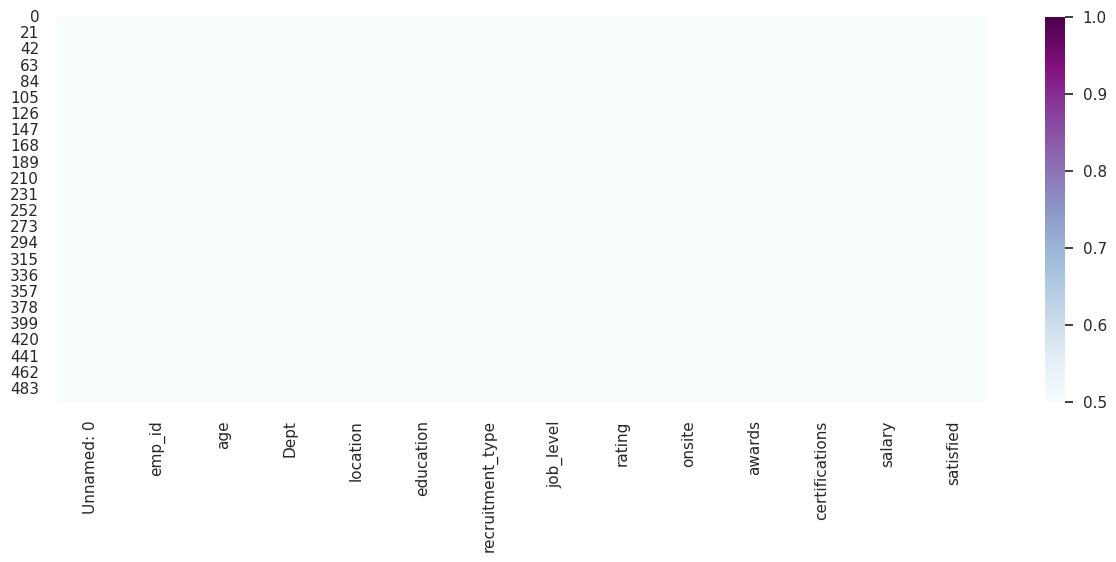

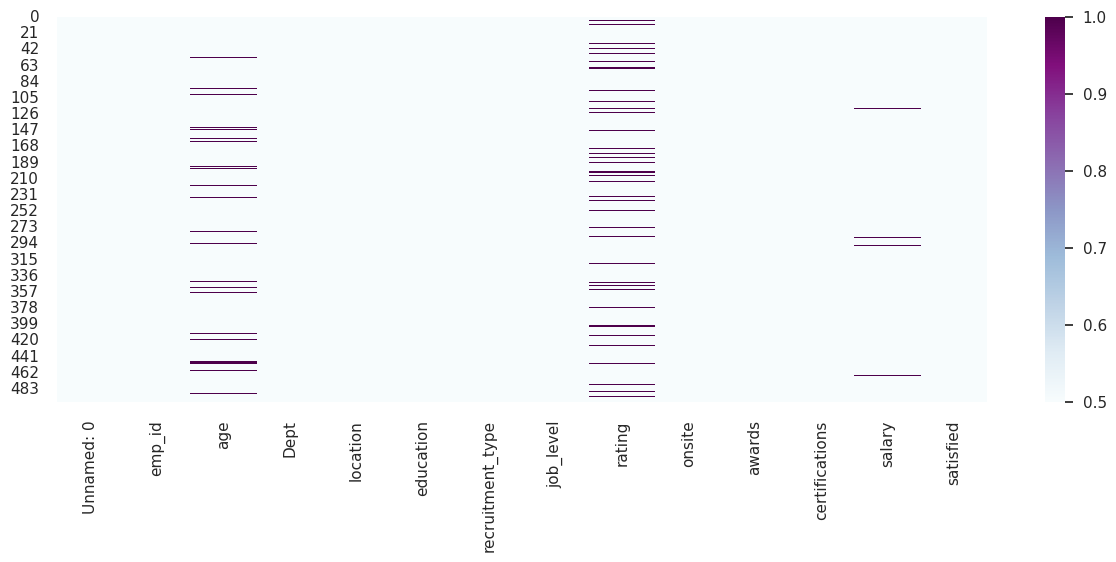

In [ ]:
employeeData = read_dataset()  
remove_data(employeeData)
plot_missing_data(employeeData) 

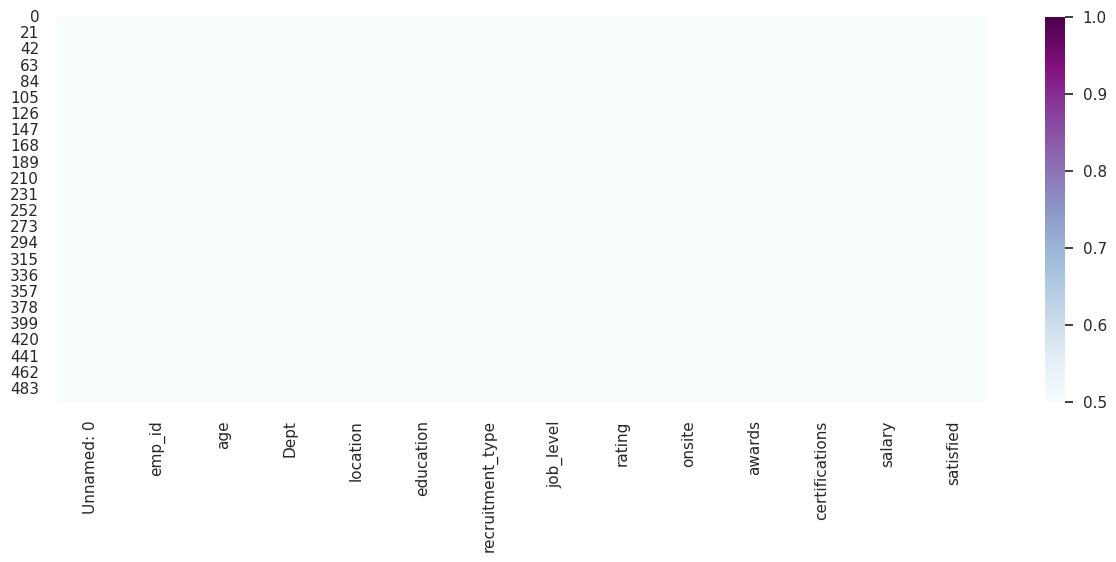

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_filled = imputer.fit_transform(employeeData[["rating", "age", "salary"]])

imputed_data = pd.DataFrame(df_filled, columns = ["rating", "age", "salary"])

employeeData["rating"] = imputed_data["rating"]
employeeData["age"] = imputed_data["age"]
employeeData["salary"] = imputed_data["salary"]

plot_missing_data(employeeData)

In [ ]:
x_train, x_test, y_train, y_test = split_data(employeeData)
score_lr,score_svm,score_knn = train_model(x_train, x_test, y_train, y_test)

====================== LOGISTICAL REGRESSION MODEL =================================
MSE from bias_variance lib [avg expected loss]: 0.244
Avg Bias: 0.074
Avg Variance: 0.170
Mean Square error by Sckit-learn lib: 0.151
The accuracy score achieved using Logistic Regression is: 84.86 %
=============================== SVM MODEL =========================================
MSE from bias_variance lib [avg expected loss]: 0.244
Avg Bias: 0.074
Avg Variance: 0.170
Mean Square error by Sckit-learn lib: 0.573
The accuracy score achieved using Naive Bayes is: 42.7 %
=============================== KNN MODEL =========================================
MSE from bias_variance lib [avg expected loss]: 0.244
Avg Bias: 0.074
Avg Variance: 0.170
Mean Square error by Sckit-learn lib: 0.486
The accuracy score achieved using Naive Bayes is: 51.35 %


# Remove 1%, 5%, 10% from 3 potentially contributing features and Impute back missing data using IterativeImputer.

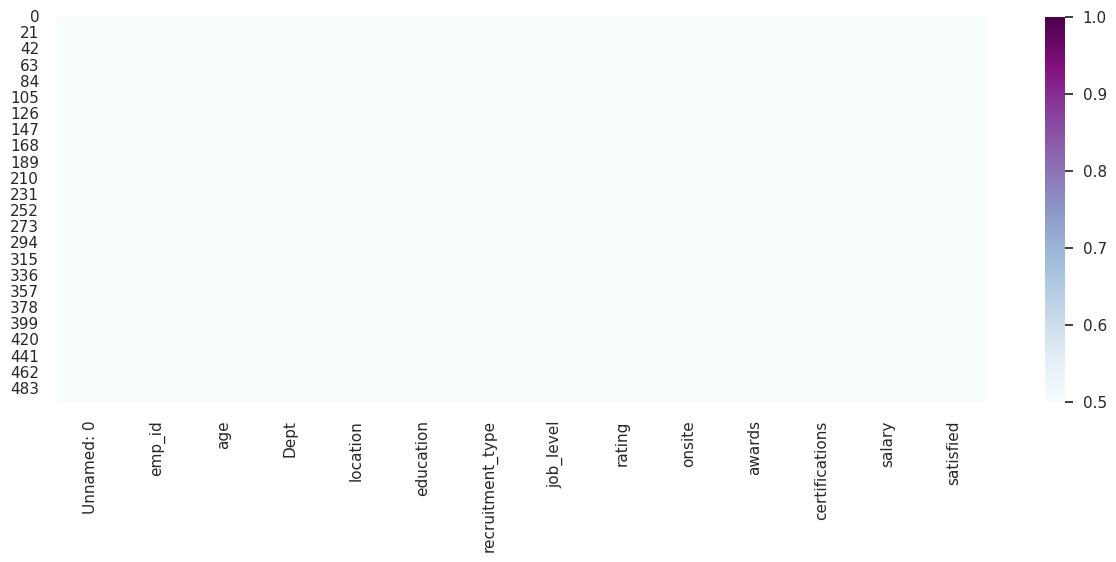

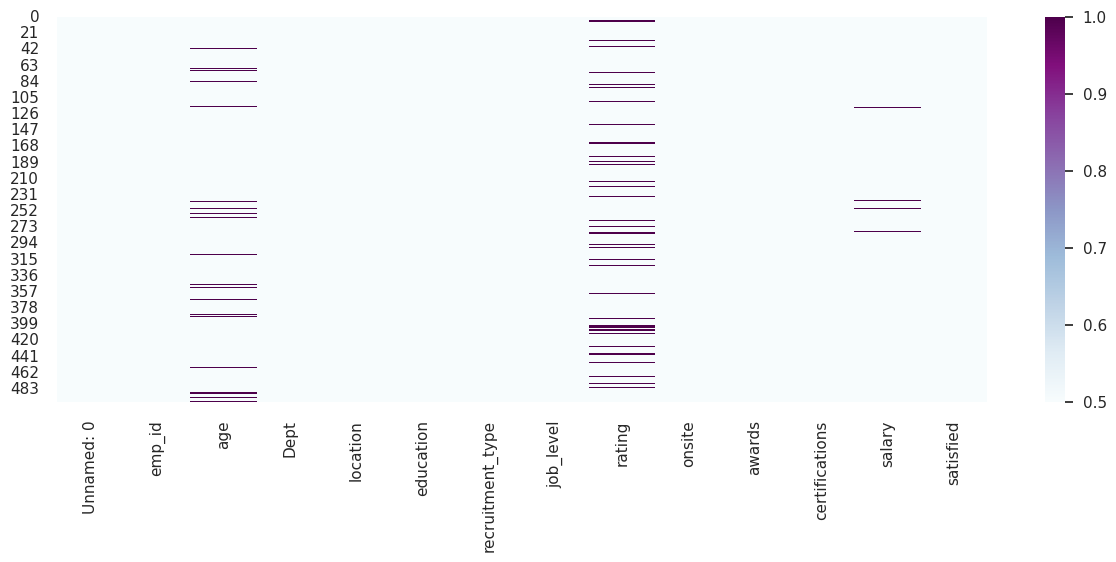

In [ ]:
employeeData = read_dataset()  
remove_data(employeeData)
plot_missing_data(employeeData) 

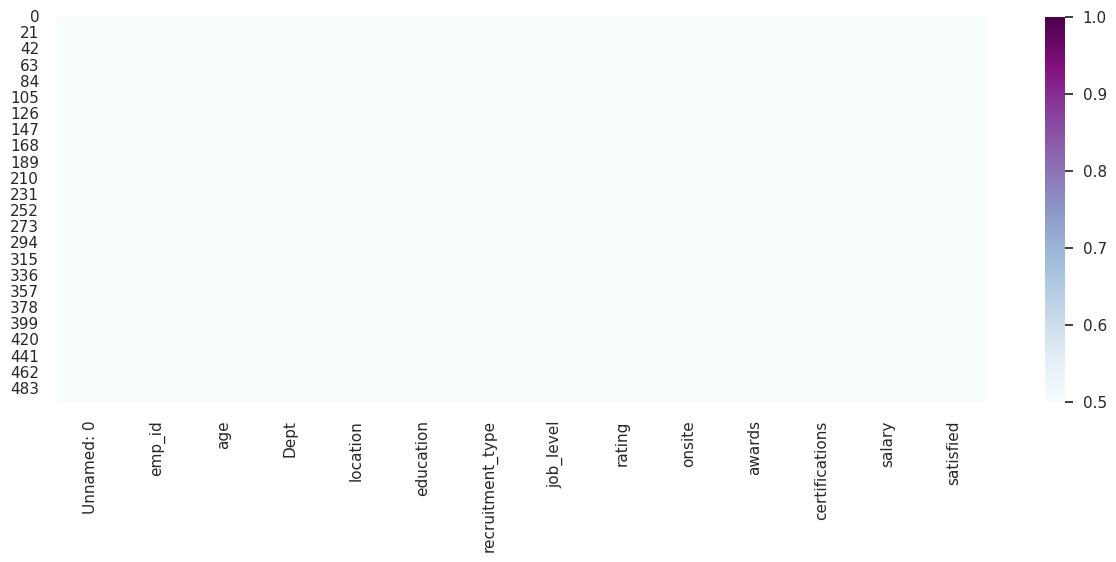

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)
df_filled = imputer.fit_transform(employeeData[["rating", "age", "salary"]])

imputed_data = pd.DataFrame(df_filled, columns = ["rating", "age", "salary"])

employeeData["rating"] = imputed_data["rating"]
employeeData["age"] = imputed_data["age"]
employeeData["salary"] = imputed_data["salary"]

plot_missing_data(employeeData)

In [ ]:
x_train, x_test, y_train, y_test = split_data(employeeData)
score_lr,score_svm,score_knn = train_model(x_train, x_test, y_train, y_test)

====================== LOGISTICAL REGRESSION MODEL =================================
MSE from bias_variance lib [avg expected loss]: 0.244
Avg Bias: 0.090
Avg Variance: 0.154
Mean Square error by Sckit-learn lib: 0.168
The accuracy score achieved using Logistic Regression is: 83.24 %
=============================== SVM MODEL =========================================
MSE from bias_variance lib [avg expected loss]: 0.244
Avg Bias: 0.090
Avg Variance: 0.154
Mean Square error by Sckit-learn lib: 0.578
The accuracy score achieved using Naive Bayes is: 42.16 %
=============================== KNN MODEL =========================================
MSE from bias_variance lib [avg expected loss]: 0.244
Avg Bias: 0.090
Avg Variance: 0.154
Mean Square error by Sckit-learn lib: 0.524
The accuracy score achieved using Naive Bayes is: 47.57 %


###3 different imputation methods (KNN Imputer, Simple Imputer, Iterative Imuter) is used to add missing values back and from above graphs we clearly observe that Iterative Imputer adds back data points and gives more accurate model to logistical regression

##Fit a tree-based model and interpret the nodes
##Tree based Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

-0.20725957464351175


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

In [ ]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-x"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
MODEL EVALUATION

r2_score of the model: 
-0.20725957464351175


In [ ]:
prediction_tree = DTree.predict(X_test)

In [ ]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))   
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.516994
RMSE: 0.549125
R2 -0.207260


[Text(0.5, 0.875, 'salary <= 0.046\nsquared_error = 0.249\nsamples = 335\nvalue = 0.531'),
 Text(0.25, 0.625, 'education <= 0.5\nsquared_error = 0.22\nsamples = 58\nvalue = 0.672'),
 Text(0.125, 0.375, 'Dept <= 0.5\nsquared_error = 0.16\nsamples = 30\nvalue = 0.8'),
 Text(0.0625, 0.125, 'squared_error = 0.25\nsamples = 8\nvalue = 0.5'),
 Text(0.1875, 0.125, 'squared_error = 0.083\nsamples = 22\nvalue = 0.909'),
 Text(0.375, 0.375, 'age <= 40.0\nsquared_error = 0.249\nsamples = 28\nvalue = 0.536'),
 Text(0.3125, 0.125, 'squared_error = 0.149\nsamples = 11\nvalue = 0.818'),
 Text(0.4375, 0.125, 'squared_error = 0.228\nsamples = 17\nvalue = 0.353'),
 Text(0.75, 0.625, 'rating <= 3.5\nsquared_error = 0.25\nsamples = 277\nvalue = 0.502'),
 Text(0.625, 0.375, 'certifications <= 0.5\nsquared_error = 0.245\nsamples = 146\nvalue = 0.432'),
 Text(0.5625, 0.125, 'squared_error = 0.249\nsamples = 73\nvalue = 0.534'),
 Text(0.6875, 0.125, 'squared_error = 0.221\nsamples = 73\nvalue = 0.329'),
 Text

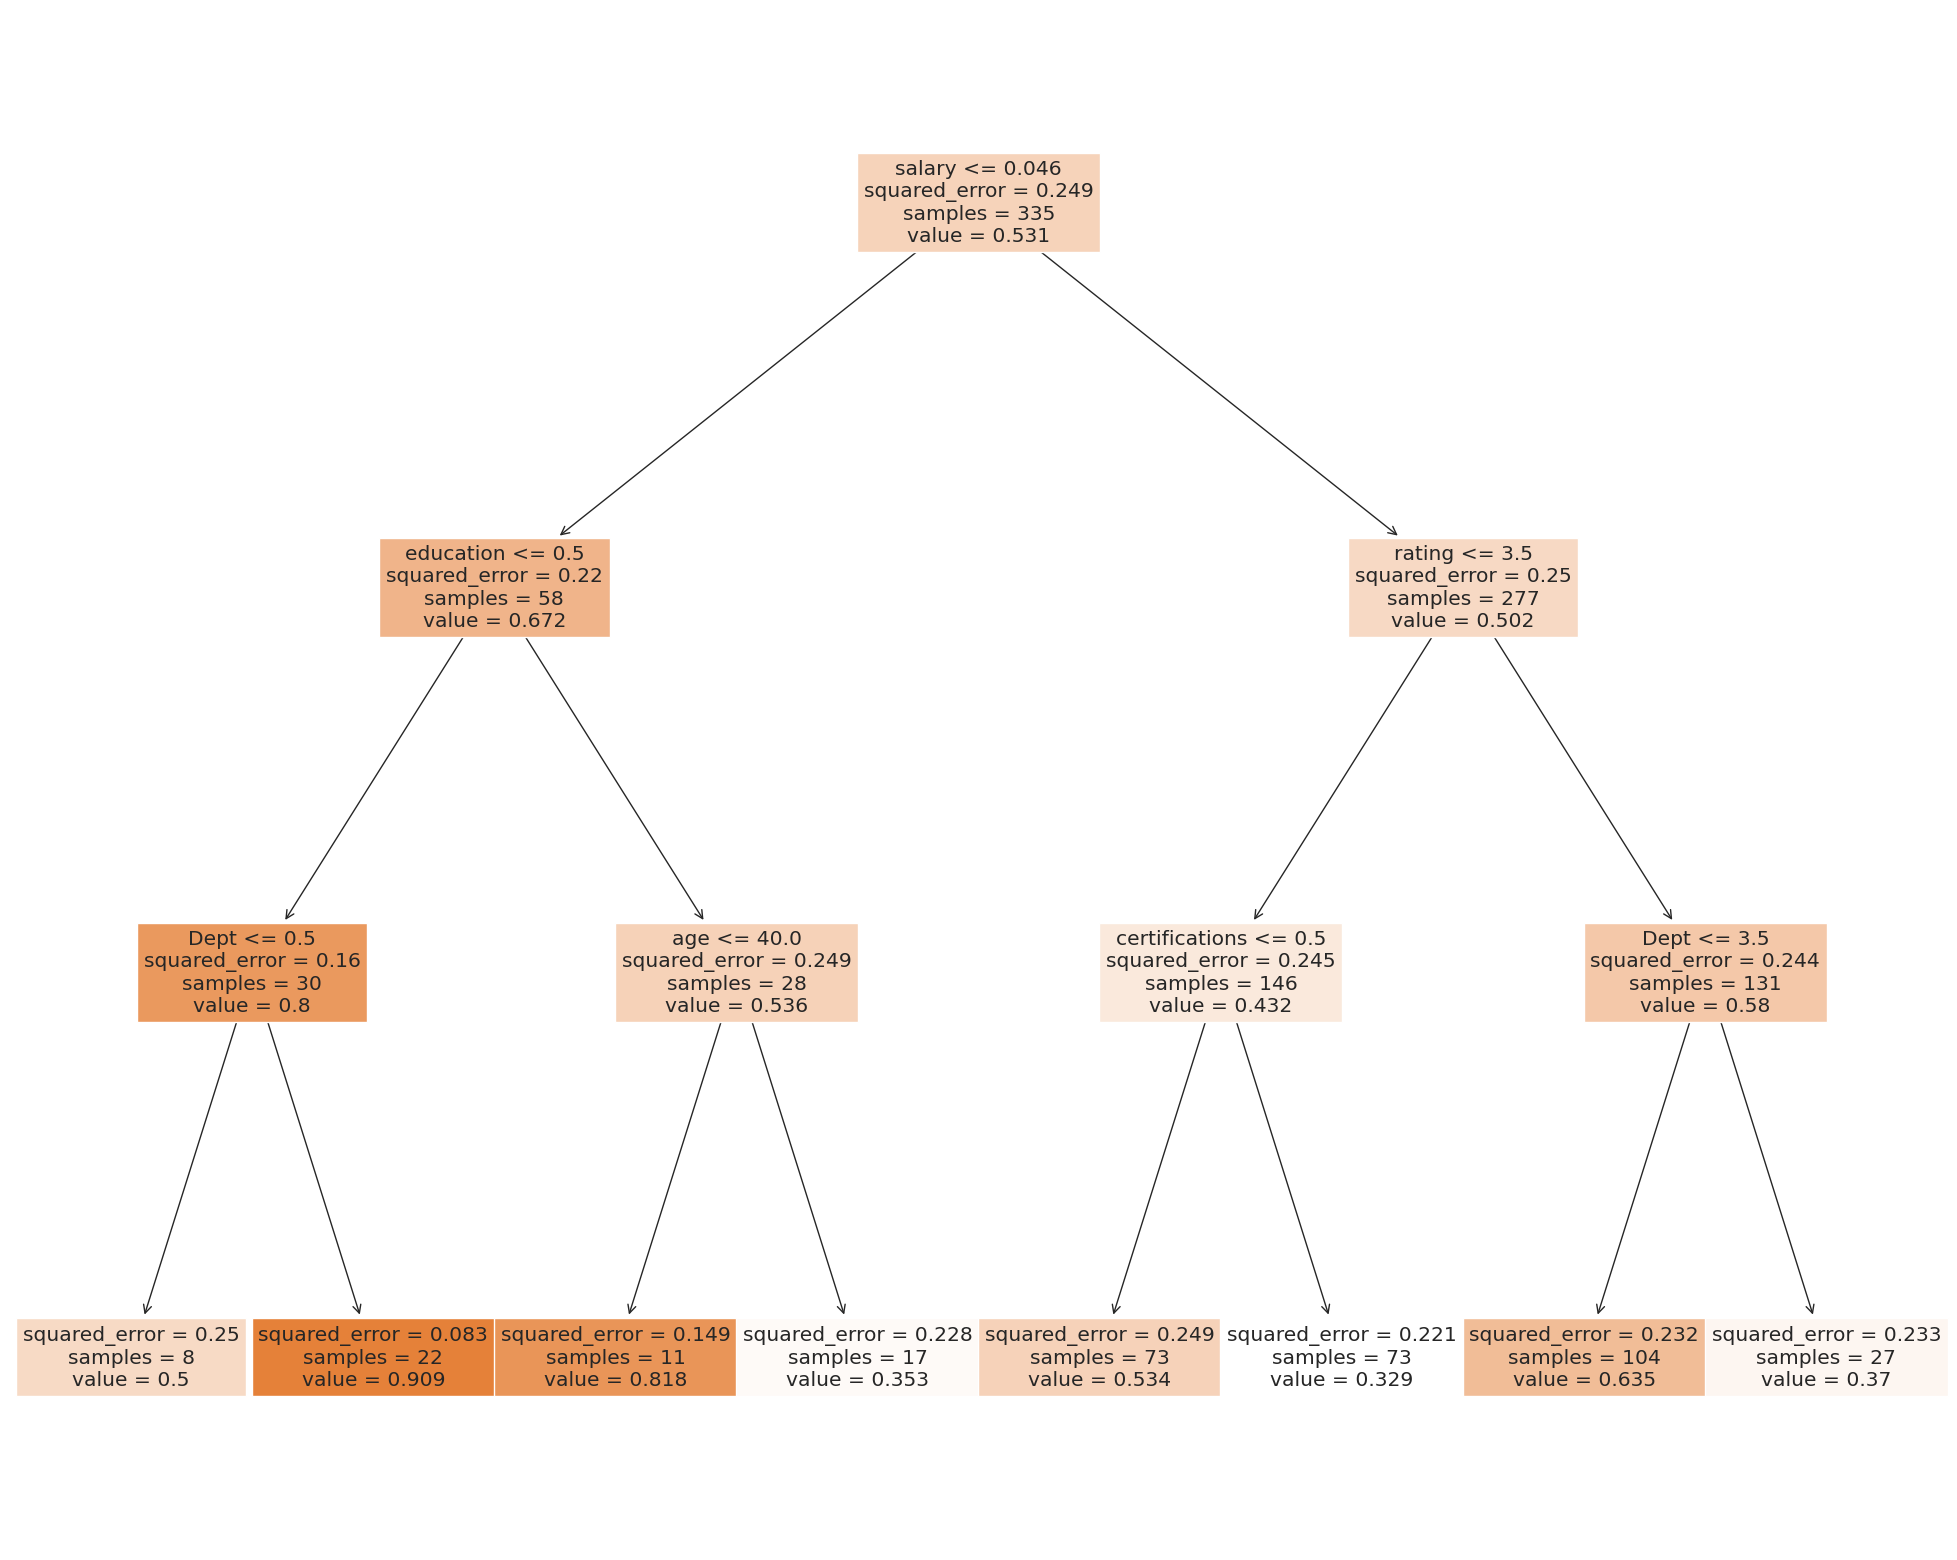

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

##Using AutoML to find out the best Model

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
import h2o
from h2o.automl import H2OAutoML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj0c5qyky
  JVM stdout: /tmp/tmpj0c5qyky/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj0c5qyky/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_pfngoi
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
target = employee_data["satisfied"]
features = employee_data[[ 'age','Dept', 'location', 'education', 'recruitment_type','job_level','rating','onsite','awards','certifications','salary']]
datasetClean = pd.concat([features,target], axis = 1, join = 'inner')

#Reducing the size of the dataset to 50% due to permormance issues with my hardware
dataset_train = datasetClean.sample(frac=.2)
dataset_test = datasetClean.drop(dataset_train.index)

In [ ]:
dataset_test = dataset_test.sample(frac=.5)

In [ ]:
features_autoML = list(features.columns)
features_autoML

['age',
 'Dept',
 'location',
 'education',
 'recruitment_type',
 'job_level',
 'rating',
 'onsite',
 'awards',
 'certifications',
 'salary']

In [ ]:
target_autoML = 'satisfied'

In [ ]:
#Converting from pandas dataframe to Automl Dataset
datasetAutoML = h2o.H2OFrame(dataset_train)
datasetAutoMLTest = h2o.H2OFrame(dataset_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
aml = H2OAutoML()
aml.train(x = features_autoML, y = target_autoML, training_frame= datasetAutoML)

#This model has a runtime of 58 mins

AutoML progress: |
02:27:55.45: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


02:27:56.735: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
02:27:57.562: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
02:27:57.563: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 100.0.
02:27:57.577: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230410_22754_model_382


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    25                 25                          10300                  5            6            5.96          12            39            28.16

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.050555548610144614
RMSE: 0.22484561060902347
MAE: 0.20590512838214636
RMSLE: 0.16526856907792234
Mean Residual Deviance: 0.050555548610144614

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.23522732357531242
RMSE: 0.48500239543255086
MAE: 0.45215168285284013
RMSLE: 0.3378883123110326
Mean Residual Deviance: 0.23522732357531242

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.456527   0.0401526  0.487533      0.47458       0.485478      0.442826      0.392217
mean_residual_deviance  0.245498   0.041063   0.271024      0.272657      0.278687      0.219393      0.185728
mse                     0.245498   0.041063   0.271024      0.272657      0.278687      0.219393      0.185728
r2                      -0.121855  0.356583   -0.693903     -0.136071     -0.114748     0.0858609     0.249586
residual_deviance       0.245498   0.041063   0.271024      0.272657      0.278687      0.219393      0.185728
rmse                    0.494006   0.0426619  0.5206        0.522166      0.527908      0.468394      0.430961
rmsle                   0.34211    0.0350227  0.327427      0.382724      0.375996      0.31942       0.304986

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2023-04-10 03:23:34  1 min 16.310 sec  0                  0.495076         0.4902          0.2451
    2023-04-10 03:23:34  1 min 16.315 sec  5                  0.416229         0.405828        0.173246
    2023-04-10 03:23:34  1 min 16.319 sec  10                 0.34436          0.330186        0.118584
    2023-04-10 03:23:34  1 min 16.330 sec  15                 0.293643         0.277576        0.0862262
    2023-04-10 03:23:34  1 min 16.335 sec  20                 0.260674         0.242675        0.0679508
    2023-04-10 03:23:34  1 min 16.339 sec  25                 0.224846         0.205905        0.0505555

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
rating            22.7601                1                    0.215717
Dept              15.5528                0.683337             0.147407
age               15.4417                0.678457             0.146355
recruitment_type  12.844                 0.564324             0.121734
job_level         11.417                 0.501623             0.108208
awards            8.97005                0.394114             0.0850169
salary            5.13785                0.22574              0.0486959
certifications    5.02327                0.220706             0.0476099
education         3.90867                0.171734             0.0370458
onsite            3.82876                0.168223             0.0362885
location          0.624788               0.0274511            0.00592166

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_

In [ ]:
lb = aml.leaderboard

In [ ]:
# To generate predictions on a test set, you can make predictions
# directly on the `H2OAutoML` object or on the leader model
# object directly
preds = aml.predict(datasetAutoMLTest)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_1_20230410_22754_model_382            0.485002  0.235227  0.452152  0.337888                  0.235227                  38                   0.015407  GBM
DeepLearning_grid_2_AutoML_1_20230410_22754_model_1     0.487894  0.23804   0.471745  0.336664                  0.23804                 4622                   0.009826  DeepLearning
StackedEnsemble_BestOfFamily_5_AutoML_1_20230410_22754  0.492253  0.242313  0.481324  0.345532                  0.242313                 110                   0.060718  StackedEnsemble
GBM_grid_1_AutoML_1_20230410_22754_model_484            0.493206  0.243252  0.464174  0.345104                  0.243252                  21                   0.00939   GBM
DeepLearning_grid_3_AutoML_1_20230410_22754_model_3     0.493261  0.243306  0.460644  0.343847                  0.243306               20223                   0.029001  DeepLearning
GBM_grid_1_AutoML_1_20230410_22754_model_449            0.49348   0.243523  0.475798  0.348343                  0.243523                  20                   0.008261  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_126            0.493665  0.243705  0.472063  0.345746                  0.243705                  23                   0.00931   GBM
GBM_grid_1_AutoML_1_20230410_22754_model_485            0.49384   0.243878  0.471424  0.347163                  0.243878                  23                   0.008053  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_608            0.493912  0.243949  0.472608  0.346673                  0.243949                  22                   0.009052  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_18             0.494135  0.244169  0.473282  0.347509                  0.244169                  28                   0.008486  GBM
[644 rows x 9 columns]

In [ ]:
#Finding the best automl model
m = aml.get_best_model()
print(m)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230410_22754_model_382


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    25                 25                          10300                  5            6            5.96          12            39            28.16

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.050555548610144614
RMSE: 0.22484561060902347
MAE: 0.20590512838214636
RMSLE: 0.16526856907792234
Mean Residual Deviance: 0.050555548610144614

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.23522732357531242
RMSE: 0.48500239543255086
MAE: 0.45215168285284013
RMSLE: 0.3378883123110326
Mean Residual D

In [ ]:
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

#Hyperparameter Tuning of AutoML's Best Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
train, validate, test = np.split(
    employee_data.sample(frac=1, random_state=42),
    [int(0.6 * len(x_train)), int(0.8 * len(x_train))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(x_train.columns),
    y="satisfied",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)

def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_47
Best R2: NaN


#What evaluation metric are you using?
The evaluation metrics which I am using are

Mean Squared Error
Root Mean Squared Error
Mean Absolute Error
Mean Residual Deviance
Accuracy
These evaluation metrics are used to evaluate the best model, as it is a regression problem. Here, Mean Residual Deviance and Accuracy are the most important metrics used to evaluate the mode.

The residual deviance tells us how well the response variable can be predicted by a model with p predictor variables. The lower the value, the better the model is able to predict the value of the response variable.

Accuracy tells us how correct and precise our model is.

#How do training, validation, and test metrics compare?
On both the Training Dataset and the Validation Dataset, the top model (AutoML's Hyperparameter tweaked model) performed admirably.


Additionally, the additional measures on both datasets confirm that the model is not overfitting the training data. Please review the evaluation metrics for the training dataset and the validation dataset below.

In [ ]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["quality"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)


#Which models did you explore and did you try to tune the hyperparameters of the best model you got?
I trained several models for this purpose, from the most basic Linear Regression to using AutoML to achieve the best model it could fit. The models I honed for this project were

linear regression
Regressor in the Random Forest

MLP Regressor Support Vector Machine (SVM) Regressor AutoML
SVM and the model from AutoML, with the latter slightly outperforming the former, were the models that performed the best for me in predicting the employee satisfaction. A RandomForestRegressor was the AutoML model that produced the best outcome.

As the AutoML model showed promise, I adjusted its hyperparameters to optimize the model. The model's accuracy increased from 43.24% to 48% with the help of hyperparameter tuning, which is a significant improvement in performance.




#Model Selection

rom the above summary of the models trained on the dataset, the two best models are SVM and AutoML's best model with tuned hyperparameters.

SVM Regressor with an Accuracy of ~ 43.24%
AutoML's Hyperparameter Tuned Version ~ 48%
Let's try to understand how both the models have been trained.

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.8 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

lr_model.fit(X_train,y_train)

y_pred_lr = lr_model.predict(X_test)

score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
score_lr

47.88

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

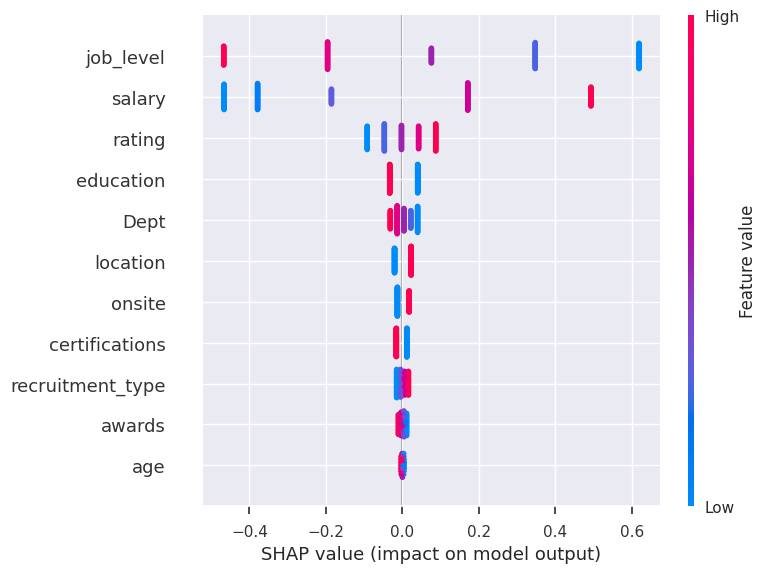

In [ ]:
explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_dependence='independent')
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

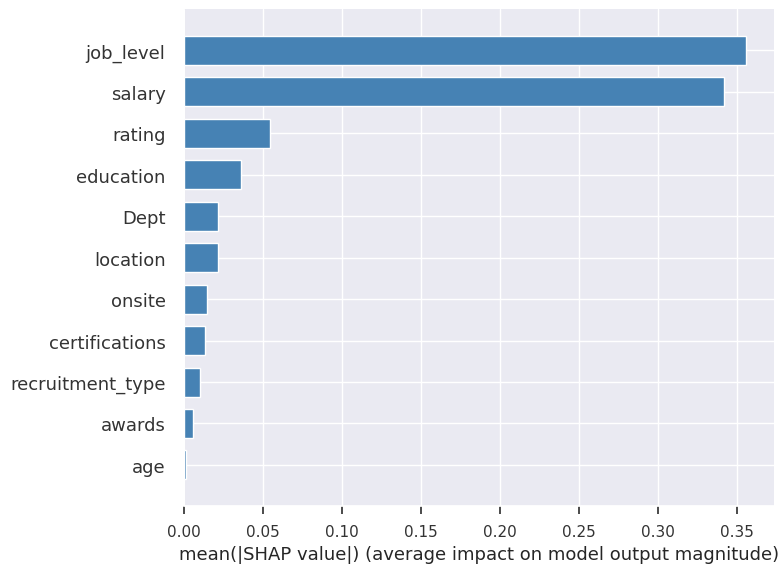

In [ ]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

##Interpreting SHAP Feature Importance Plot for Linear and Tree-based model

It's easy to understand the concept underlying SHAP feature importance: Features with high absolute Shapley values are significant. We average the absolute Shapley values for each feature throughout the data because we want to determine global relevance. The features are then sorted and plotted in decreasing order of relevance.


The following plot is SHAP feature importance plot for SVM model
Using the below plot we can come on the conclusion that the job Level is the most important feature, followed by salary and rating.

In [ ]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

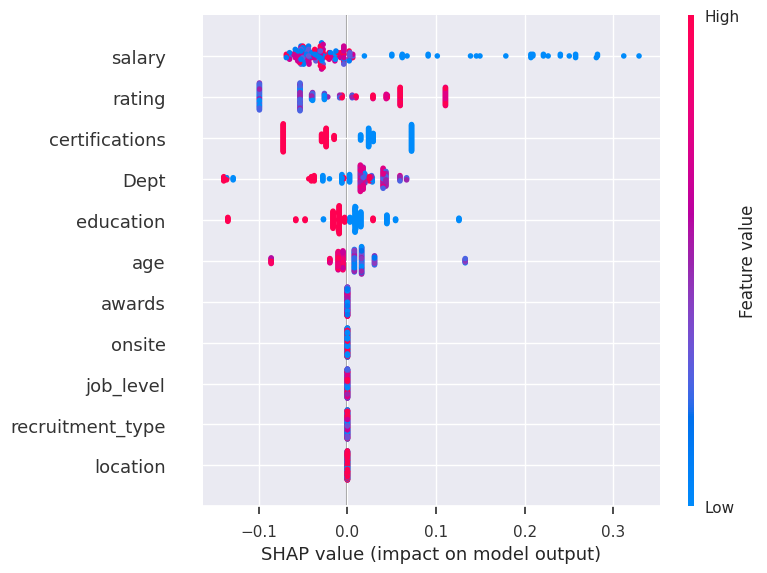

In [ ]:
shap.summary_plot(shap_values_tree, X_test, feature_names=features.columns)

###AutoML has it's on shap analysis method built into the package since the SHAP package has no native support for the models on AutoML.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                                     rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-----------------------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_1_20230410_22754_model_286                             0.498253  0.248256  0.492769  0.352763                  0.248256                  17                   0.005097  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_616                             0.499158  0.249159  0.494805  0.353206                  0.249159                   4                   0.001367  GBM
StackedEnsemble_BestOfFamily_7_AutoML_1_20230410_22754                   0.4993    0.2493    0.4944    0.353891                  0.2493                   107                   0.012018  StackedEnsemble
XGBoost_lr_search_selection_AutoML_1_20230410_22754_select_grid_model_7  0.499334  0.249334  0.498914  0.348125                  0.249334                 280                   0.054121  XGBoost
GBM_grid_1_AutoML_1_20230410_22754_model_605                             0.499731  0.249731  0.492902  0.353979                  0.249731                  19                   0.004798  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_559                             0.499935  0.249935  0.494194  0.353178                  0.249935                  14                   0.005233  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_372                             0.500121  0.250121  0.495025  0.353724                  0.250121                  14                   0.005181  GBM
GLM_1_AutoML_1_20230410_22754                                            0.500706  0.250706  0.494747  0.353547                  0.250706                  20                   0.002103  GLM
GBM_grid_1_AutoML_1_20230410_22754_model_230                             0.500731  0.250732  0.493686  0.354171                  0.250732                  18                   0.032075  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_77                              0.500937  0.250938  0.494118  0.353373                  0.250938                  15                   0.004955  GBM
StackedEnsemble_AllModels_6_AutoML_1_20230410_22754                      0.501248  0.25125   0.493578  0.354777                  0.25125                  654                   0.136189  StackedEnsemble
GBM_grid_1_AutoML_1_20230410_22754_model_4                               0.501257  0.251259  0.49492   0.352516                  0.251259                  49                   0.011409  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_43                              0.50151   0.251513  0.487771  0.353671                  0.251513                  37                   0.005763  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_542                             0.501537  0.251539  0.493623  0.355237                  0.251539                  15                   0.005035  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_500                             0.501777  0.25178   0.491533  0.352989                  0.25178                   30                   0.006128  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_118                             0.501804  0.251808  0.490197  0.35334                   0.251808                  16                   0.029003  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_492                             0.502055  0.252059  0.492054  0.354787                  0.252059                  15                   0.004944  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_269                             0.502058  0.252062  0.493614  0.354064                  0.252062                  19                   0.005098  GBM
GBM_grid_1_AutoML_1_20230410_22754_model_428                             0.502064  0.252068  0.494494  0.355685                  0.252068                  14  

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

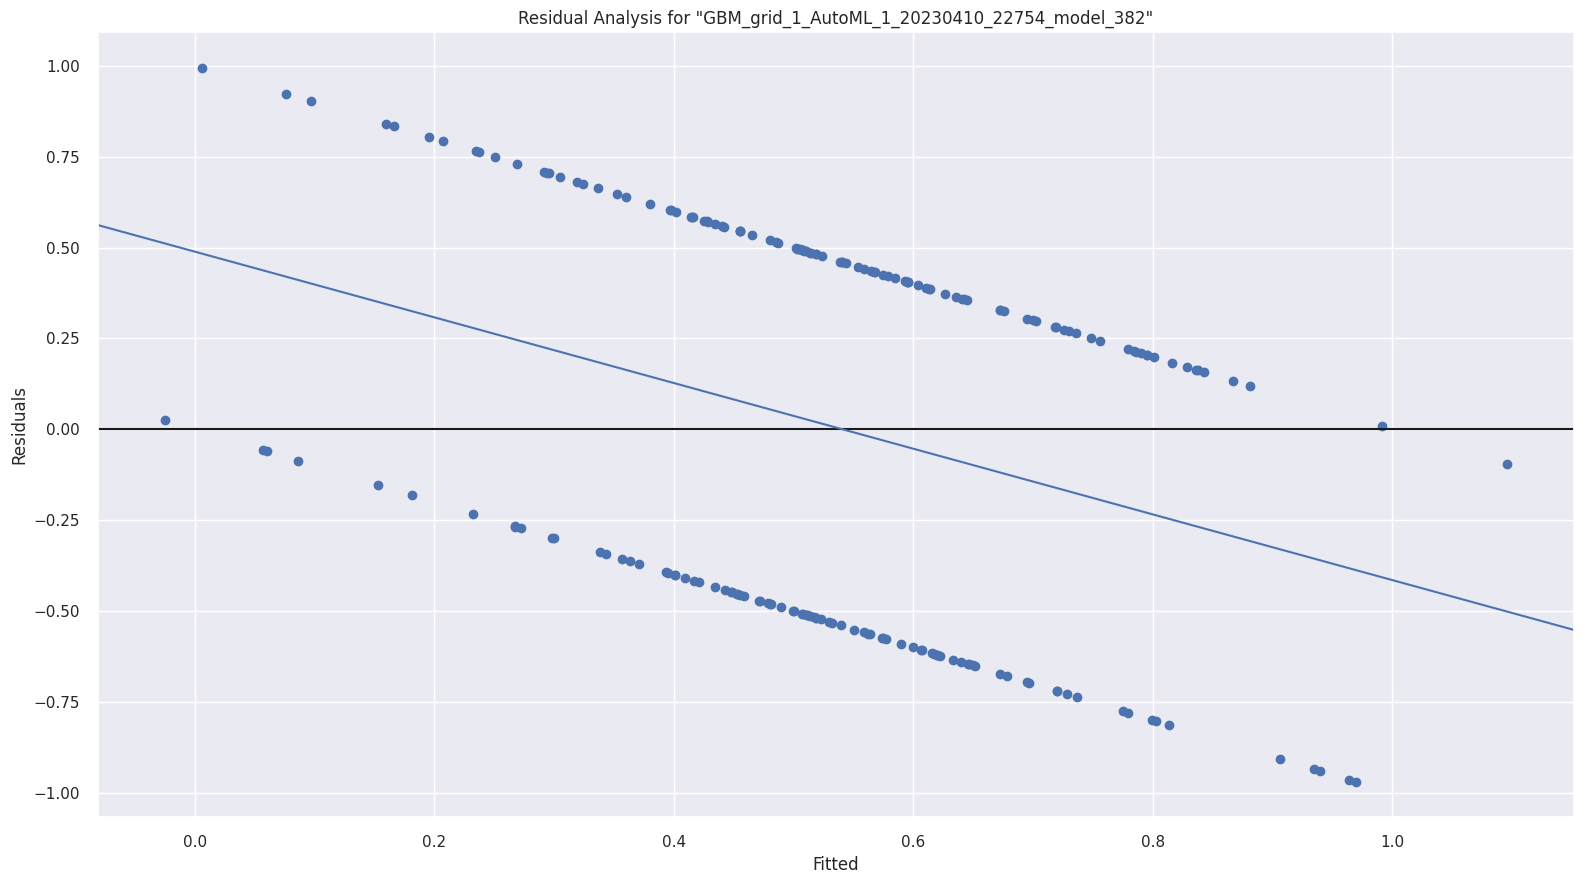

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

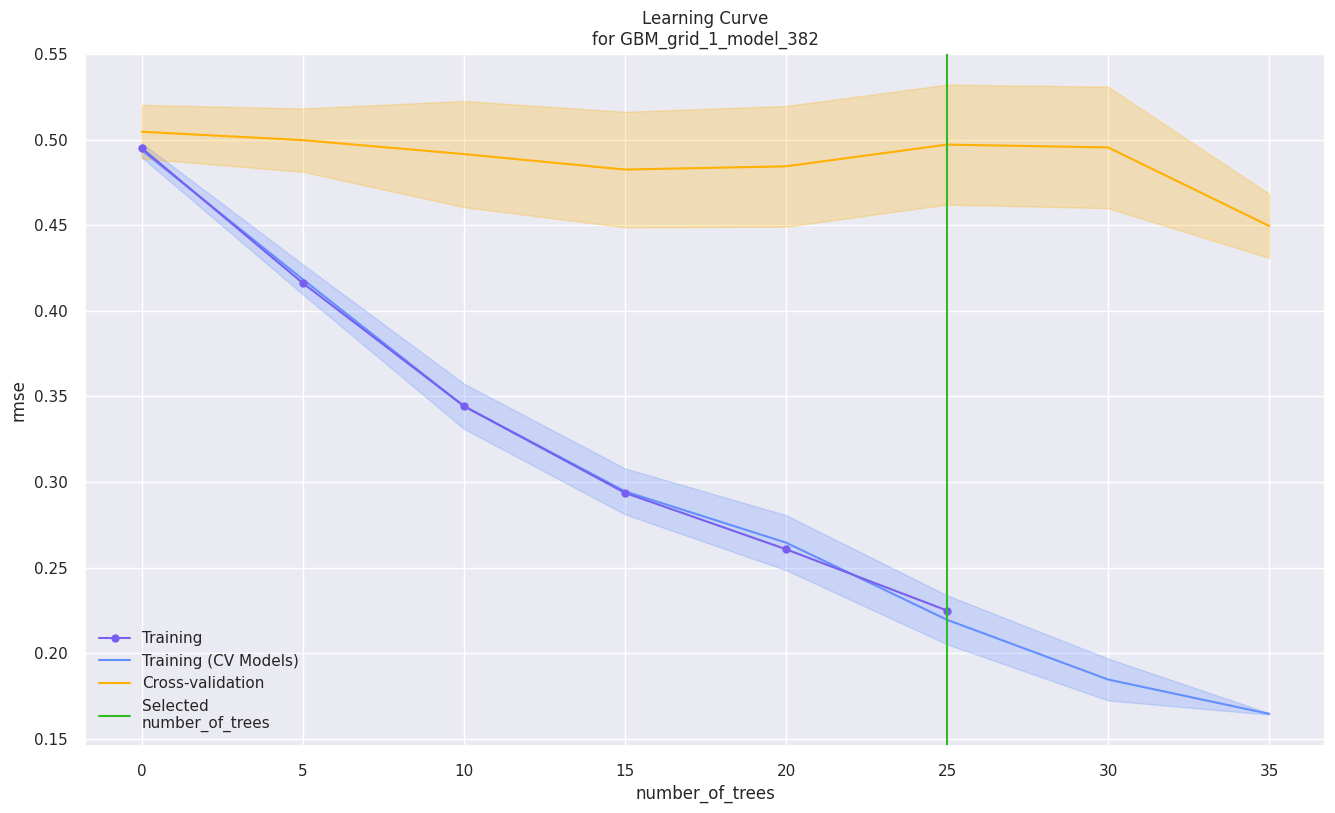

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

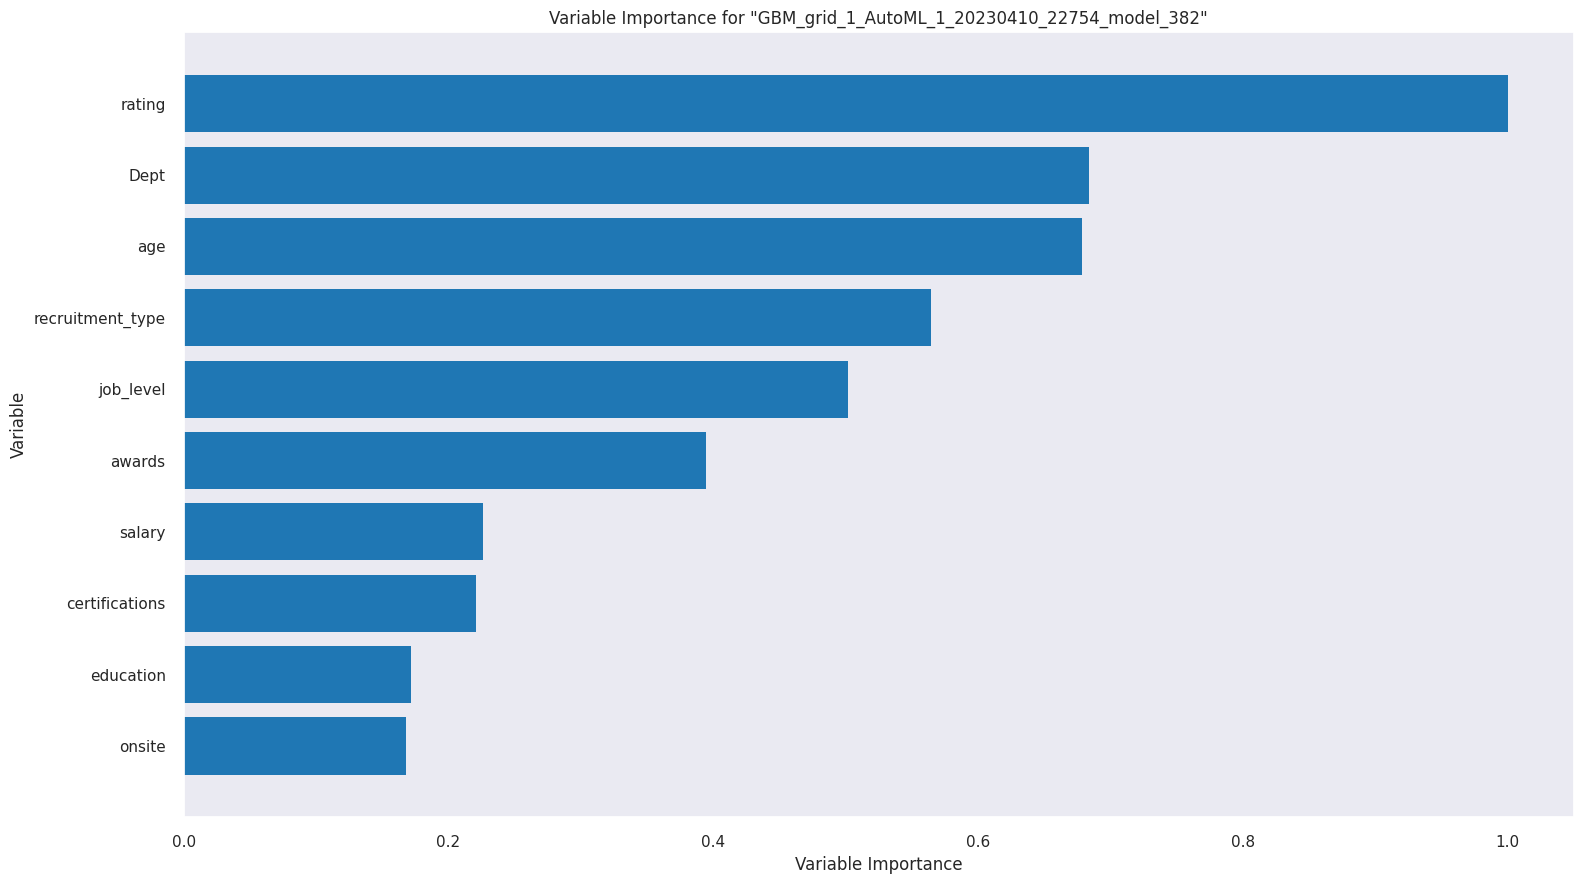

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

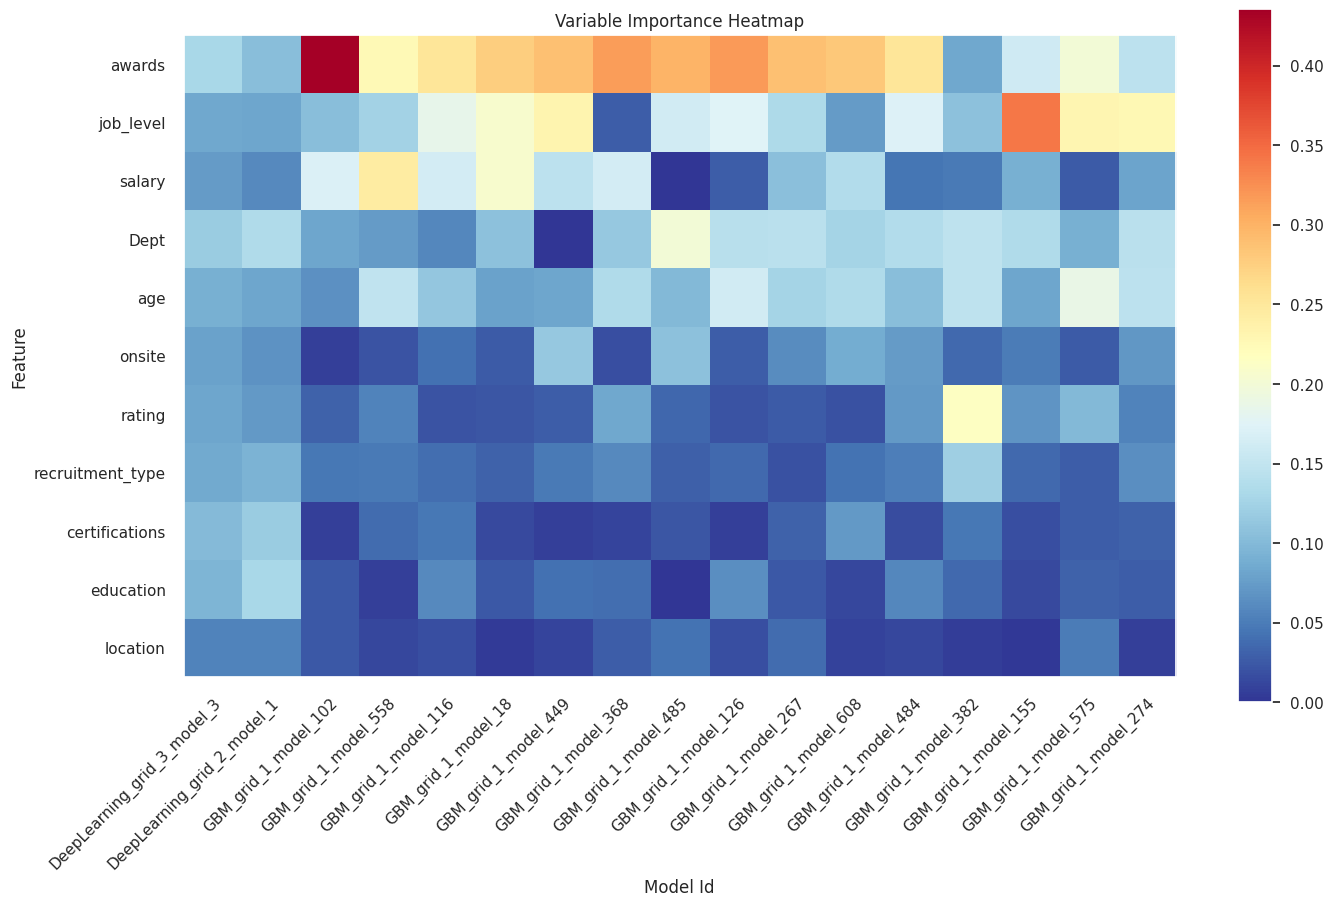

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

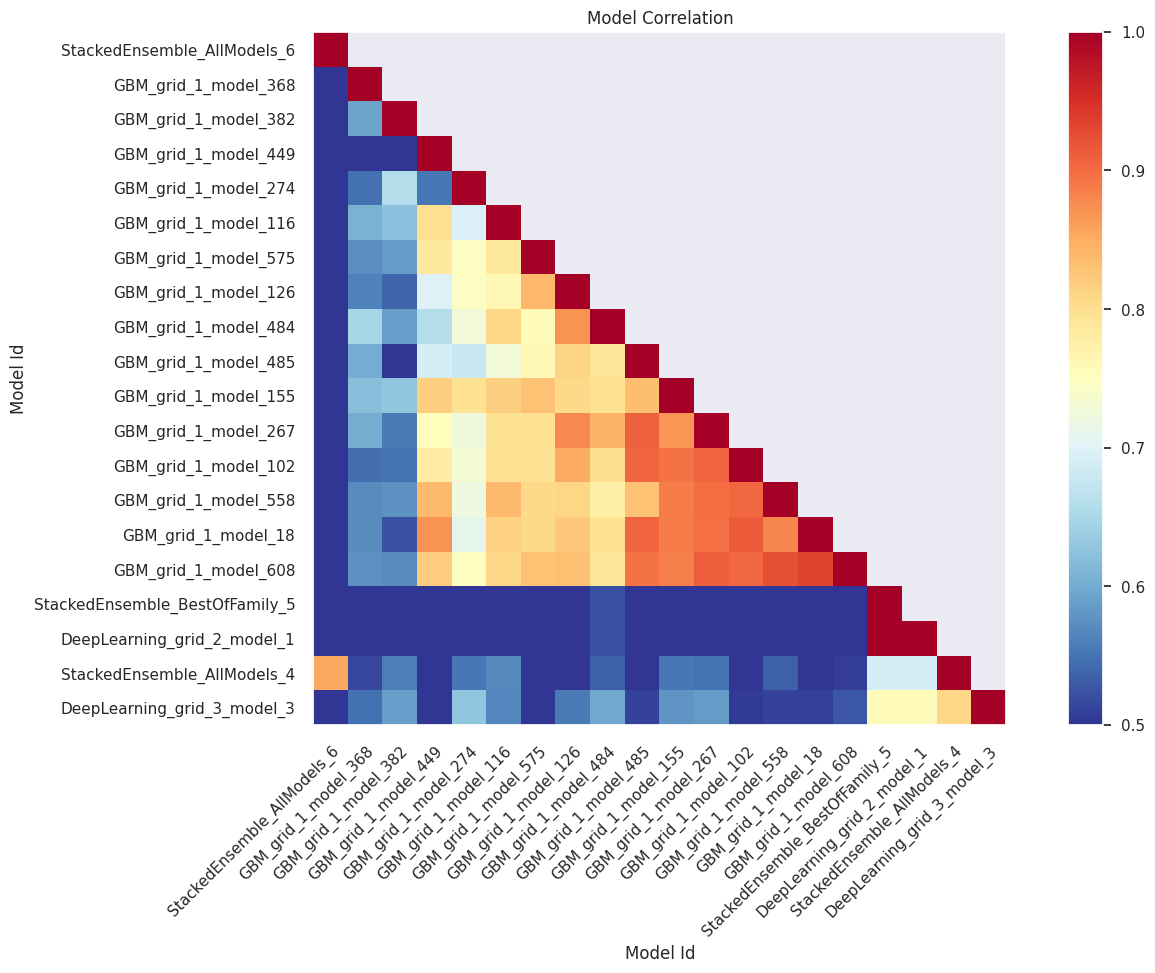

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

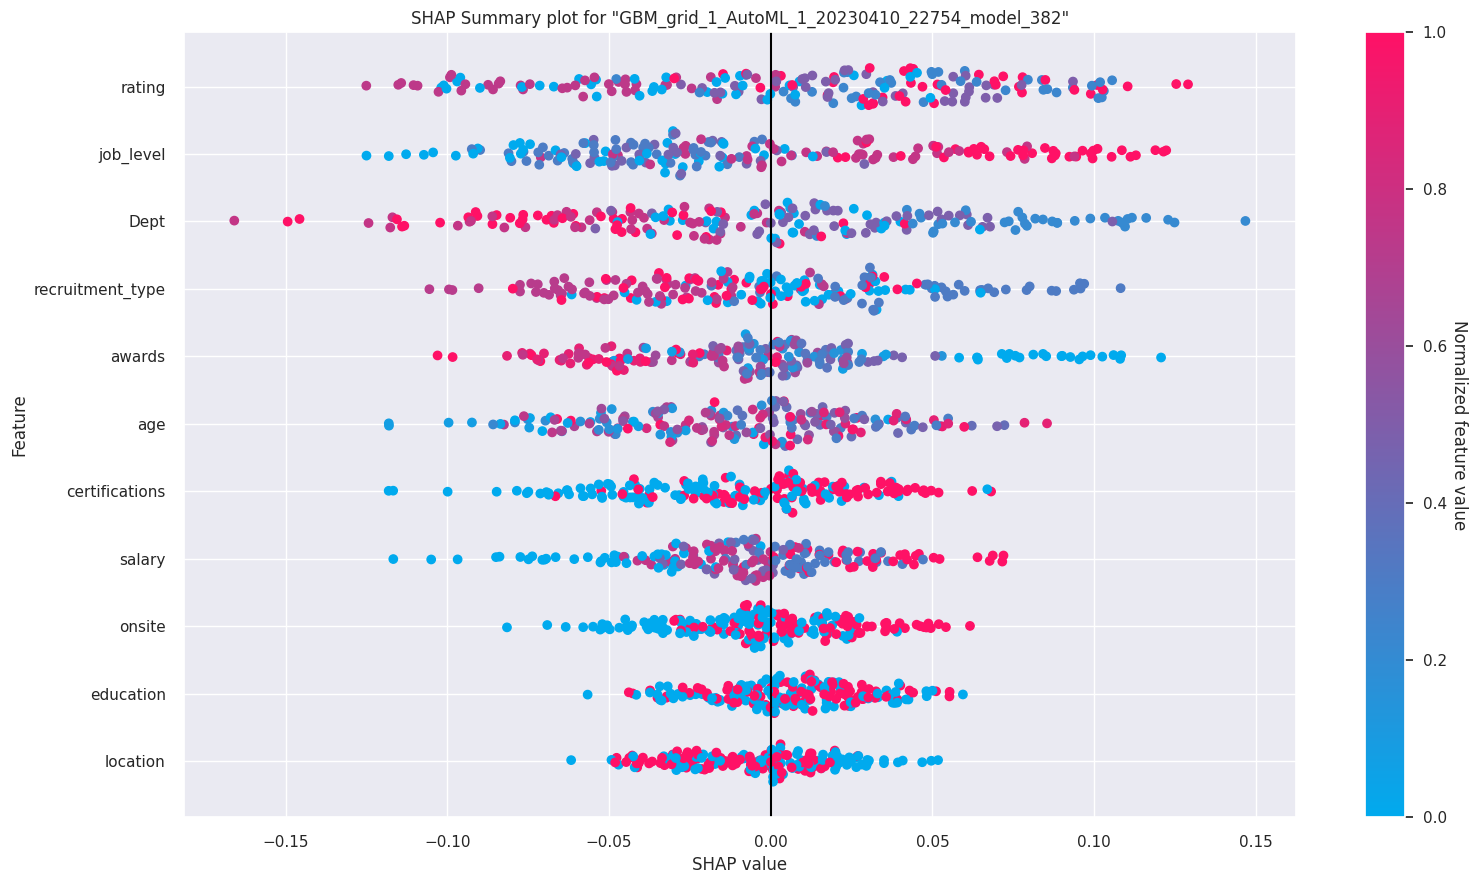

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

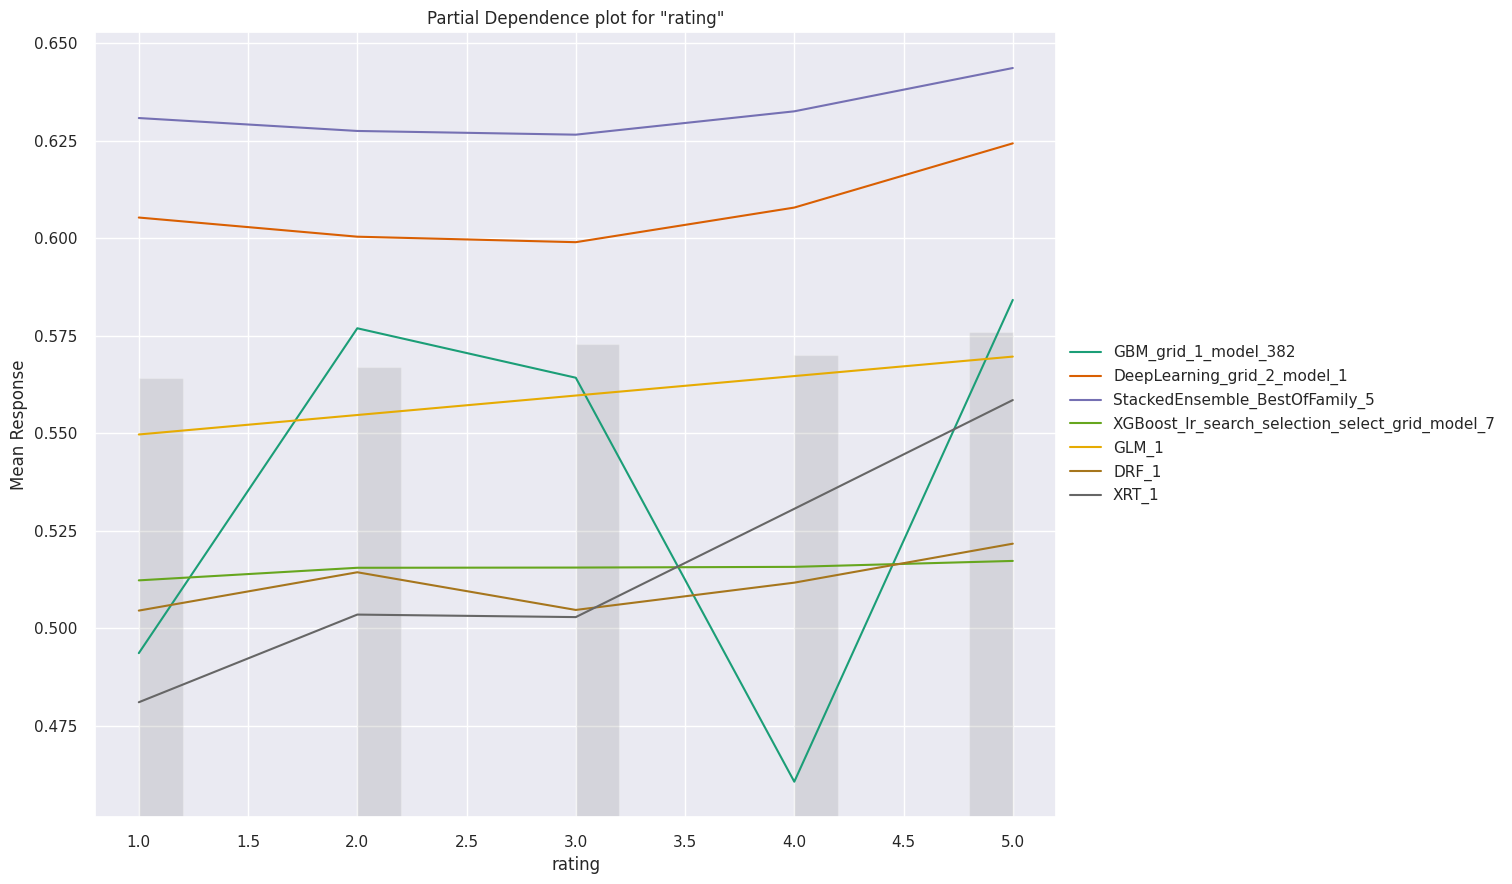

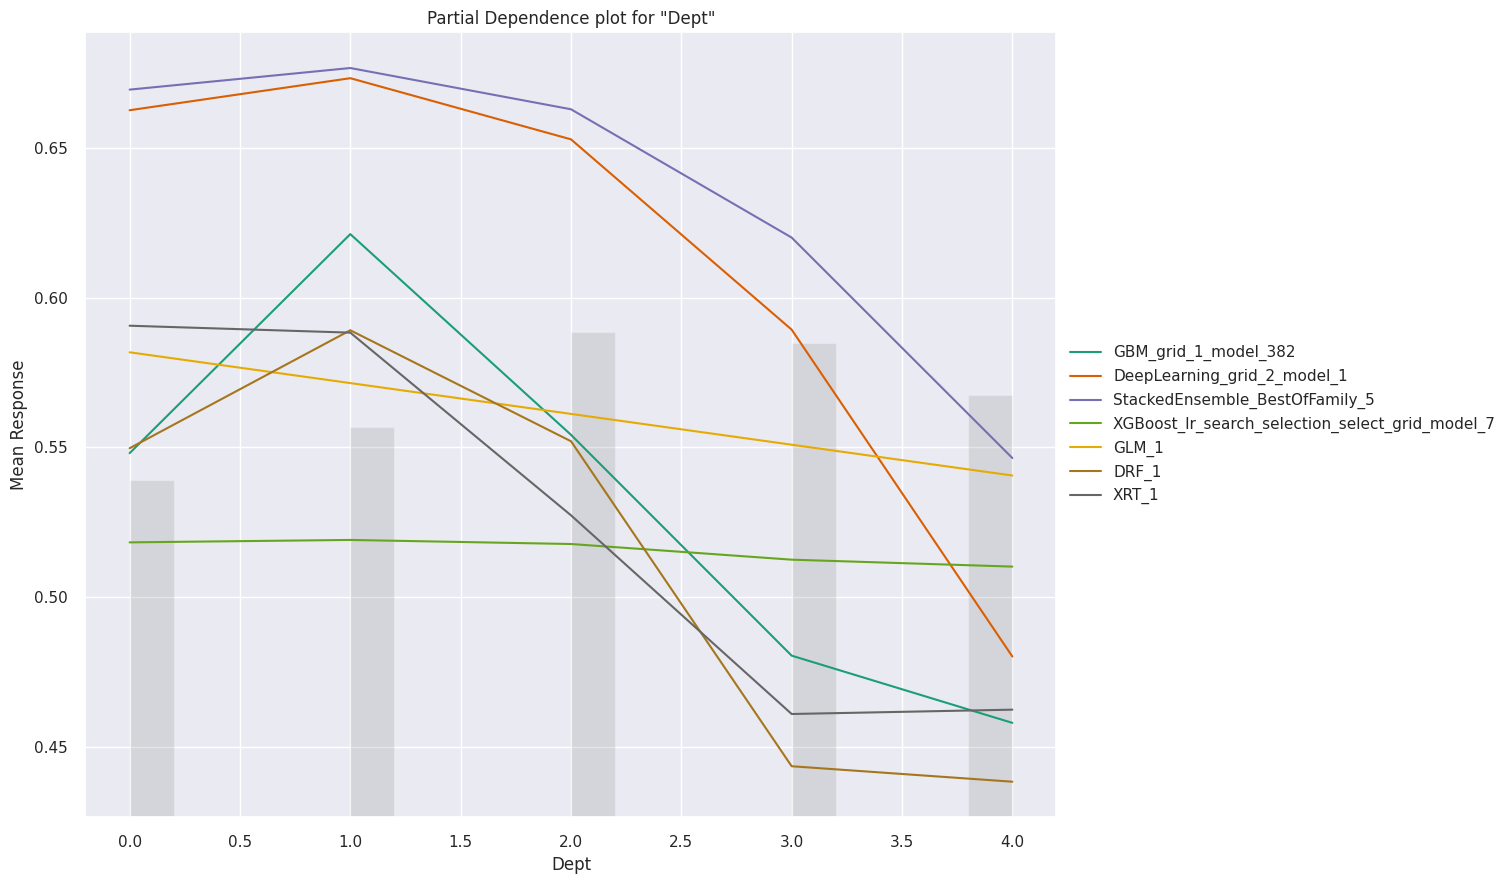

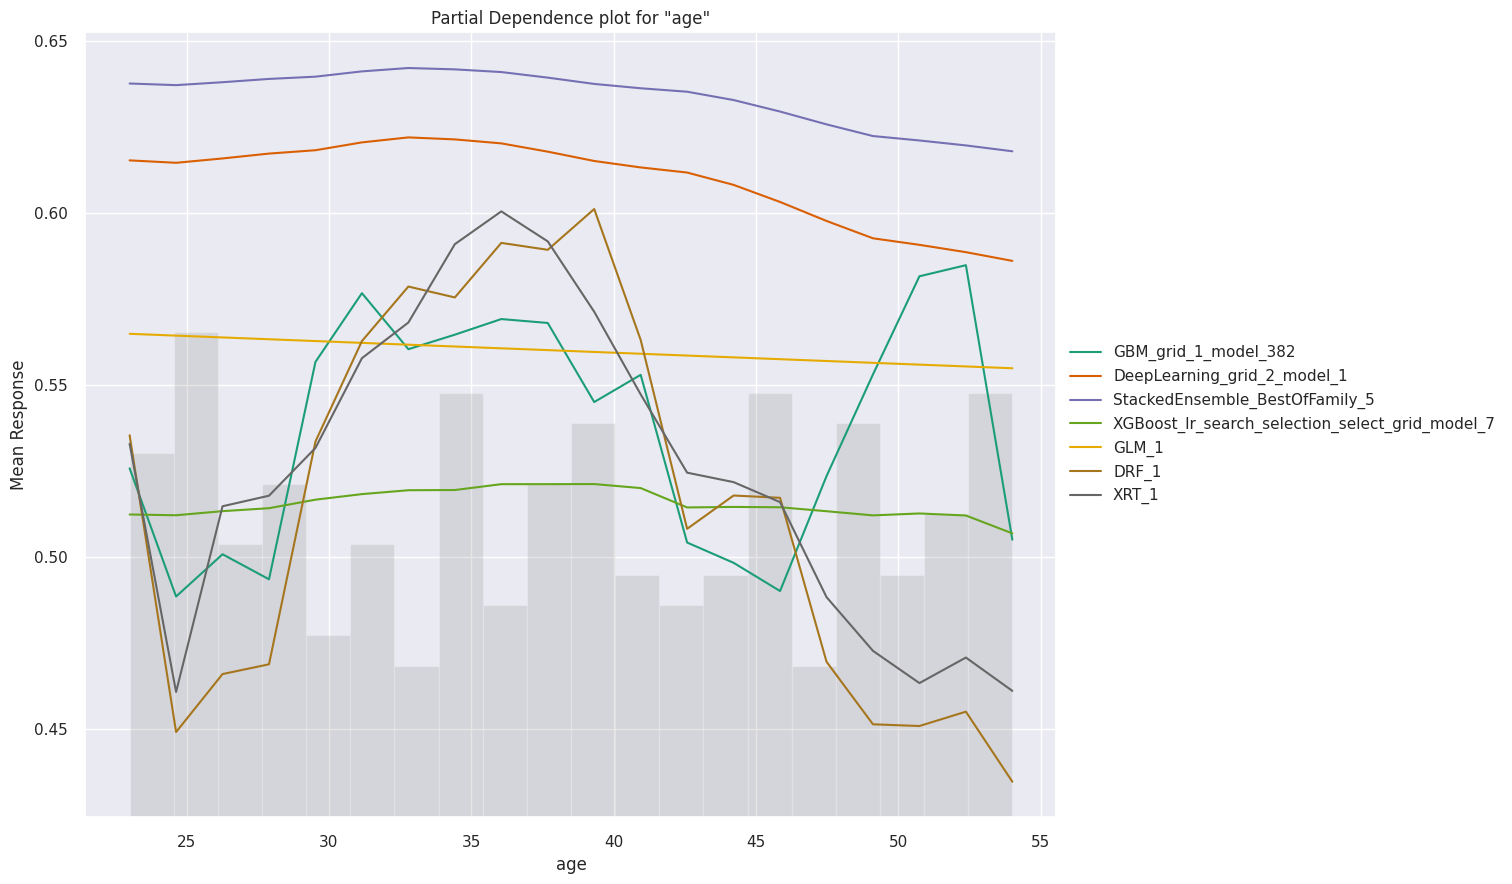

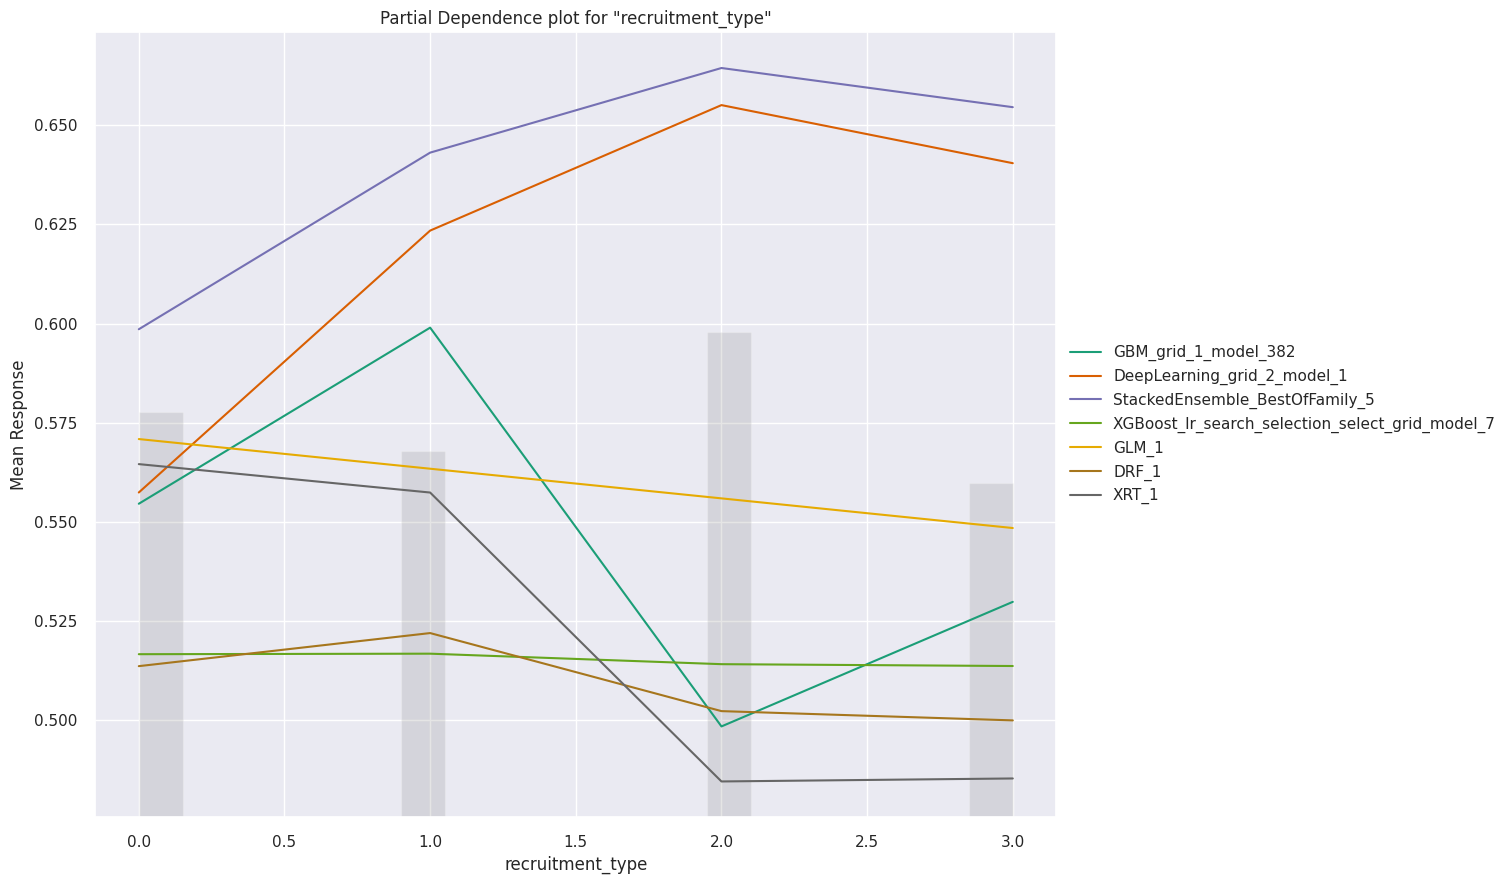

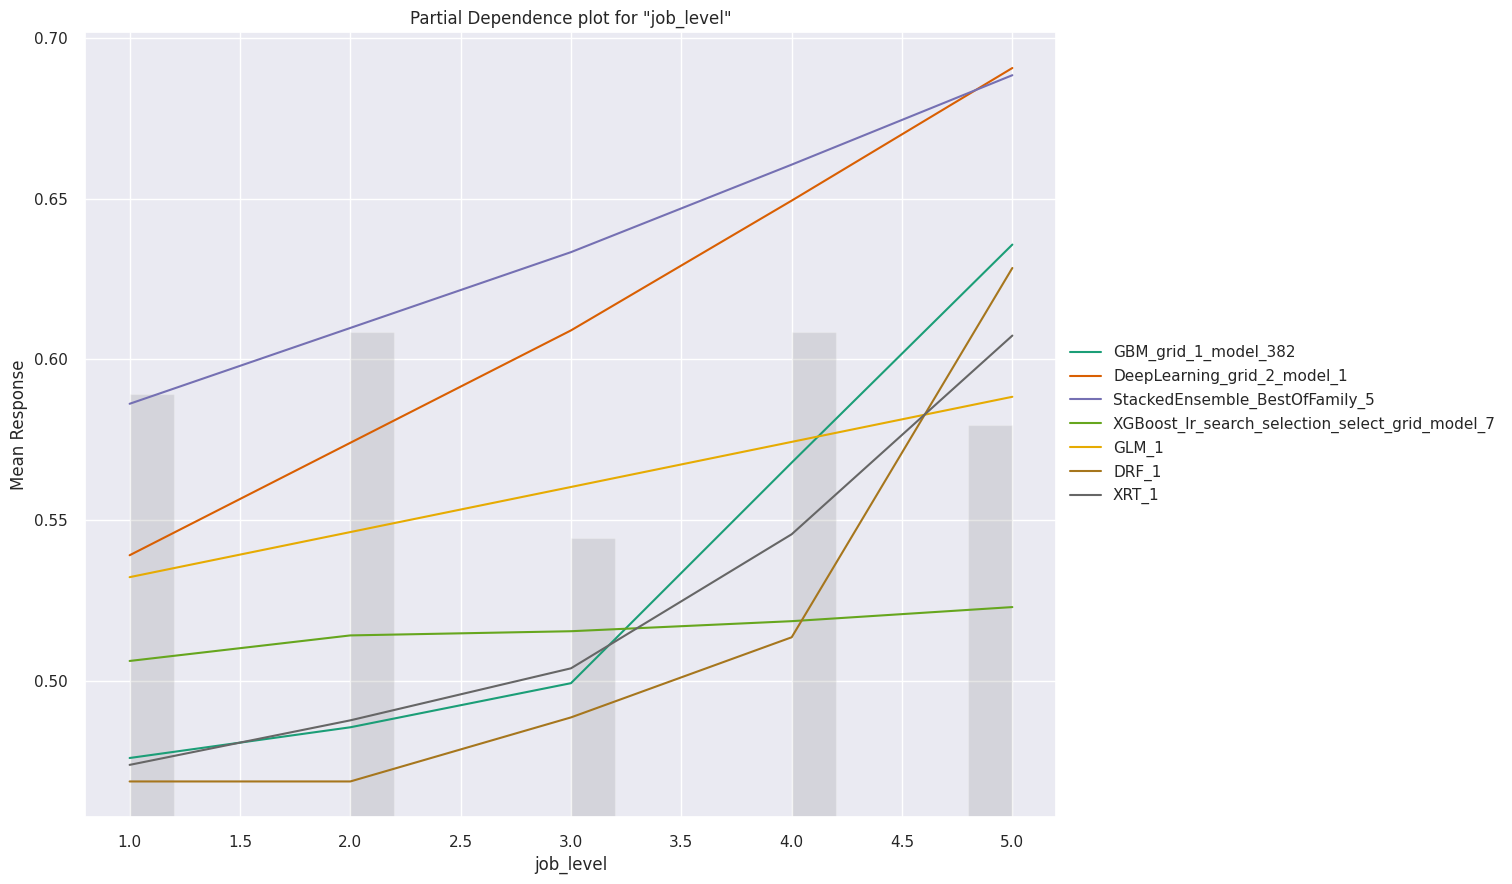

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

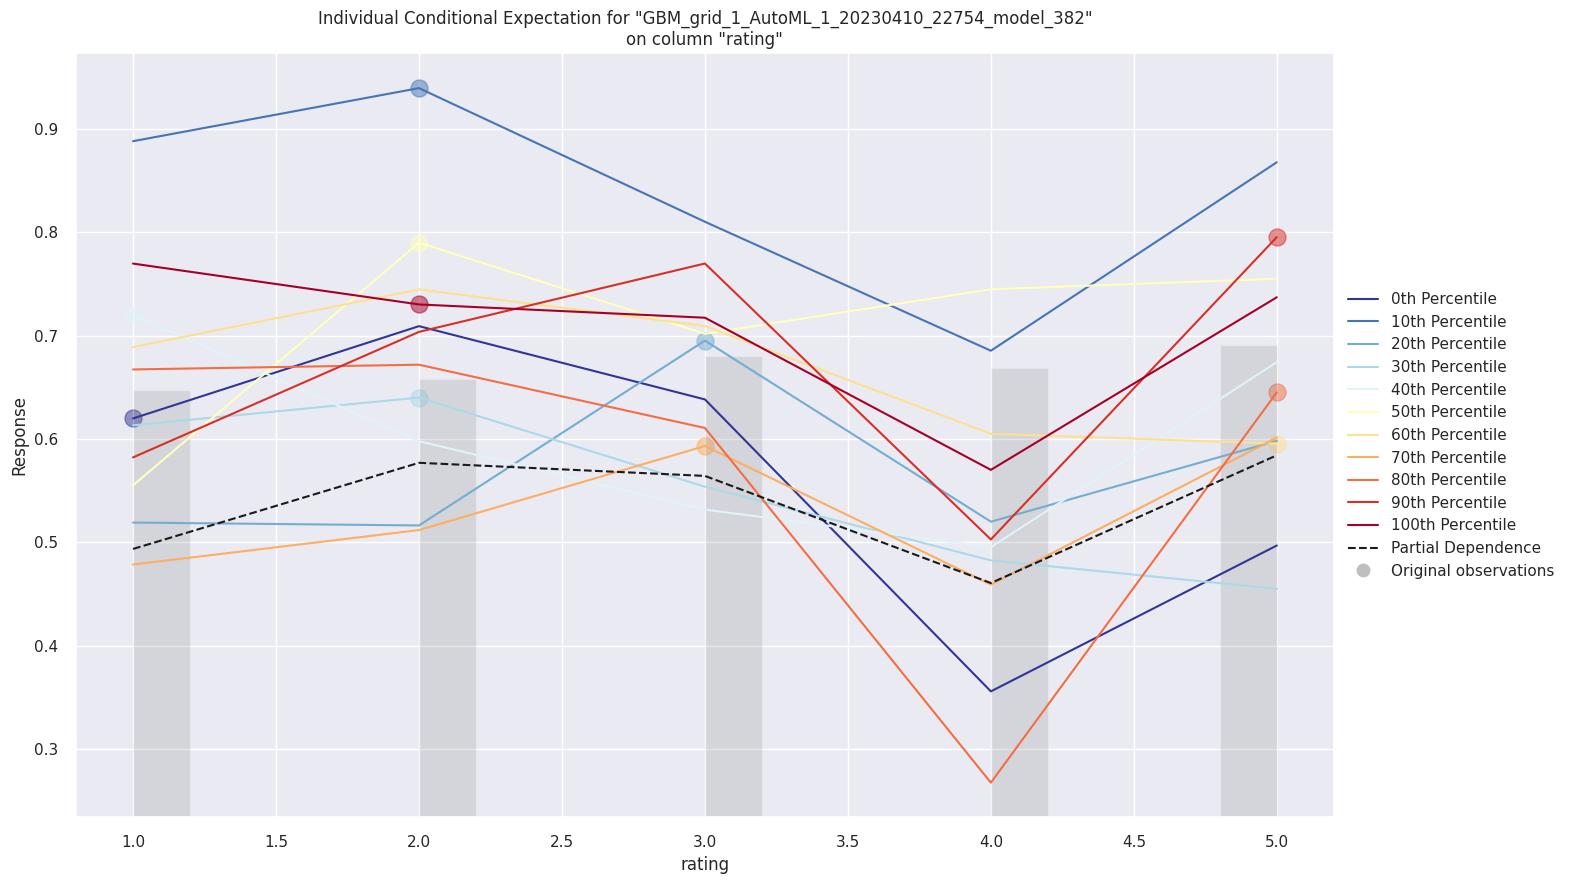

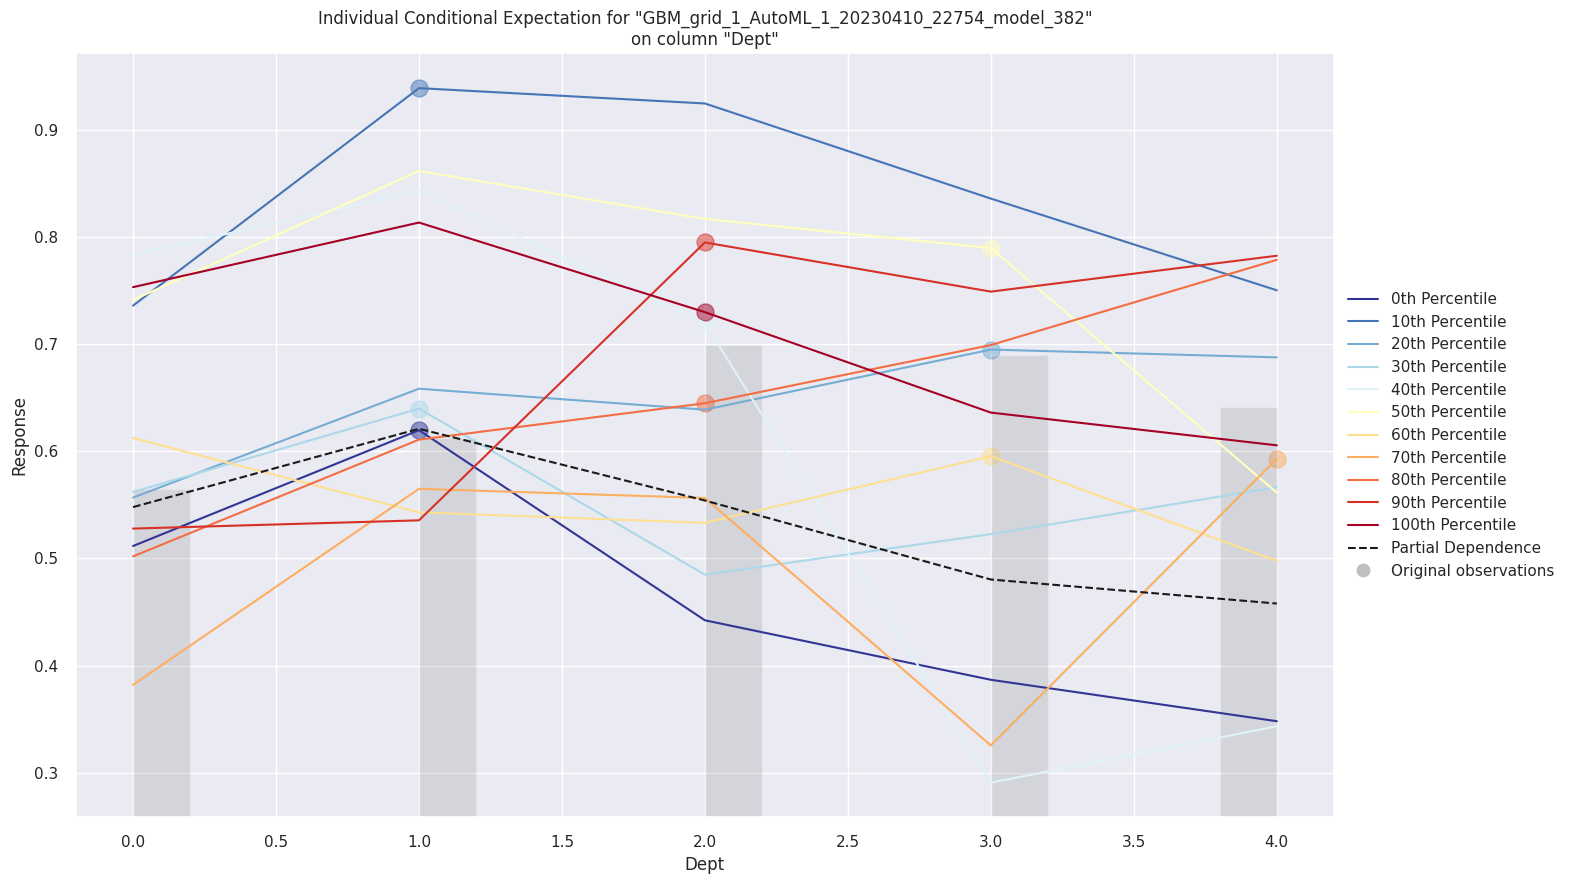

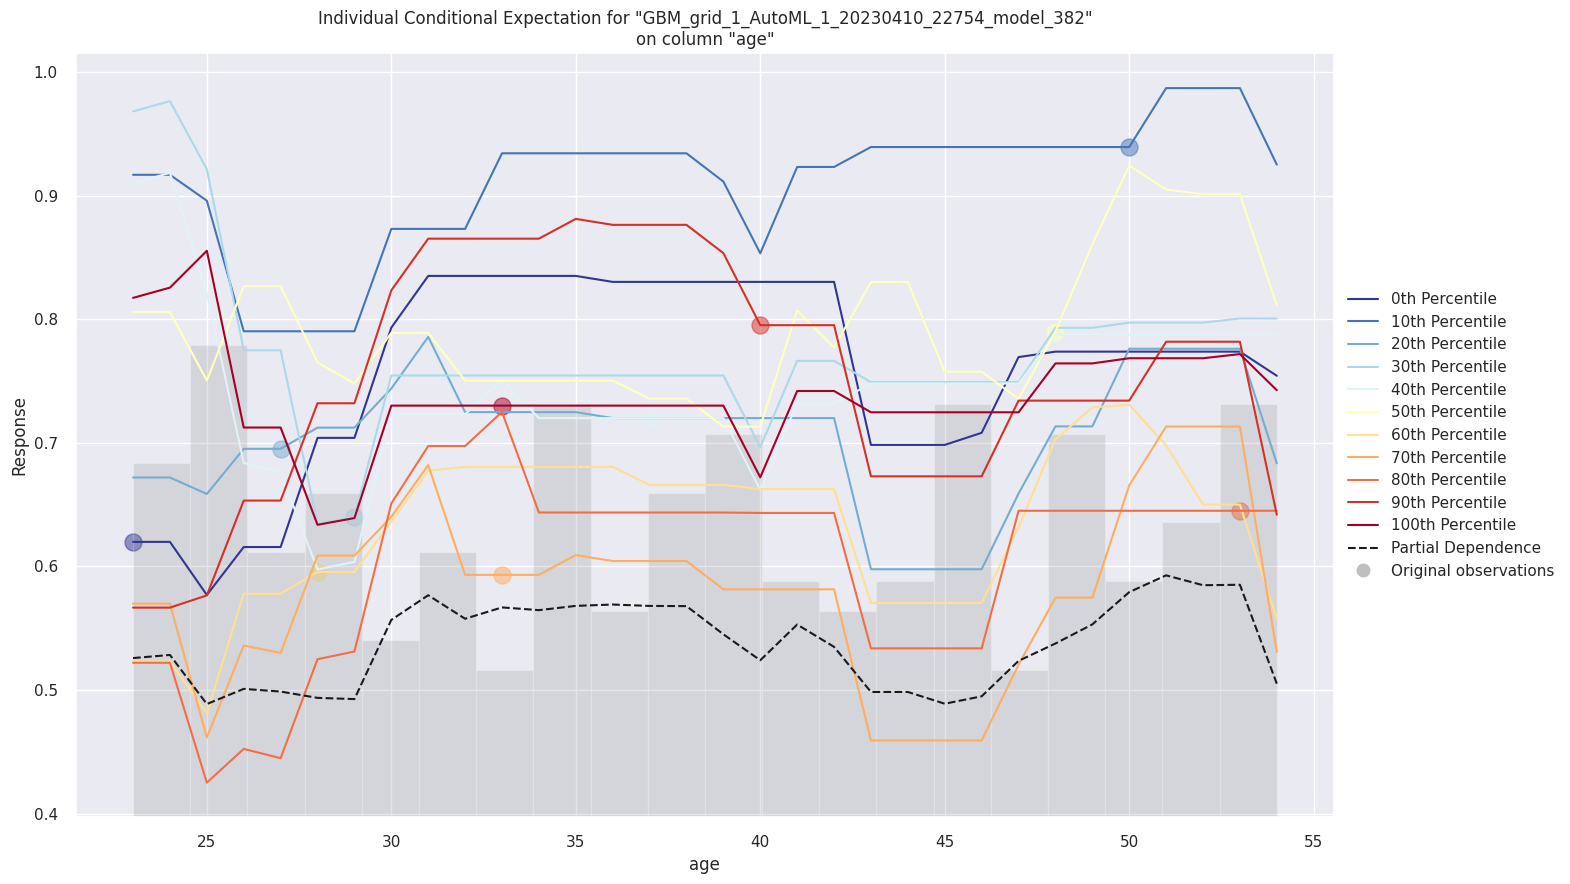

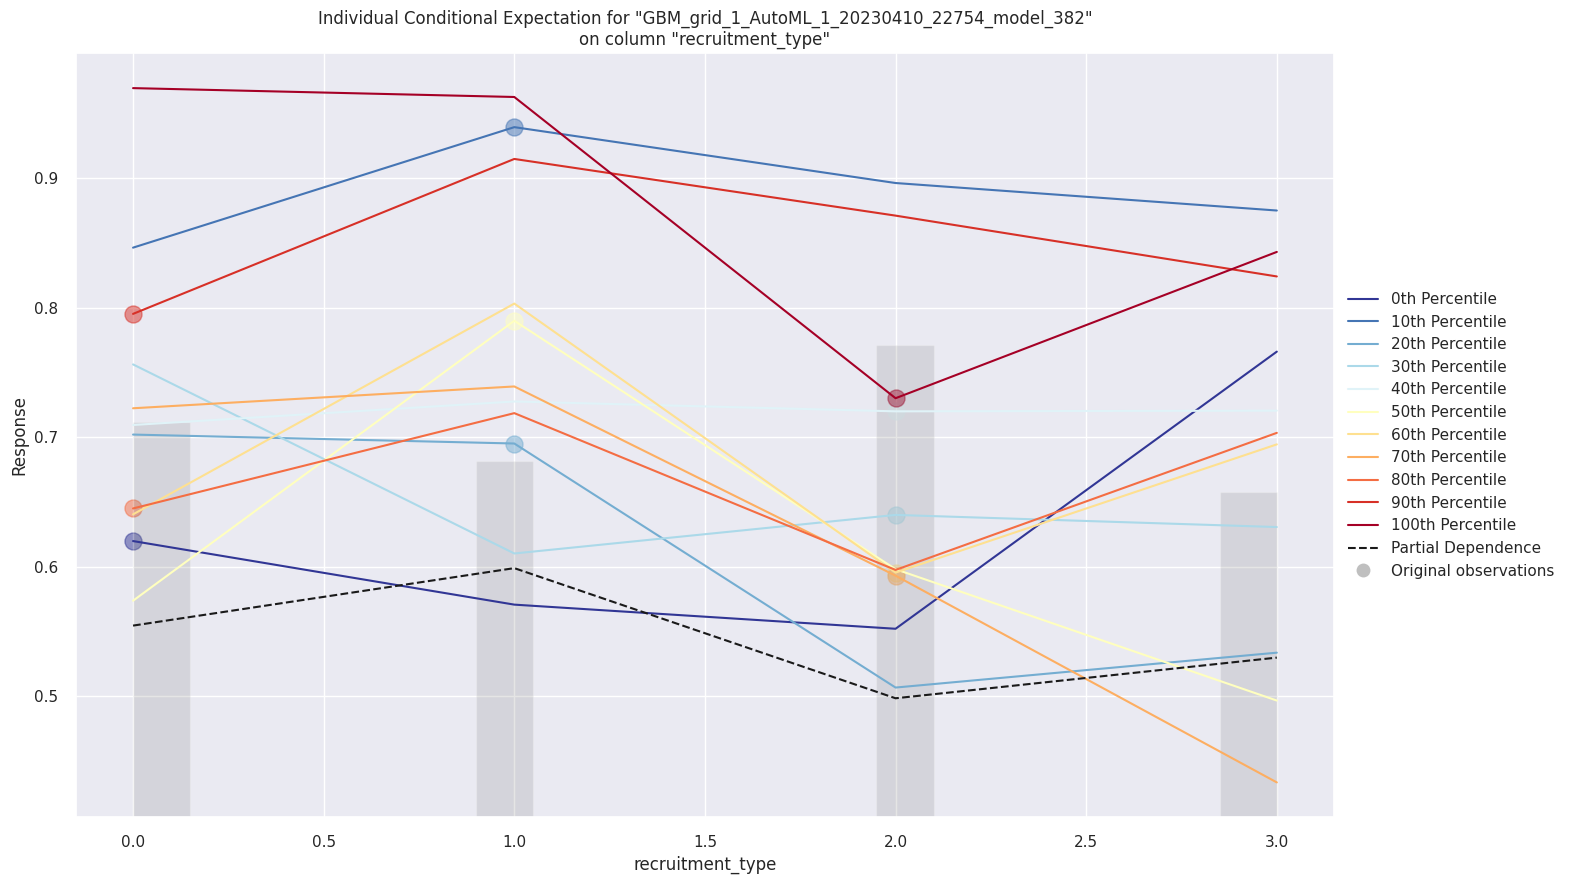

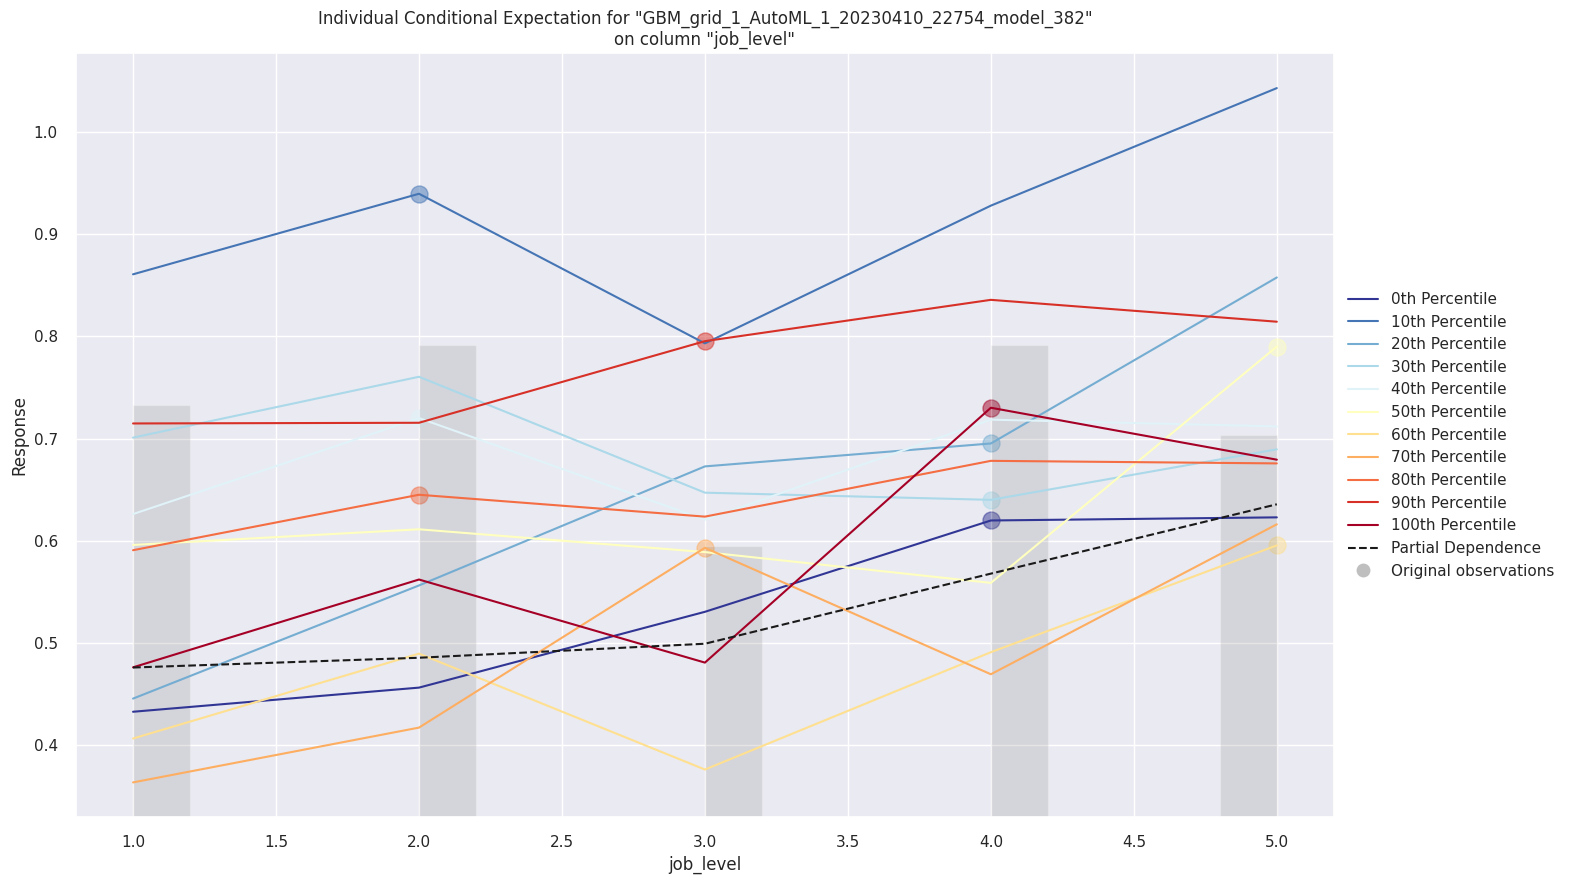

In [ ]:
exm = aml.explain(datasetAutoMLTest)

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                                     rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo               predict
-----------------------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------  ---------
GBM_grid_1_AutoML_1_20230410_22754_model_286                             0.498253  0.248256  0.492769  0.352763                  0.248256                  17                   0.005097  GBM               0.595063
GBM_grid_1_AutoML_1_20230410_22754_model_616                             0.499158  0.249159  0.494805  0.353206                  0.249159                   4                   0.001367  GBM               0.572259
StackedEnsemble_BestOfFamily_7_AutoML_1_20230410_22754                   0.4993    0.2493    0.4944    0.353891                  0.2493                   107                   0.012018  StackedEnsemble   0.57
XGBoost_lr_search_selection_AutoML_1_20230410_22754_select_grid_model_7  0.499334  0.249334  0.498914  0.348125                  0.249334                 280                   0.054121  XGBoost           0.522276
GBM_grid_1_AutoML_1_20230410_22754_model_605                             0.499731  0.249731  0.492902  0.353979                  0.249731                  19                   0.004798  GBM               0.625241
GBM_grid_1_AutoML_1_20230410_22754_model_559                             0.499935  0.249935  0.494194  0.353178                  0.249935                  14                   0.005233  GBM               0.583175
GBM_grid_1_AutoML_1_20230410_22754_model_372                             0.500121  0.250121  0.495025  0.353724                  0.250121                  14                   0.005181  GBM               0.586722
GLM_1_AutoML_1_20230410_22754                                            0.500706  0.250706  0.494747  0.353547                  0.250706                  20                   0.002103  GLM               0.607526
GBM_grid_1_AutoML_1_20230410_22754_model_230                             0.500731  0.250732  0.493686  0.354171                  0.250732                  18                   0.032075  GBM               0.619161
GBM_grid_1_AutoML_1_20230410_22754_model_77                              0.500937  0.250938  0.494118  0.353373                  0.250938                  15                   0.004955  GBM               0.612192
[20 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

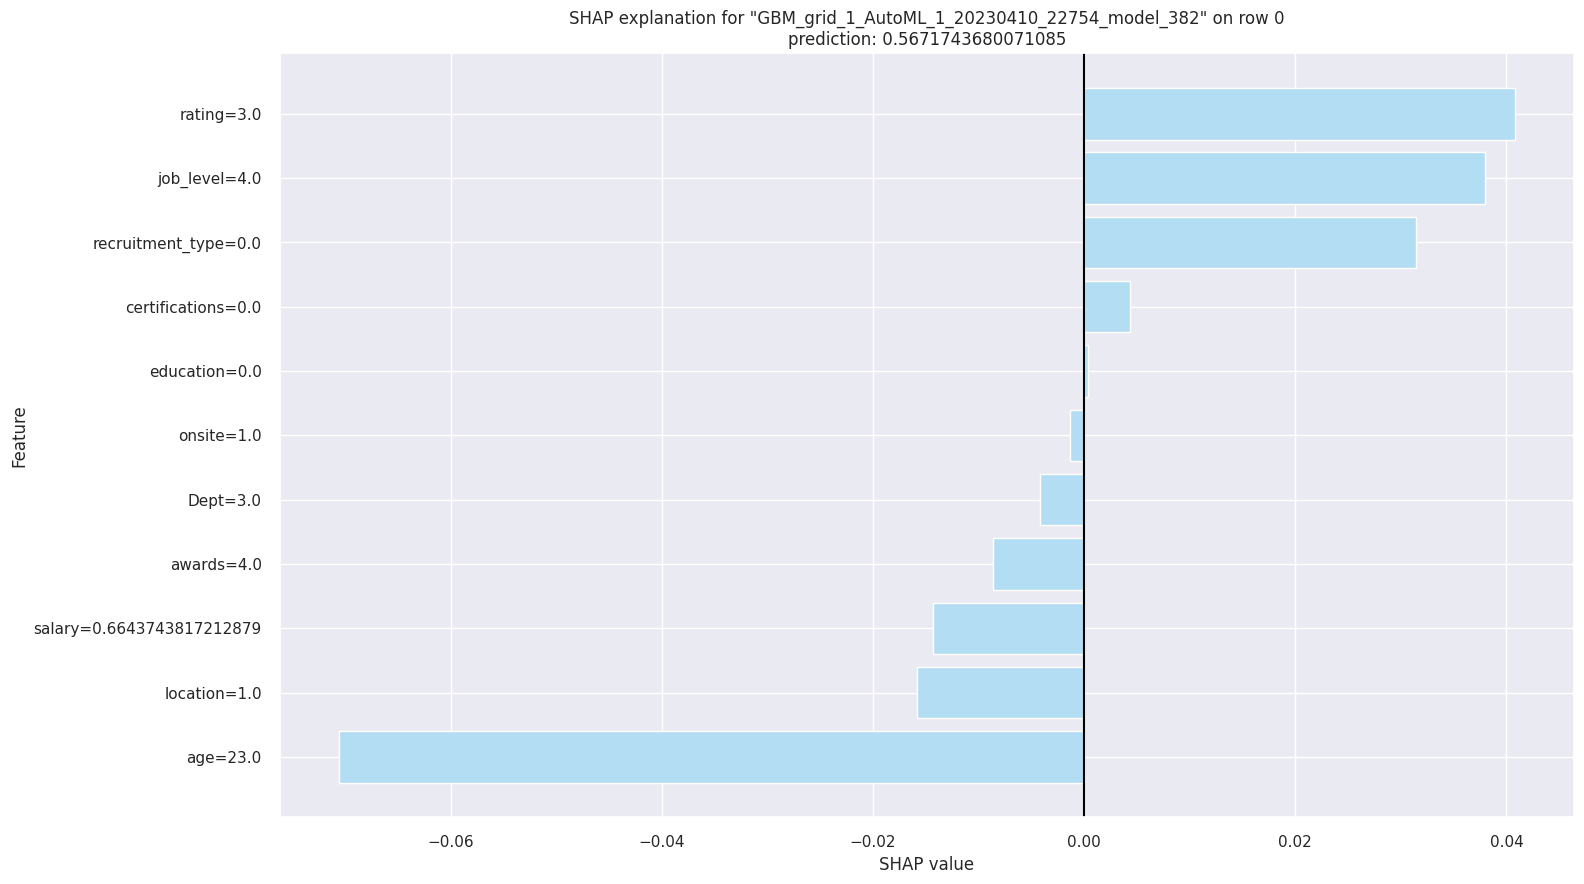

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                                     rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo               predict
-----------------------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------  ---------
GBM_grid_1_AutoML_1_20230410_22754_model_286                             0.498253  0.248256  0.492769  0.352763                  0.248256                  17                   0.005097  GBM               0.595063
GBM_grid_1_AutoML_1_20230410_22754_model_616                             0.499158  0.249159  0.494805  0.353206                  0.249159                   4                   0.001367  GBM               0.572259
StackedEnsemble_BestOfFamily_7_AutoML_1_20230410_22754                   0.4993    0.2493    0.4944    0.353891                  0.2493                   107                   0.012018  StackedEnsemble   0.57
XGBoost_lr_search_selection_AutoML_1_20230410_22754_select_grid_model_7  0.499334  0.249334  0.498914  0.348125                  0.249334                 280                   0.054121  XGBoost           0.522276
GBM_grid_1_AutoML_1_20230410_22754_model_605                             0.499731  0.249731  0.492902  0.353979                  0.249731                  19                   0.004798  GBM               0.625241
GBM_grid_1_AutoML_1_20230410_22754_model_559                             0.499935  0.249935  0.494194  0.353178                  0.249935                  14                   0.005233  GBM               0.583175
GBM_grid_1_AutoML_1_20230410_22754_model_372                             0.500121  0.250121  0.495025  0.353724                  0.250121                  14                   0.005181  GBM               0.586722
GLM_1_AutoML_1_20230410_22754                                            0.500706  0.250706  0.494747  0.353547                  0.250706                  20                   0.002103  GLM               0.607526
GBM_grid_1_AutoML_1_20230410_22754_model_230                             0.500731  0.250732  0.493686  0.354171                  0.250732                  18                   0.032075  GBM               0.619161
GBM_grid_1_AutoML_1_20230410_22754_model_77                              0.500937  0.250938  0.494118  0.353373                  0.250938                  15                   0.004955  GBM               0.612192
[20 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(datasetAutoMLTest, row_index=0)

In [ ]:
# Waterfall plot for linear model
svm_explainer = shap.Explainer(svm_model.predict, X_train)
svm_shap_values = svm_explainer(X_train)
def get_SHAP(index=18):
    shap.plots.waterfall(svm_shap_values[index], max_display=14)


Permutation explainer: 336it [05:11,  1.06it/s]


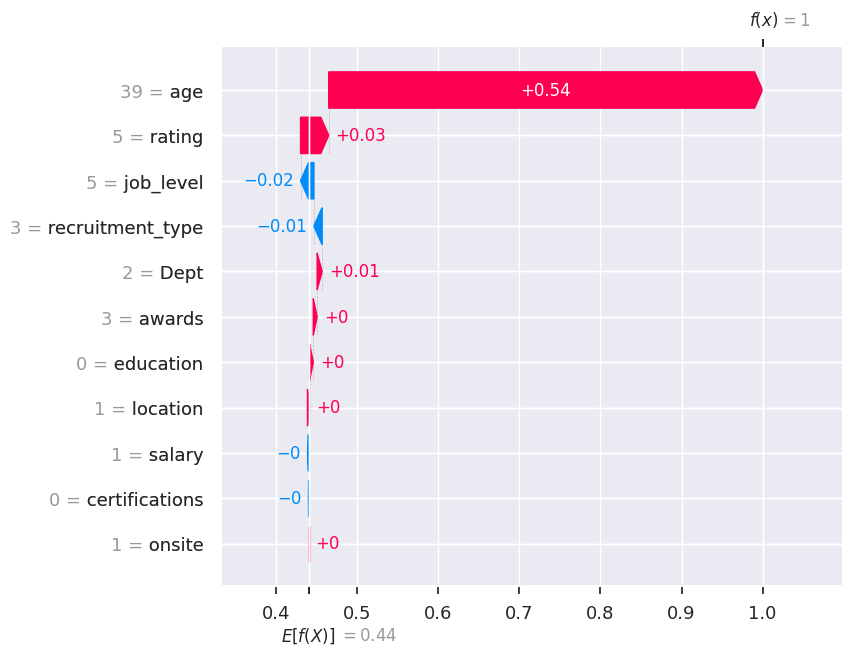

In [ ]:
get_SHAP()


##Interpret the summary plot SVM Model
Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

Each dot(both red and blue) represents a employee satisfaction
Red color represents high values whereas blue color represents low value
If a dot(employee satisfaction) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
The position of a dot(employee satisfaction) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.

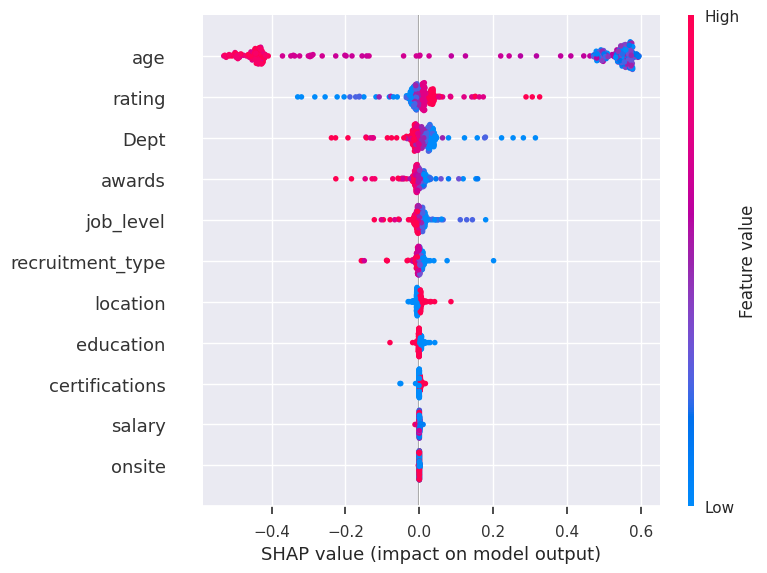

In [ ]:
# SHAP summary for Linear Model
shap.summary_plot(svm_shap_values, X_train)

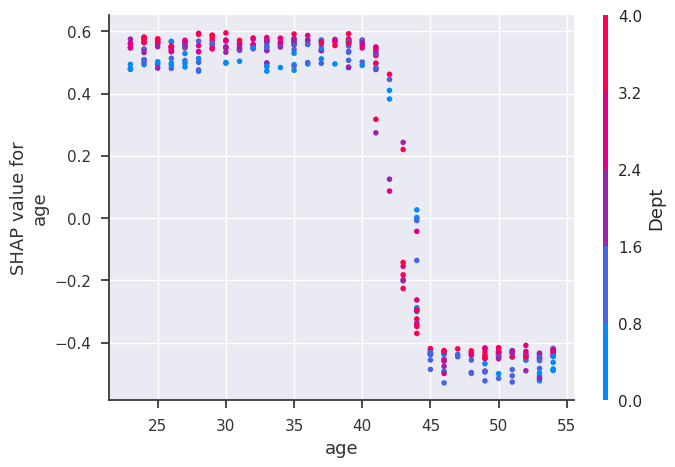

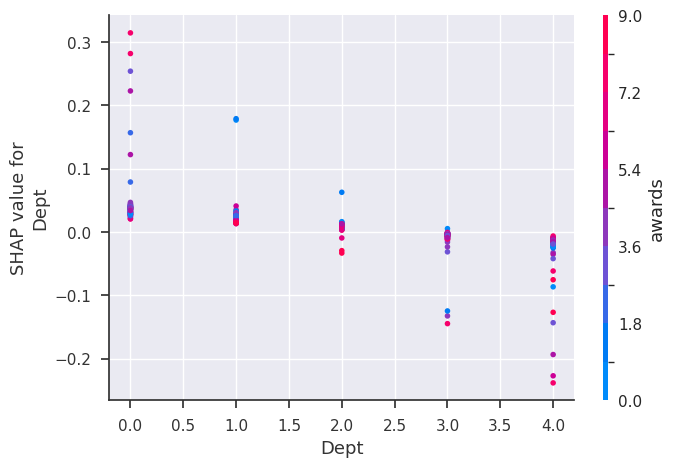

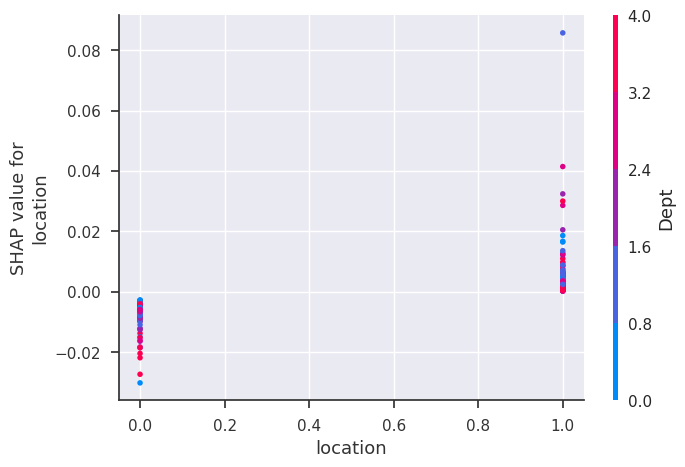

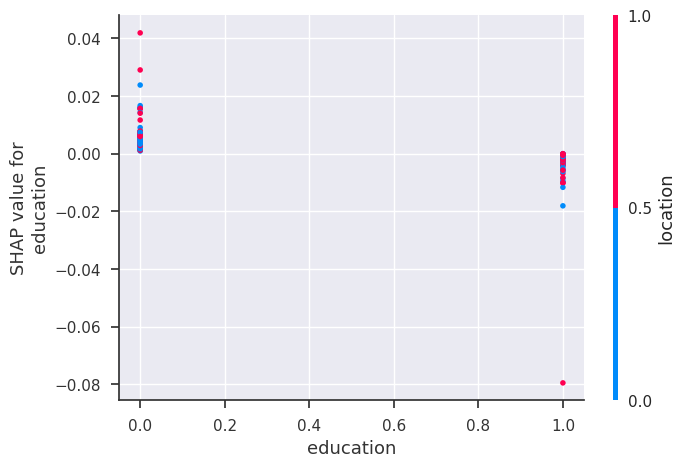

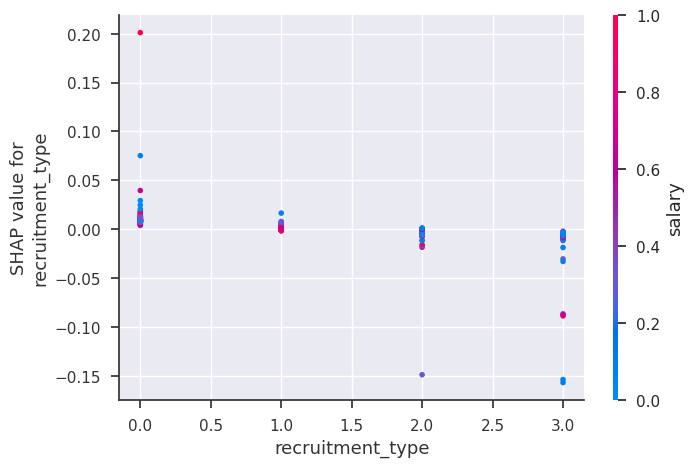

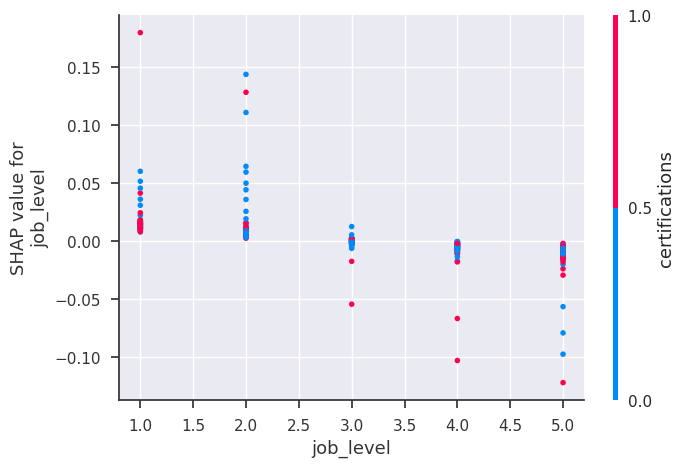

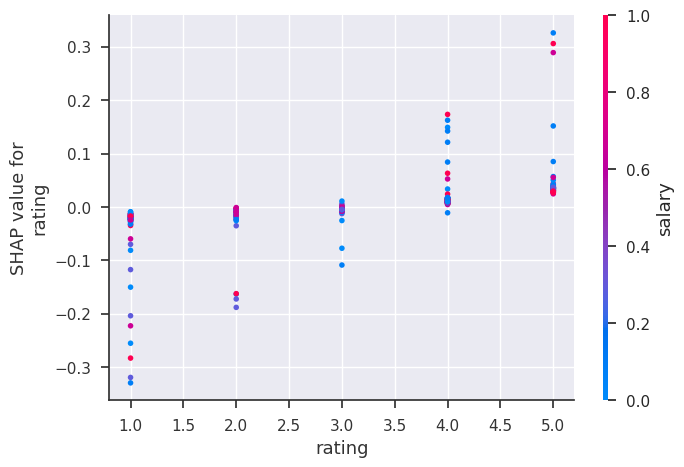

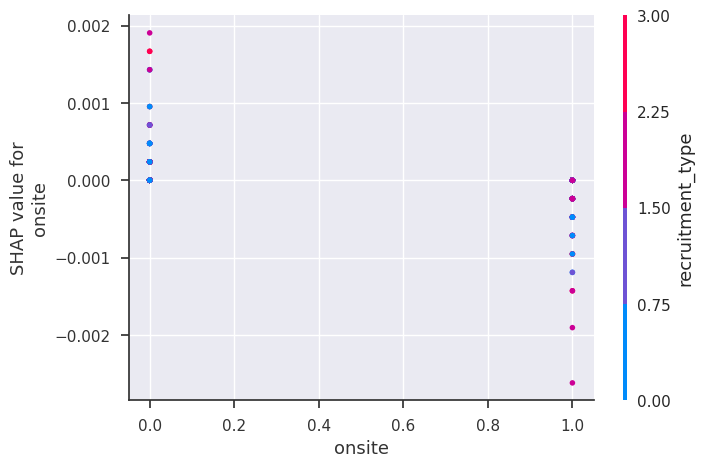

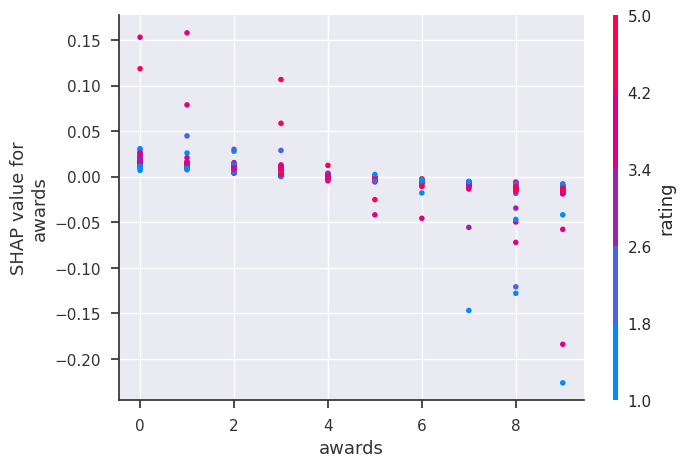

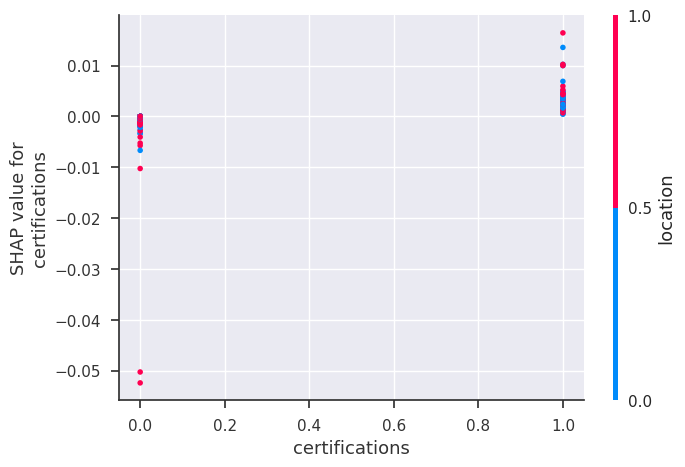

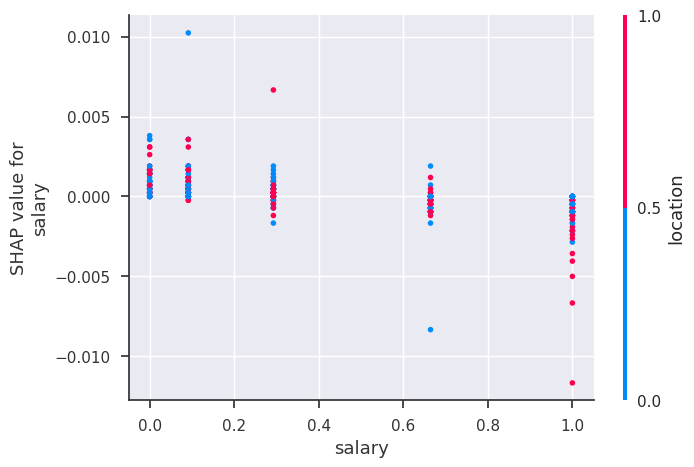

In [ ]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, svm_shap_values.values, X_train)

Visualization of Heatmaps for Linear and Tree-based Models
A summary of the complete dataset's effects on the target for each data point in each feature is shown in this visualization.(employee satisfaction).
This Y-axis is Features are on the X-axis. example of that quality
The instance's color indicates whether it had a favorable or unfavorable impact. If the instance is red, then the effect was positive; if it is blue, then the effect was negative.
The effect's intensity is directly proportional to the color's intensity. The more intense the color, the more significant the feature.


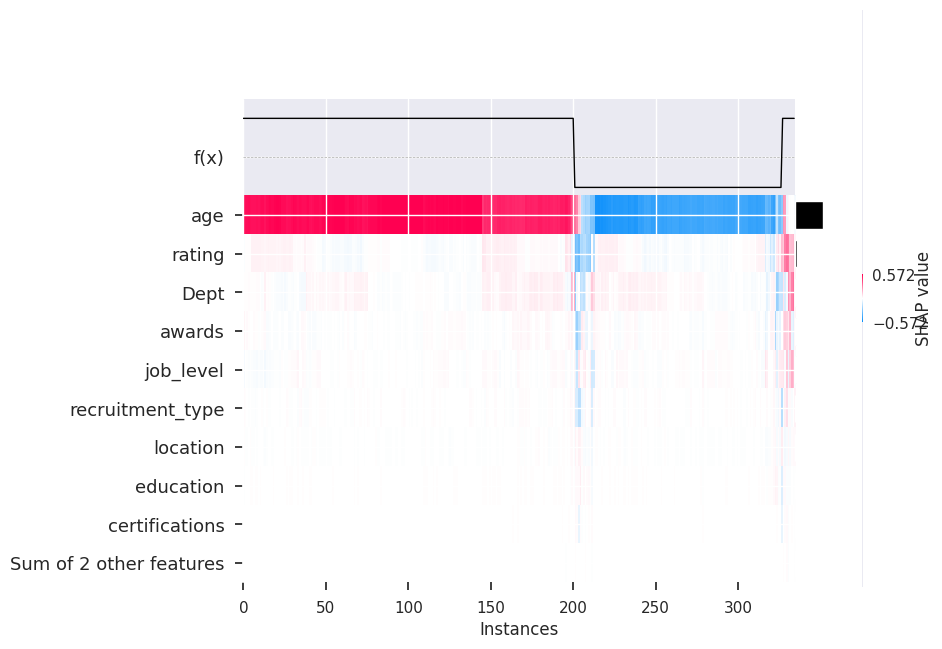

In [ ]:
shap.plots.heatmap(svm_shap_values)  # SHAP HeatMap of a Tree Based Model


#Final Takeaways
The best model for this assignment is the AutoML's best model with its hyperparameters set since it has the highest accuracy when compared to the other models examined in this exercise. Additionally, we can truly understand the underlying causes of this prediction because this model is interpretible.


#Learning Outcomes
I gained knowledge of the entire data science project lifecycle, starting with data preparation and ending with hyperparameter tweaking.
The majority of the time should be used for data preparation, including cleaning, normalizing, choosing features, and imputation, among other things.
After data preparation, hyperparameter tuning is the second-most crucial step, which the majority of practitioners overlook. However, the outcome justifies the time spent.
The best models should be chosen to be deployed after multiple models have been trained, as certain algorithms perform significantly better than others on certain tasks.
The assignment series' Model Interpretation (Unboxing the Black Blox) is the one that offers the most valuable lessons. Understanding what caused a model to accurately forecast a result has been made simpler by SHAP, LIME, and PDP.


### References:
1. Cirrhosis Prediction Dataset - Cirrhosis Prediction Dataset
2. How to extract the decision rules from scikit-learn decision-tree? - https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
3. Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python - https://mljar.com/blog/visualize-decision-tree/
4. AutoML H2O AI Shap Explainer - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html

### Licences:
1. SHAP libaray - Copyright (c) 2018 Scott Lundberg https://github.com/slundberg/shap/blob/master/LICENSE
2. Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html
3. H2O AI AutoML https://h2o.ai/legal/license/
4. sklearn.LinearRegression, GridSearch https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
5. sklearn.DecisionTreeRegressor https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html  <br/>

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks  https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.